# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# For reading and working with data
import numpy as np
import pandas as pd

# For data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For capitalizing strings in reports
import string

# For testing outliers relationships
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# For splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# For building the linear regression model
import statsmodels.api as sm

# For evaluating the regresssion model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For determining VIF and testing multicollinearity of the regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For testing for normality of the regression
import pylab
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import anderson

# For testing homoscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Loading the dataset

In [4]:
# Load the ReCell CSV file
def csv_read(file):
    """ 
    Reads a CSV file sample to quickly determine the data types and then 
    load the full file quicker
    
    file: the name of the csv to load
    """
    # Read the first 20 rows
    df_sample = pd.read_csv(file, nrows=20)
    dt = {}
    # Determine the datatypes of the columns from the sample data
    for col, dtyp in zip(df_sample.columns, df_sample.dtypes):
        dt[col] = dtyp
        
    # Load the entire main file using the datatypes determined in the sample load
    df_final = pd.read_csv(file, dtype=dt)
    return df_final

# Call the csv_read function to load the file
df_Recell = csv_read('used_device_data.CSV')

## Data Overview

- Observations
- Sanity checks

In [5]:
# Show the first five rows of the dataframe
df_Recell.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [6]:
# Show the last five rows of the dataframe
df_Recell.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android        15.34  yes  no             NaN   
3450       Asus  Android        15.24  yes  no            13.0   
3451    Alcatel  Android        15.80  yes  no            13.0   
3452    Alcatel  Android        15.80  yes  no            13.0   
3453    Alcatel  Android        12.83  yes  no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
3449               8.0        64.0  6.0   5000.0   190.0          2019   
3450               8.0       128.0  8.0   4000.0   200.0          2018   
3451               5.0        32.0  3.0   4000.0   165.0          2020   
3452               5.0        32.0  2.0   4000.0   160.0          2020   
3453               5.0        16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994

#### Observations: 
* 4g and 5g columns appear to be boolean types
* There are NaN values in the main_camera_mp column

In [7]:
# Show the number of rows and columns of the dataframe
print('There are', df_Recell.shape[0],'rows and', df_Recell.shape[1], 'columns')

There are 3454 rows and 15 columns


#### Observations:
* There are 3454 rows and 15 columns

In [8]:
# List the column datatypes and check to see if there are any null values in the dataframe
df_Recell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observations: 
* Brand_name, os, 4g, 5g columns are objects
* Screen_size, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, 
  normalized_used_price and normalized_new_price columns are of the type float
* Release_year and days_used columns are of the type int64
* There following columns had missing data:  main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight

In [9]:
# Provide information on attributes
# Show name, number of missing values, unique value count, and unique value list if count less than 20
for i in df_Recell.columns:
    print('Attribute: {}'.format(i))
    print('Number of missing values: {}'.format(sum(df_Recell[i].isna())))
    print('Unique values: {}'.format(df_Recell[i].nunique()))
    if df_Recell[i].nunique() < 20:
        print('Value list:')
        df_unique=df_Recell[i].unique()
        print(np.sort(df_unique))
    else: 
        print('Too many unique values to print')
    print('---------------------------------------------------------')    

Attribute: brand_name
Number of missing values: 0
Unique values: 34
Too many unique values to print
---------------------------------------------------------
Attribute: os
Number of missing values: 0
Unique values: 4
Value list:
['Android' 'Others' 'Windows' 'iOS']
---------------------------------------------------------
Attribute: screen_size
Number of missing values: 0
Unique values: 142
Too many unique values to print
---------------------------------------------------------
Attribute: 4g
Number of missing values: 0
Unique values: 2
Value list:
['no' 'yes']
---------------------------------------------------------
Attribute: 5g
Number of missing values: 0
Unique values: 2
Value list:
['no' 'yes']
---------------------------------------------------------
Attribute: main_camera_mp
Number of missing values: 179
Unique values: 41
Too many unique values to print
---------------------------------------------------------
Attribute: selfie_camera_mp
Number of missing values: 2
Unique value

#### Observations:
* There following columns had missing data:  main_camera_mp (179), selfie_camera_mp (2), int_memory (4),
  ram (4), battery (6), weight(7)
* The 4g and 5g columns are yes/no boolean values
* The release_years range from 2013 to 2020
* There are 4 different operating systems(os) categories: Android, Others, Windows, iOS

In [10]:
# Check the dataframe for any duplicate records
df_Recell.duplicated().sum()

0

#### Observations:
* There are no duplicate rows in the data

In [11]:
# Describe the numerical variables
df_Recell.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

#### Observations:
* There are 3454 records in the dataset
* Screen size has a minimum of 5cm and a maximum of 30cm. 
* The main camera megapixels has a wide range of values from 0.08MP to 48MP
* Some devices do not have a selfie camera MP value
* Internal memory has a wide range of values from 0.01GB to 1024GB. 
* RAM is mostly 4GB
* Battery has a wide range from 500 to 9720 mAh
* Weight has a range from 69 grams to 855 grams
* The phones and tablets were released between the years 2013 and 2020
* The normalized used prices appear to be lower than normalized new prices
* The normalized price values do not appear to represent current prices

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [12]:
# Define function to create a histogram and box plot for an attribute
def hist_box_plots(df, col):
    """
    Create a histogram and bookplot of the column and dataframe provided
    
    df: dataframe
    col: dataframe column
    """
    
    # Create the plot figure
    plt.figure(figsize=(12,3))
    
    ################################################
    
    # Creating first subplot
    plt.subplot(1,2,1) 
    
    # Add title and labels
    plt.title(string.capwords(col.replace('_',' ')), fontsize=12, pad=20, loc='left')        
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel('Record Count', fontsize=10, labelpad=10)
    
    # Set tick font sizes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Create a histogram of the attribute
    ax = sns.histplot(data = df, x=col, color='#CCECFF')
    
    # Hide the top and left spines of the histogram
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add a mean to the histogram
    ax.axvline(df[col].mean(), color='green', linestyle='--')
    
    # Add median to the histogram
    ax.axvline(df[col].median(), color='red', linestyle='-')
        
    ################################################    
    
    # Create second box plot next to first boxplot
    plt.subplot(1,2,2)
                
    # Set the flier type, color, and size of the outliers            
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
                
    # Add an x-axis label            
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5,)
                
    # Set the tick font size            
    plt.xticks(fontsize=10)
                
    # Create a boxplot of the attribute            
    ax = sns.boxplot(data = df, x=col, showmeans=True, flierprops=flierprops, color='#CCECFF')
                
    # Hide the top, right, and left spines            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)
    

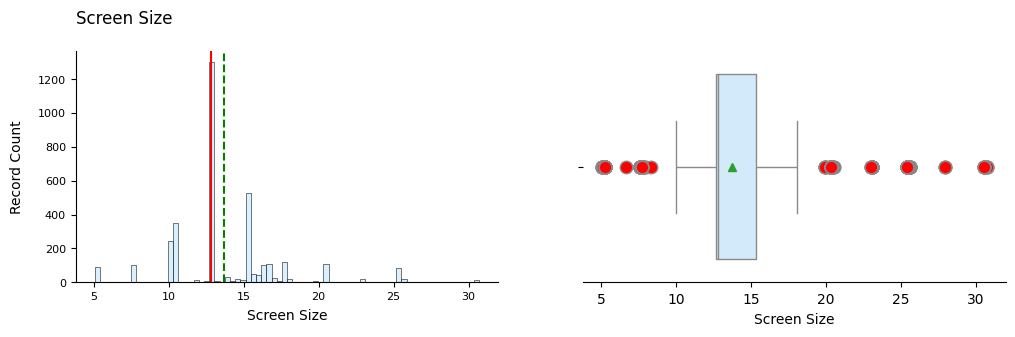

__________________________________________________________________________________________________________________________


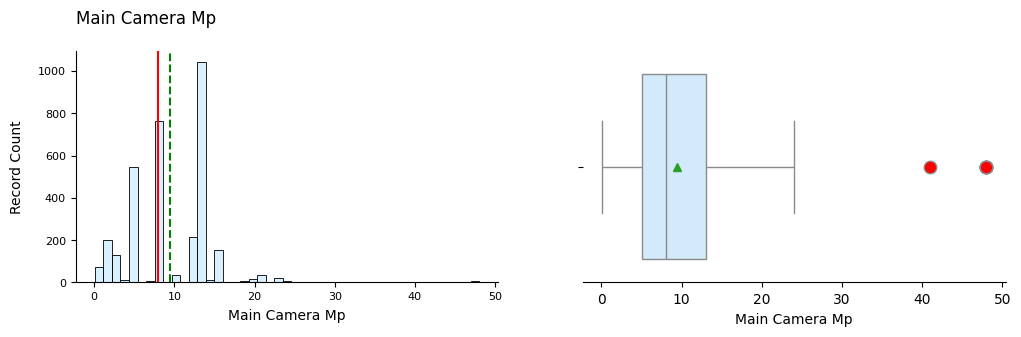

__________________________________________________________________________________________________________________________


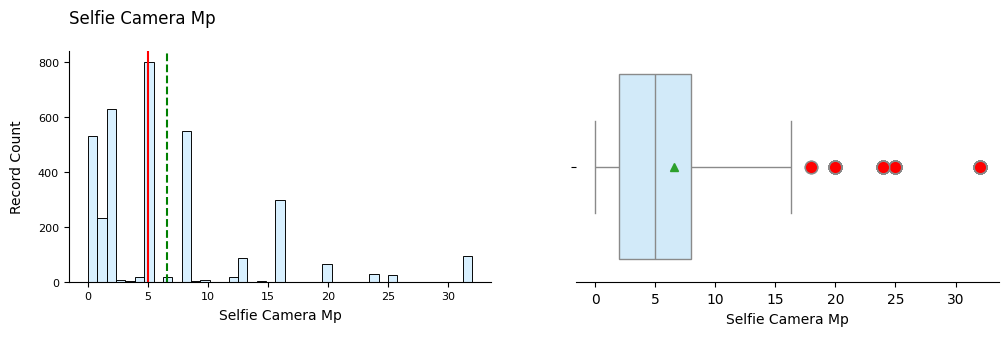

__________________________________________________________________________________________________________________________


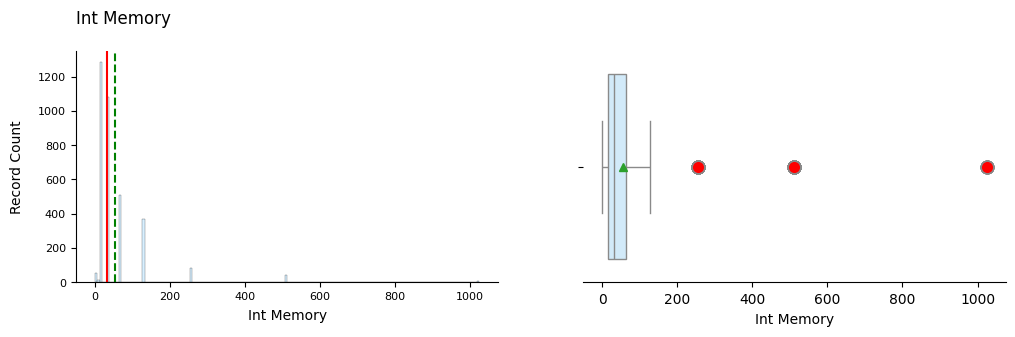

__________________________________________________________________________________________________________________________


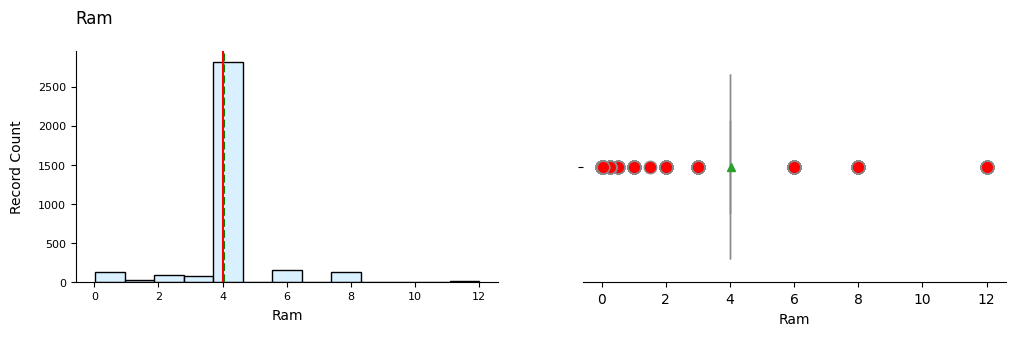

__________________________________________________________________________________________________________________________


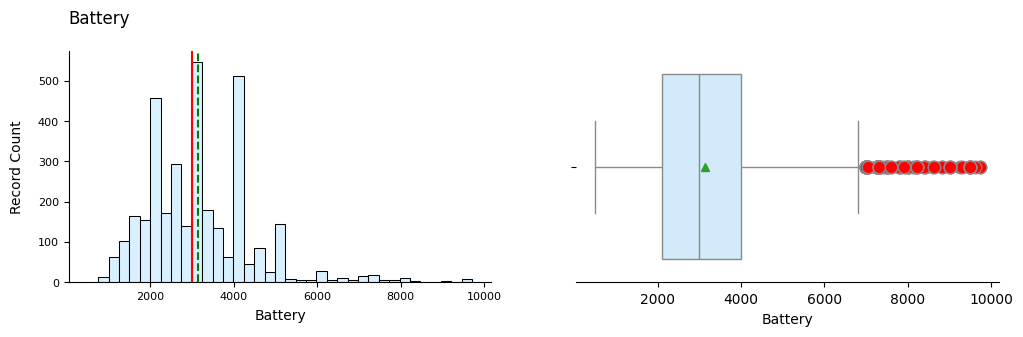

__________________________________________________________________________________________________________________________


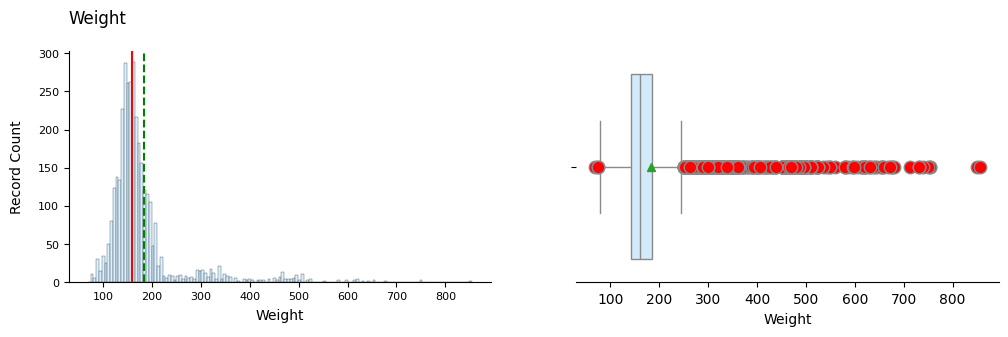

__________________________________________________________________________________________________________________________


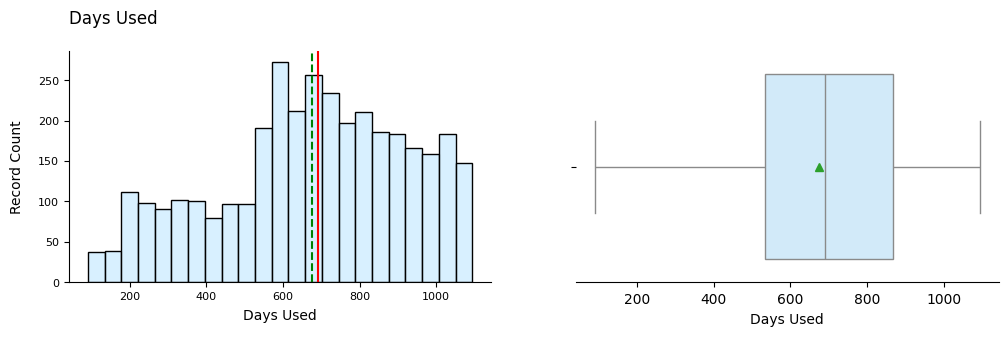

__________________________________________________________________________________________________________________________


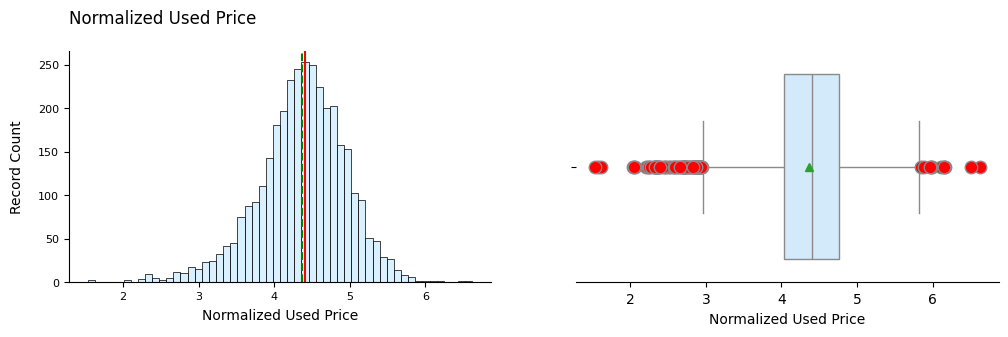

__________________________________________________________________________________________________________________________


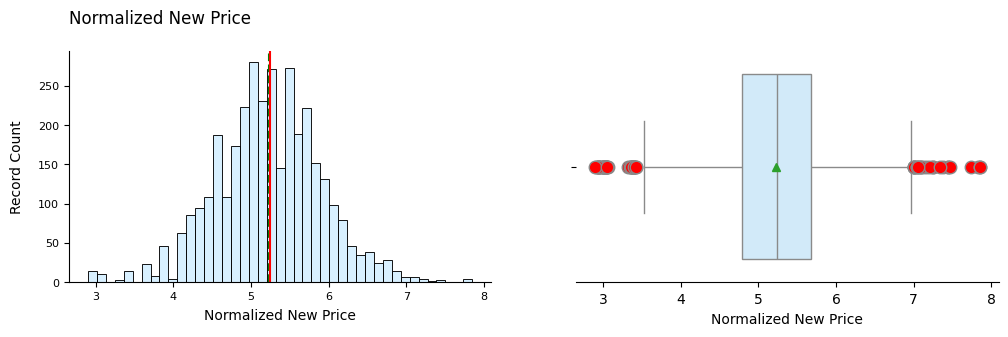

__________________________________________________________________________________________________________________________


In [13]:
# Create histograms and box plots for numerical attributes

# Create a list of the numerical attributes
df_num_list = [df_Recell.columns[x] for x in range(len(df_Recell.columns)) 
               if df_Recell.dtypes[x] in ('float64', 'int64')]

# Release year is a time value and not included
df_num_list.remove('release_year')

# Call the hist_box_plot function for each item in the list
for col in df_num_list:
    hist_box_plots(df_Recell, col)   

#### Observations: 
* Screen size has a multimodal right skewed distribution with quite a few outliers on both whiskers
* The main camera MP attribute has a multimodal right skewed distribution with a couple right side outliers
* The selfie camera MP attribute has a multimodal right skewed distribution with a few right side outliers
* The internal memory has a right skewed distribution and appears to be sold in 4, 8, 16, 32, 64, 128, 256, 512, 
  and 1024GB options. The most common storage sizes are 16GB and 32GB
* RAM is mostly 4GB with many outliers on both whiskers
* The battery attribute has a multimodal right skewed distribution with a few right side outliers
* The weight attribute is heavily right skewed with many right side outliers
* The days used attribute is slightly left skewed and does not follow a normal distribution
* The normalized used prices follows a normal distribution that is slightly left skewed with outliers on both whiskers
* The normalized new prices follows a normal distribution with outliers on both whiskers

In [14]:
# Define function to create a bar plot for category attributes
def bar_plots(data, col):
    """
    Create a bar plot of the column and dataframe provided
    
    df: dataframe
    col: dataframe column
    """
    
    # For each value in the list of categories, create a bar chart
    
    # If there are less than 8 unique values in the attribute, set the size to 4 by 3
    # else set the size to 9 by 3 to show all values cleaner
    if data[col].nunique() < 8:
        plt.figure(figsize=(4,3))
    else: 
        plt.figure(figsize=(9,3))
        
    # Create the bar plot of the dataframe and all attributes individually
    # Order the each subplot by the x-axis data xtick names
    ax = sns.countplot(data=data,
                       x=col,
                       color='#CCECFF',
                       linewidth=.5, edgecolor='black',
                       order = data[col].value_counts().index.sort_values())
    
    # Add title and labels
    plt.title(string.capwords(col.replace('_',' ')), fontsize=12, pad=10, loc='left')
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5,)
    plt.ylabel('Record Count', fontsize=10, labelpad=5)

    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    if data[col].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
        ax.bar_label(ax.containers[0], fontsize=9) # include the bar value
    else:
        ax.bar_label(ax.containers[0], fontsize=8)
        plt.xticks(rotation=90, fontsize=8)               
    plt.yticks(fontsize=8)
    
    # Tighten the layout of the subplots
    plt.tight_layout()    
    
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

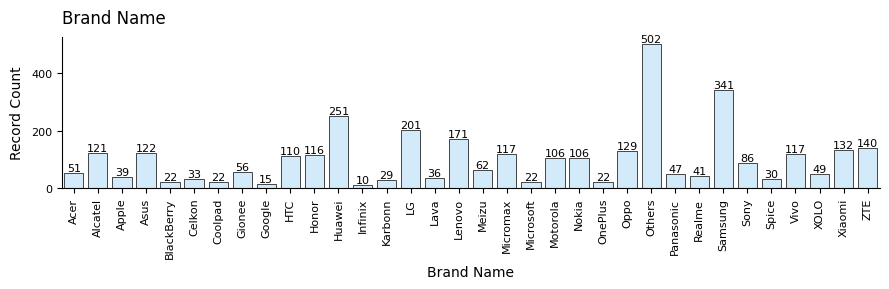

__________________________________________________________________________________________________________________________


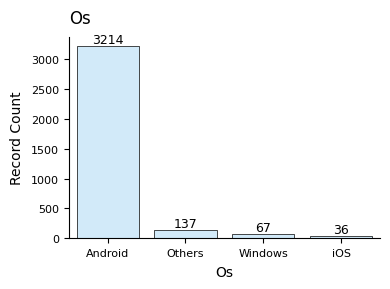

__________________________________________________________________________________________________________________________


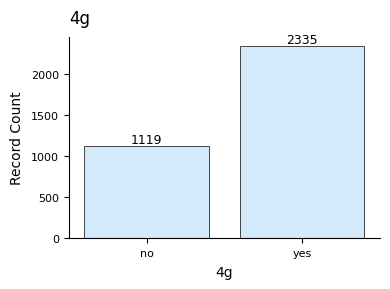

__________________________________________________________________________________________________________________________


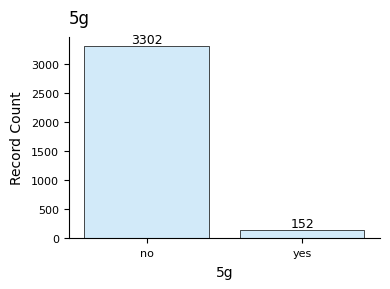

__________________________________________________________________________________________________________________________


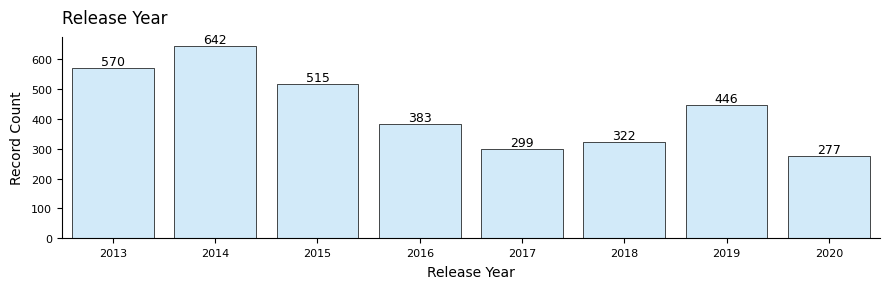

__________________________________________________________________________________________________________________________


In [15]:
# Create bar plots for categorical attributes

# Create a list of the categorical attributes
df_cat_list = [df_Recell.columns[x] for x in range(len(df_Recell.columns)) 
               if (df_Recell.columns[x]=='release_year'
                  or
                  df_Recell.dtypes[x] not in ('float64', 'int64'))]

# Call the bar_plot function for each item in the list
for col in df_cat_list:
    bar_plots(df_Recell, col)    

#### Observations:
* There are 34 different brands of phone and tables
* The brand 'Other' contains 502 records
* Samsung (341) and Huawei (251) are the top brands available for sale
* 3214 phones and tablets use the Android operating system
* 2/3 of devices (2335) are 4g compatible
* Very few phones and tablets are 5g  (152)
* Devices have a release year from 2013 to 2020

### Bivariate Analysis

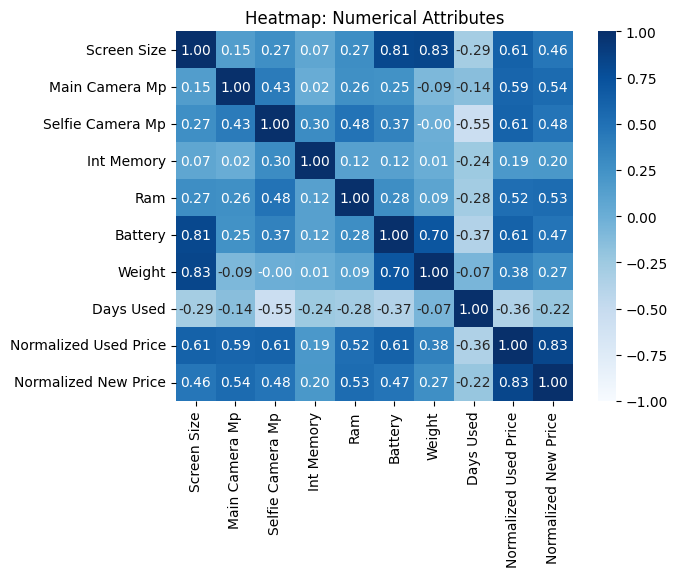

In [16]:
# Create a heatmap of the correlation of the numerical attributes

# Create labels for the heatmap x and y labels
labels = []
for i in df_num_list:
    x = i.replace('_',' ').split()
    labels.append(' '.join(word[:].capitalize() for word in x))

# Correlate the numerical attributes    
df_corr = df_Recell[df_num_list].corr()

# Create the heatmap
ax = sns.heatmap(df_corr, cbar=True, annot=True, vmin=-1, vmax=1, fmt=".2f",
                 xticklabels=labels,
                 yticklabels=labels,
                 cmap='Blues'
                )

# Add title
plt.title('Heatmap: Numerical Attributes')

# Show plot
plt.show()

#### Observations:
* Battery is highly correlated to screen size (0.81) and weight (0.70)
* Weight is highly correlated to screen size (0.83)
* Days used is moderately negatively correlated to selfie camera MP (-0.55)
* Normalized used price is highly correlated to normalized new price (0.83)
* Normalized used price is moderately correlated to screen size (0.61), main camera MP (0.59), 
  selfie camera MP (0.61), RAM (0.52), battery (0.61)
* Normalized new price is moderately correlated to main camera MP (0.54) and RAM (0.53)

In [17]:
# Define function to create a scatterplot of 2 numerical attributes
def scatter_plots(data, x, y, title_x, title_y):
    """
    Create scatterplot of 2 attributes for a dataframe
    
    data: dataframe
    x: x attribute
    y: y attribute
    title_x: label to be used in title and x label
    title_y: label to be used in title and y label
    
    """
    
    # Create scatterplot of the dataframe, x, and y attributes    
    sns.scatterplot(data=data, x=x, y=y)
    
    # Add title and labels to plot
    plt.xlabel(string.capwords(x.replace('_',' ')), fontsize=10, labelpad=5,)
    plt.ylabel(string.capwords(y.replace('_',' ')), fontsize=10, labelpad=5,)
    plt.title('Scatterplot: {} vs {} '.format(string.capwords(title_x.replace('_',' ')), 
                                            string.capwords(title_y.replace('_',' '))
                                           ))

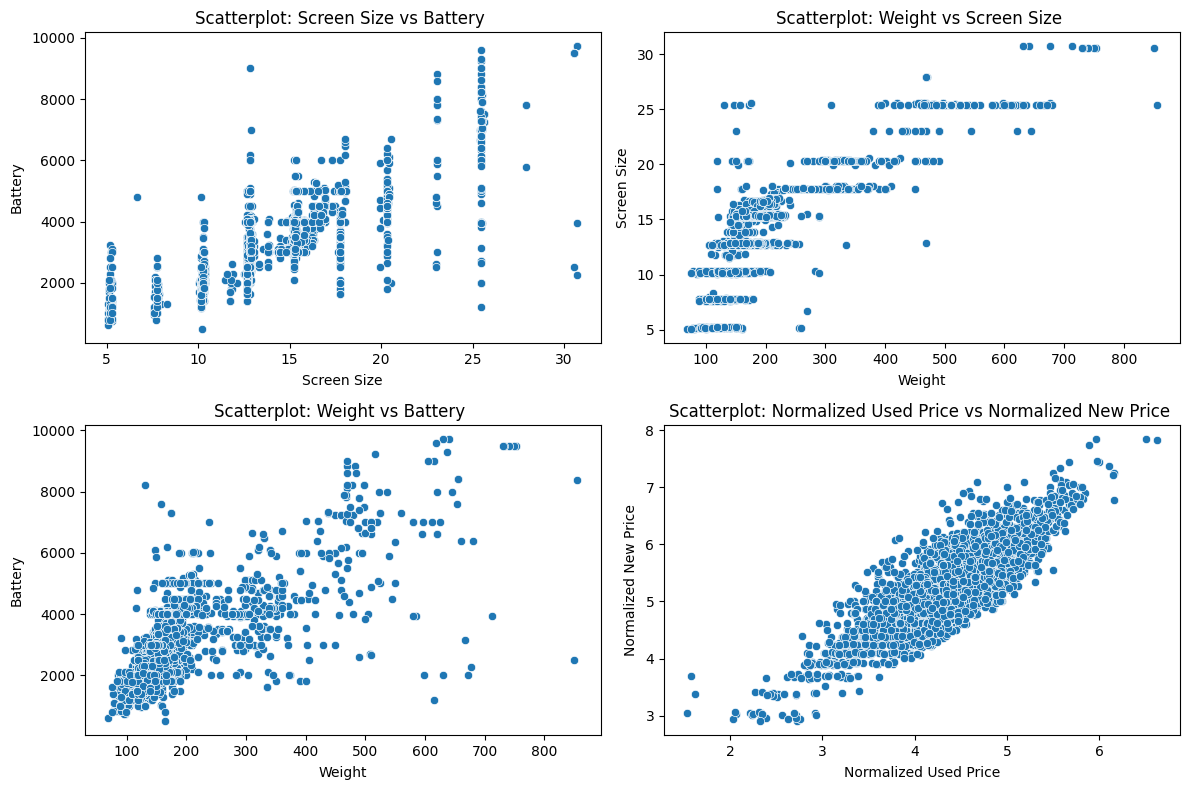

In [18]:
# Create scatterplots for the each highly correlated attribute pair

# Determine all high correlations of numerical data and create of list of the the attribute combinations
results = df_corr.where((abs(df_corr) >= 0.7) & (abs(df_corr) < 1.0)).stack().index.tolist()

# Create a datafame of the attribute combinations
results2 = pd.DataFrame(results, columns=['rows','cols'])

# The correlation matrix creates 2 values of the same correlation. 
# Only 1 version is needed to create the scatterplot
# Keep the correlation attribute combination where the index row is greater than the column row
# Set the combinations to 'keep' to True, else set to False
results2['keep'] = ['True' if results2['rows'][i]>results2['cols'][i] else 'False' for i in range(len(results2))]

# Keep the correlation attribute combinations that were set to True
results3 = results2[results2['keep']=='True'].reset_index(drop=True)

# Create a figure plot size based on the number of correlation combinations 
# Each row of the plot will have 2 subplots
plt.figure(figsize=(12, 4*(-(len(results3)//-2))))

# Call the scatter_plots function for each item in the list
for i in range(len(results3)):
    
    # Detemine which row the subplot will be built
    plt.subplot((-(-(len(results3))//2)), 2, i+1)
    scatter_plots(df_Recell, results3['rows'][i], results3['cols'][i], results3['rows'][i], results3['cols'][i])

# Tighten the layout of the subplots
plt.tight_layout()

# Show the plot after all the subplots have been created in the function
plt.show()    

#### Observations:
* Screen size, battery size, and weight all appear to be positively related to each other
* The normalized price of used devices is less than its associated normalized new price

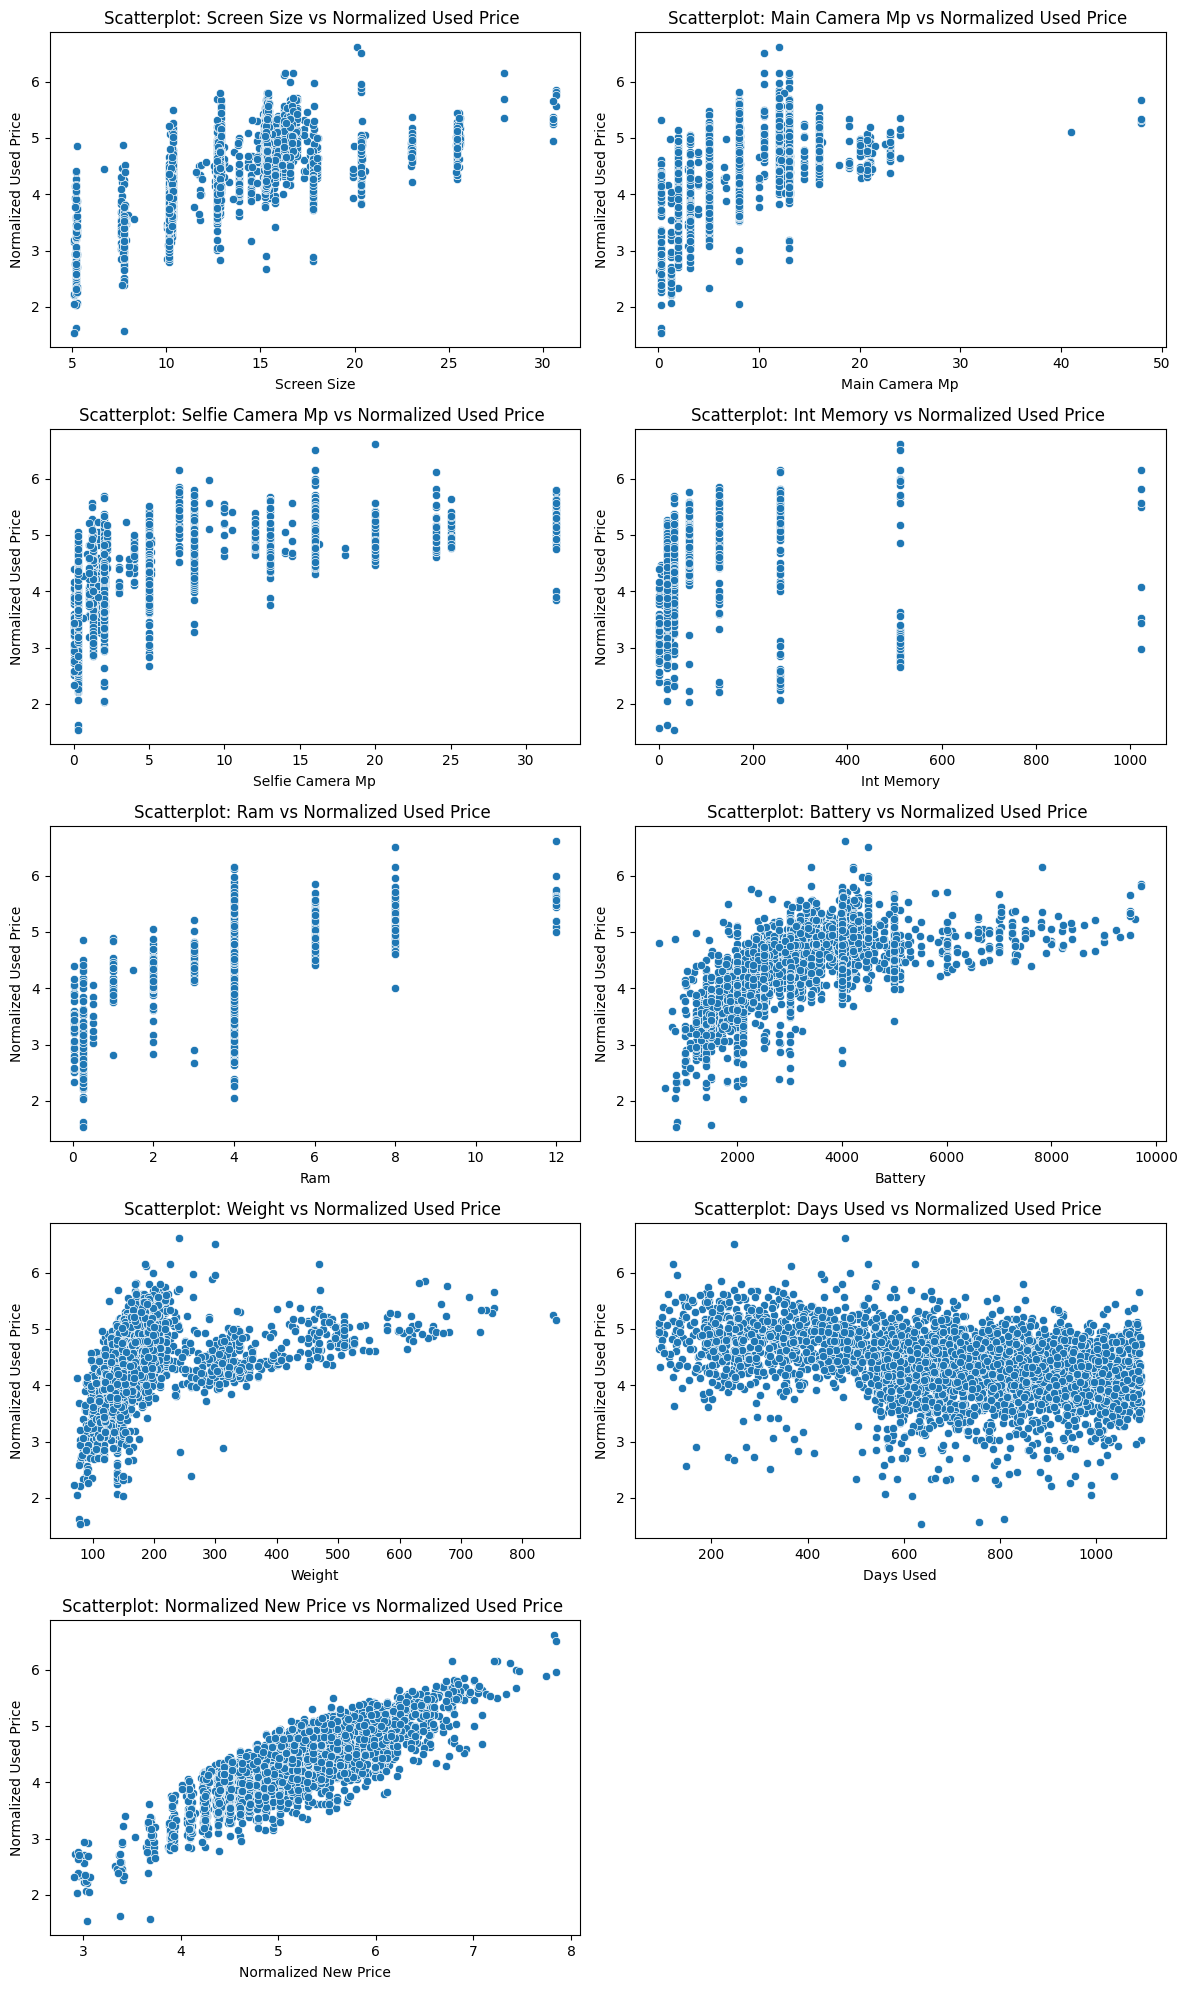

In [19]:
# Create scatterplots for all numerical attributes against the normalized used price
# as this is the attribute that will be predicted

# Create a copy of the numerical list of attributes
df_list_for_used_price = df_num_list.copy()

# Drop the normalized used price as this will be the y-axis 
df_list_for_used_price.remove('normalized_used_price')

# Create a figure plot size based on the number of combinations 
# Each row of the plot will have 2 subplots
plt.figure(figsize=(12, 4*(-(len(df_list_for_used_price)//-2))))

# Call the scatter_plots function for each item in the list
for i, att in enumerate(df_list_for_used_price):
    
    # Detemine which row the subplot will be built
    plt.subplot((-(-(len(df_list_for_used_price))//2)), 2, i+1)
    scatter_plots(df_Recell, att, 'normalized_used_price', att, 'normalized_used_price')

# Tighten the layout of the subplots    
plt.tight_layout()

# Show the plot after all the subplots have been created in the function
plt.show()        
    

#### Observations:
* Screen size, main camera MP, selfie camera MP, RAM, battery, and normalized new price are
  positively correlated to normalized used price
* Int memory, weight and days used do not appear correlated with normalized used price

In [20]:
# Create bivariate box plots for one categorical attribute and all numerical attributes
def boxplots_by_cat_and_num_atts (data, att, col):
    """
    Create bivariate box plots for one categorical attribute and all numerical attributes
    
    data: dataframe
    att: categorical attribute
    col: numerical attribute
    """
    
    # Create the plot figure
    plt.figure(figsize=(14,4))
    
    # Set the flier type, color, and size of the outliers 
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
    
    # Create a boxplot of the attribute  
    ax = sns.boxplot(data=data, x=att, y=col,
                     showmeans=True,
                     flierprops=flierprops,
                     color='#CCECFF',
                     order = data[att].value_counts().index.sort_values()
                     )
    
    # Add title and labels
    plt.title(string.capwords(col.replace('_',' '))+' by ' +string.capwords(att.replace('_',' ')), fontsize=12, pad=10)
    plt.xlabel(string.capwords(att.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    
    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    if data[att].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=8)               
    
    # Show the plot
    plt.show()

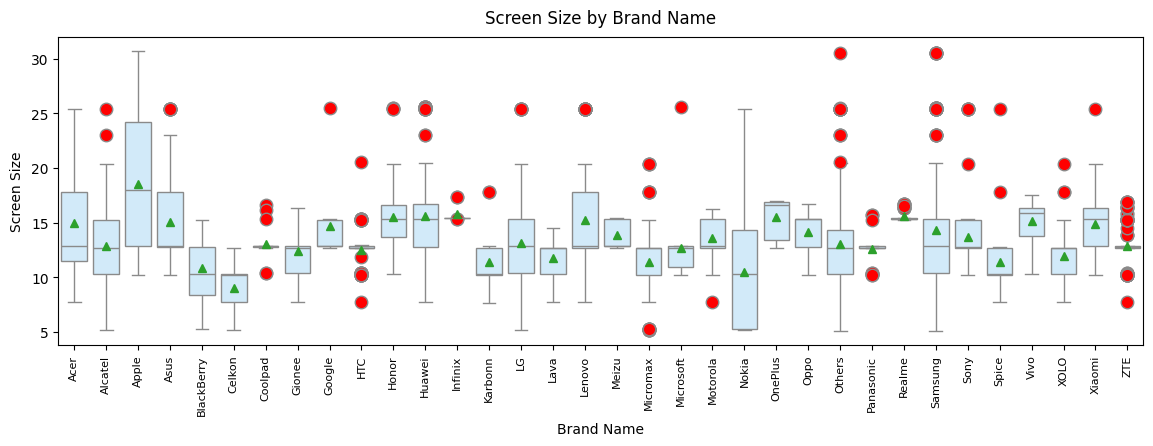

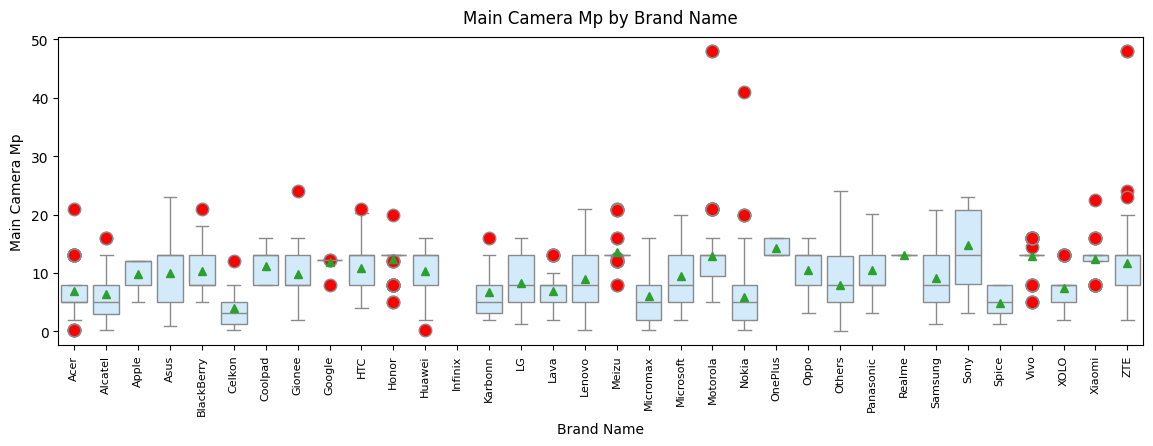

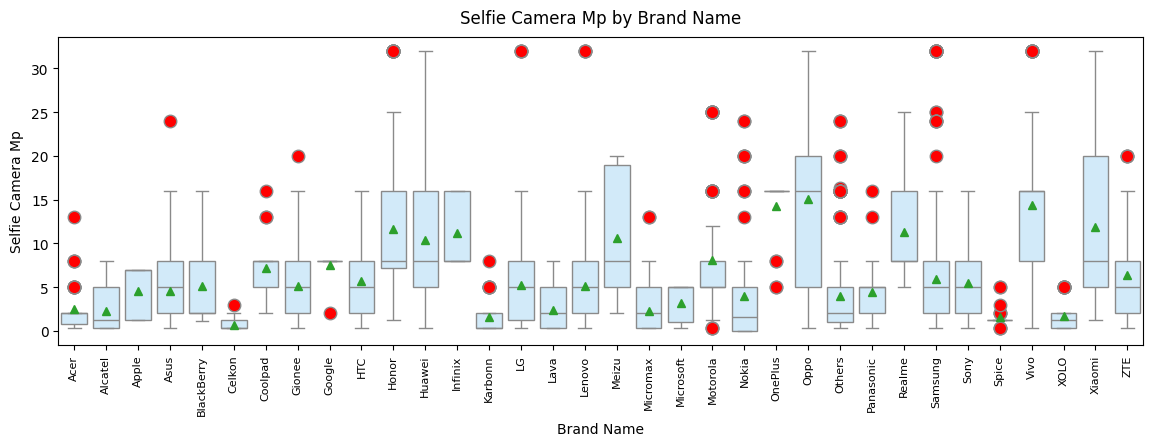

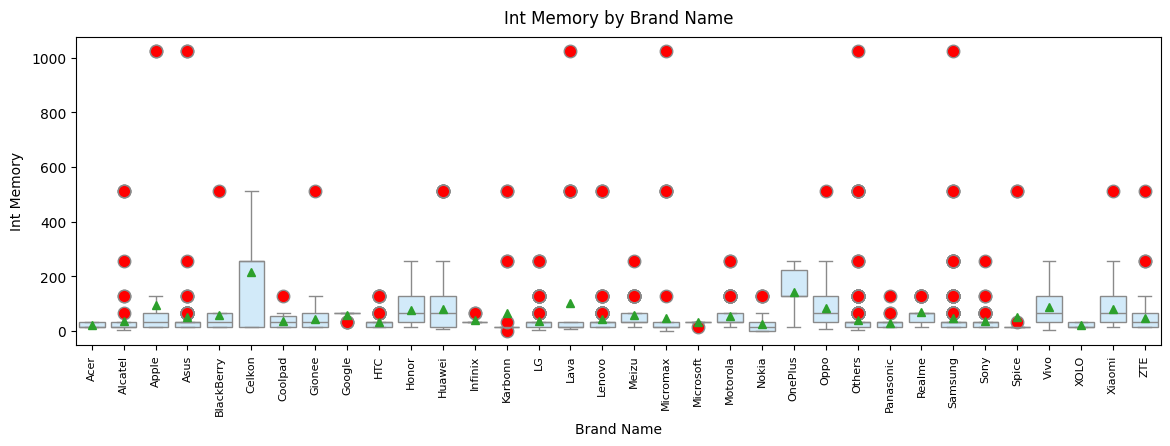

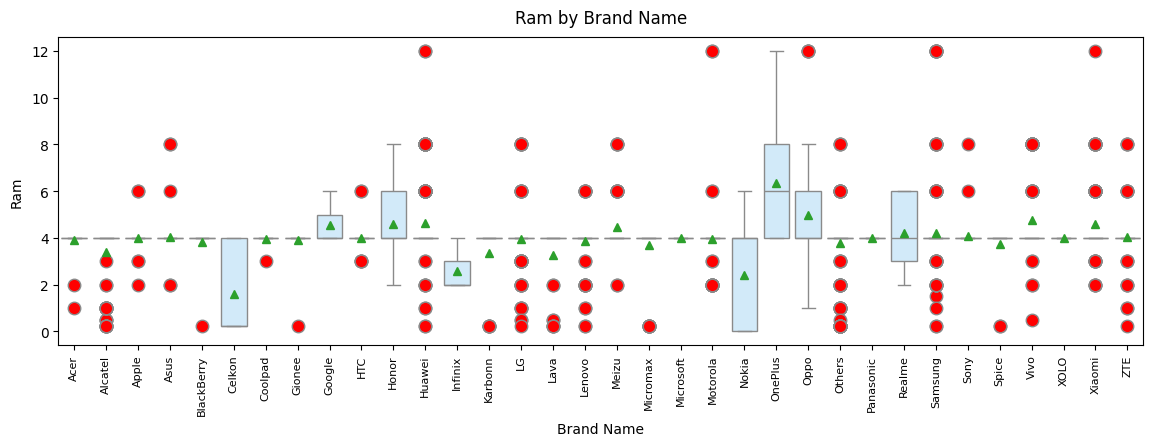

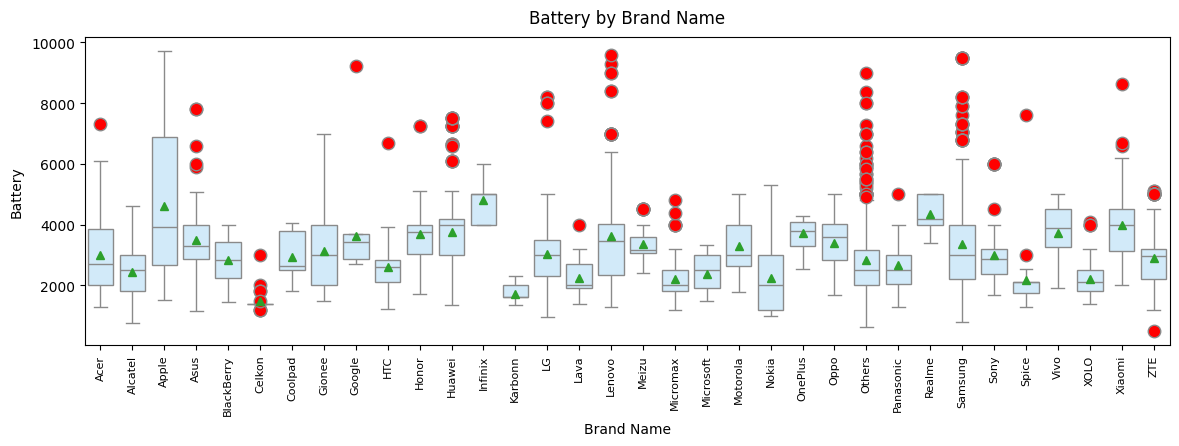

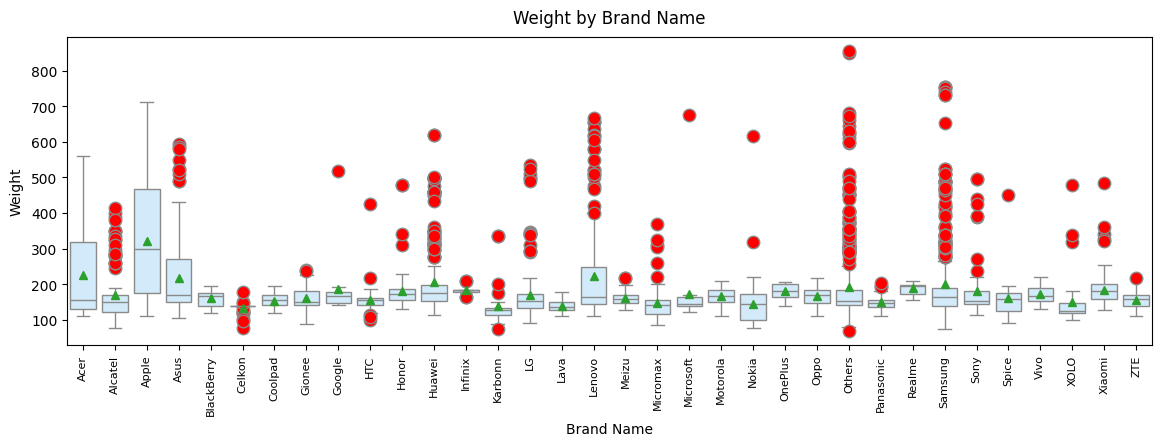

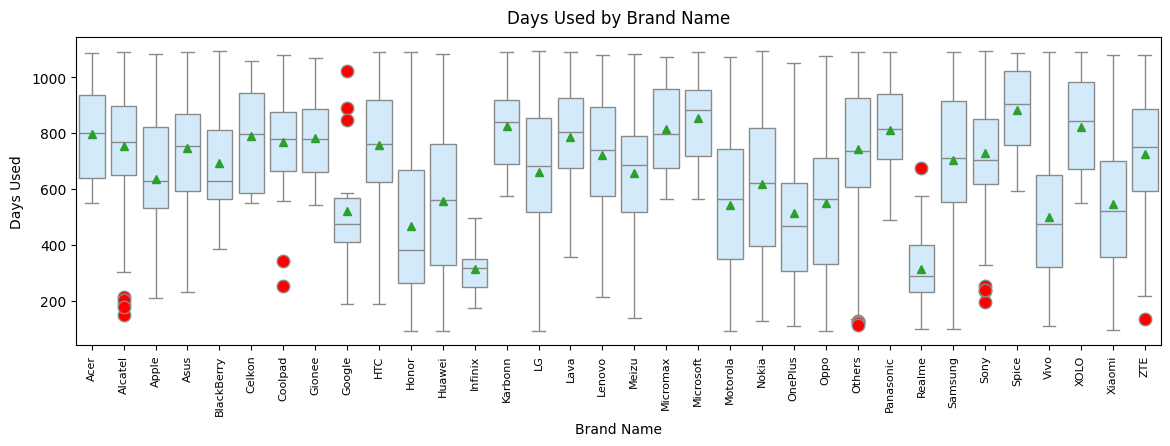

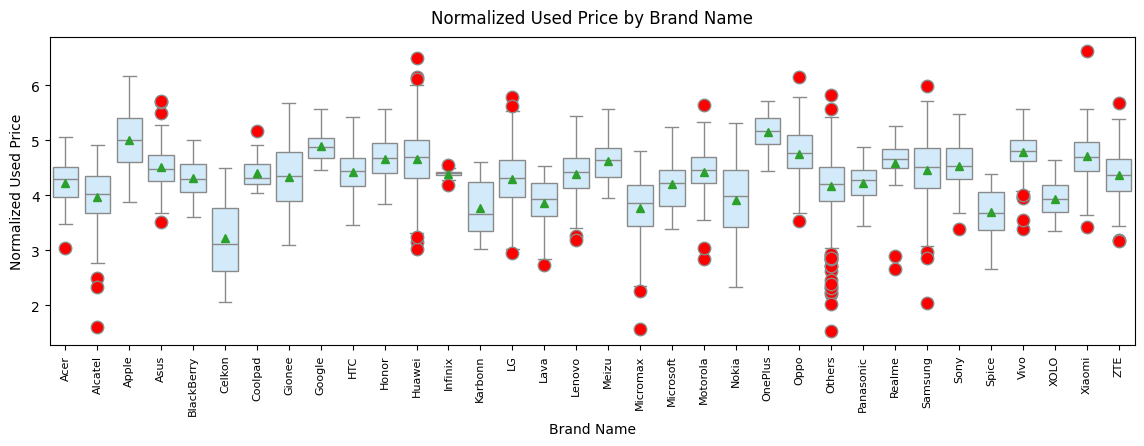

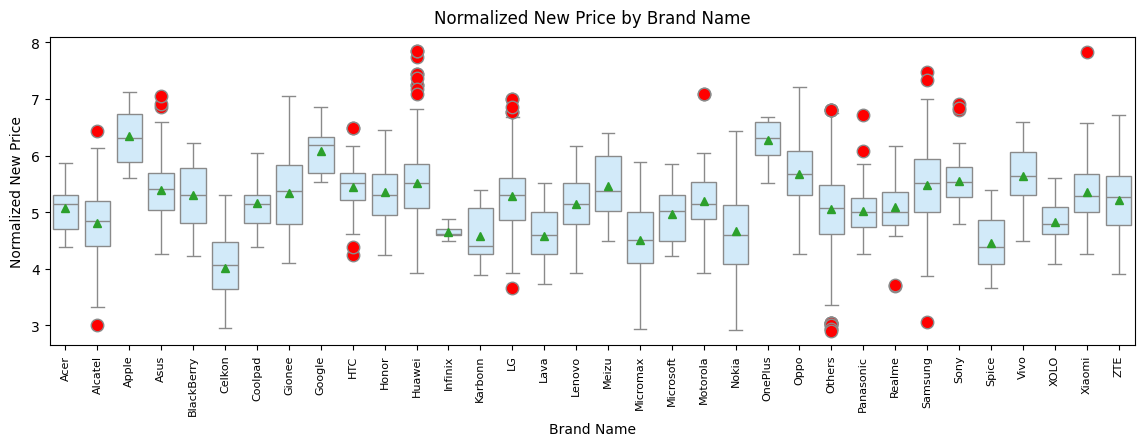

In [21]:
# Create boxplots for all numerical attributes by brand name
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell, 'brand_name', col)   

#### Observations:
* Screen sizes by brand appear to have less outliers than by examining only screen size. ZTE has a number of outliers shown here
* Main camera MPs by brand appear to have more outliers than by examining only main camera MP
* Selfie camera MPs by brand appear to have more outliers than by examining only selfie camera MP
* Internal memory by brand appear to have more outliers than by examining only internal memory. The higher outliers 
  shown here
  follow the power of 2 sizes of 256, 512, and 1024GB
* RAM by brand appear to have less outliers than by examining only RAM 
* Batteries by brand appear to have similiar outliers as examining only battery. Celkon and Other brands have higher 
  outliers shown here. 
* Weights by brand appear to have similiar outliers as examining only weights. Celkon and Other brands have higher 
  outliers shown here. Weight has the highest number of outliers out of all these scatter plots
* Days used by brand appear to have more outliers than by examining only days used
* Normalized used prices by brand appear to have less outliers than by examining only normalized used price
* Normalized new prices by brand appear to have less outliers than by examining only normalized new price
* The Others brand has a lot of outliers in battery, weight but not in the other attributes

### **Questions**:

### 1. What does the distribution of normalized used device prices look like?

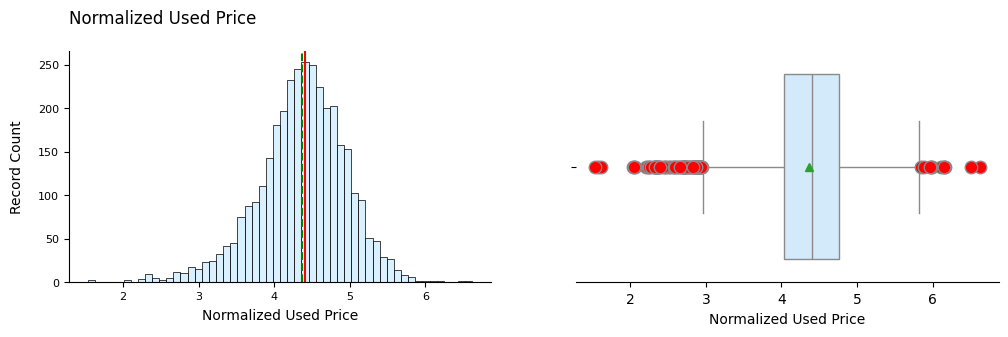

__________________________________________________________________________________________________________________________


In [22]:
# Create box plot for the normalized_used_price attribute
hist_box_plots(df_Recell, 'normalized_used_price')  

#### Observations:
* The normalized used prices follows a normal distribution that is slightly left skewed with outliers on both whiskers

### 2. What percentage of the used device market is dominated by Android devices?

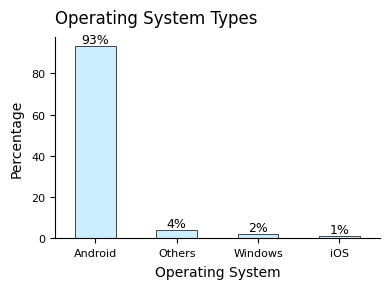

In [23]:
# Calculate the total number of records in the dataframe
df_total = df_Recell['os'].value_counts().sum()

# Create a series of the operating system values and the percentage of records by operating system to the total records
df_percentage = round(df_Recell['os'].value_counts()/df_Recell['os'].value_counts().sum()*100,2)

# Create the plot figure
plt.figure(figsize=(4,3))

# Create a bar plot of the OS attribute
ax = df_percentage.plot(kind="bar", 
                        stacked=True,
                        color='#CCECFF',
                        linewidth=.5, edgecolor='black')

# Add the percent value to each bar
ax.bar_label(ax.containers[0], fmt='%.0f%%', fontsize=9) 

# Add title and labels
plt.title('Operating System Types', fontsize=12, pad=10, loc='left')
plt.xlabel('Operating System', fontsize=10, labelpad=5,)
plt.ylabel('Percentage', fontsize=10, labelpad=5)

# Set tick properties
plt.xticks(rotation=0, fontsize=8)               
plt.yticks(fontsize=8)

# Tighten the layout of the subplots
plt.tight_layout()  

# Hide the top and right spines of the box plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

#### Observations:
* The Android phone comprises 93% of the used device market

### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

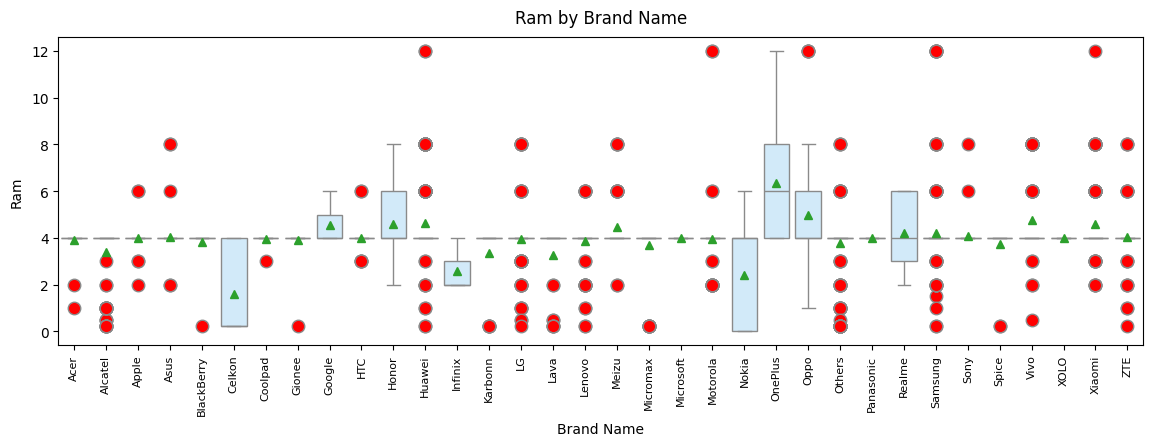

In [24]:
# Create box plot for RAM by brand name
boxplots_by_cat_and_num_atts(df_Recell, 'brand_name', 'ram')    

#### Observations:
* The standard RAM size of almost all brands is 4GB 
* Celkon and Infinix manufacture devices with RAM sizes 4GB and less
* Honor, Nokia, Oppo, Realme primarily build devices with RAM size between 1GB and 8GB
* Google devices are between 4GB and 6GB 
* Oneplus manufactures devices with RAM from 4GB up to a high of 12GB

### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

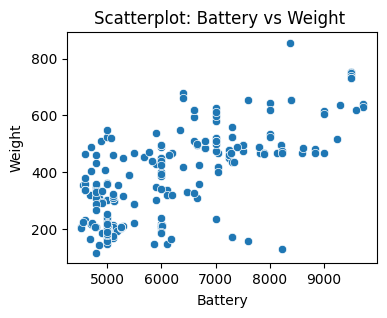

In [25]:
# Filter dataframe by battery values  greater than 4500
df_battery = df_Recell[df_Recell['battery']>4500]

# Create plot figure
plt.figure(figsize=(4,3))

# Create scatter plot by battery and weight
scatter_plots(df_battery, 'battery', 'weight', 'Battery', 'Weight')

#### Observations:
* As the battery size increases, the weight tends to increase

### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [26]:
# Filter screen size records for those greater than 6 inches
# Convert inches to centimeters for the question
df_screen = df_Recell[df_Recell['screen_size']>6*2.54]

# Show the number of rows and columns of the filtered dataframe
df_screen.shape

(1099, 15)

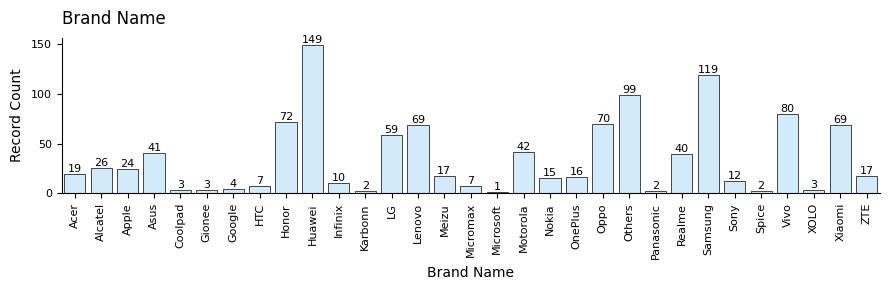

__________________________________________________________________________________________________________________________


In [27]:
# Create a bar plot of the brand name
bar_plots(df_screen, 'brand_name')  

#### Observations:
* There are 1099 phones and tablets available across the different brands with a screen size larger than 6 inches
* Huawei has the highest number of devices available with a screen size larger than 6 inches

### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [28]:
# Filter the selfie camera MP for record values greater than 8 MP
df_selfie = df_Recell[df_Recell['selfie_camera_mp']>8]
                      
# Show the number of rows and columns of the filtered dataframe                     
df_selfie.shape

(655, 15)

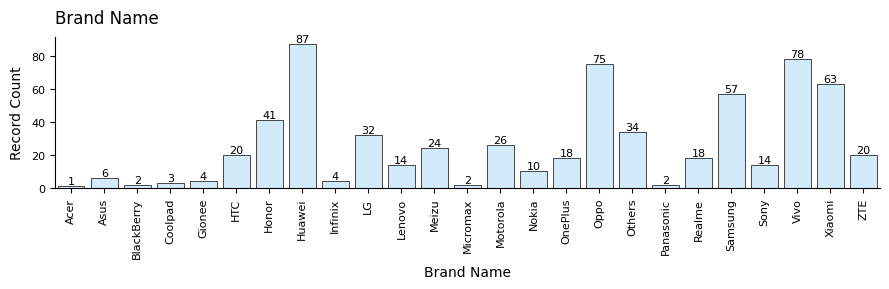

__________________________________________________________________________________________________________________________


In [29]:
# Create a bar plot of the filtered brand name
bar_plots(df_selfie, 'brand_name')

#### Observations:
* There are many brands available with a selfie camera larger than 8MP
* Huawei, Vivo, and Oppo have the most devices available for sale

### 7. Which attributes are highly correlated with the normalized price of a used device?

In [30]:
# Filter the numerical correlated results dataframe for all columns where the normalized use price is not zero 
df_norm_corr = df_corr.normalized_used_price[df_corr['normalized_used_price']!=1]

# Reset the index of the dataframe
df_norm_corr = pd.DataFrame(data=df_norm_corr).reset_index()

# Rename columns for easier understanding
df_norm_corr.rename(columns={'index':'attribute', 'normalized_used_price':'correlation'}, inplace=True)

# Add a column to the dataframe
df_norm_corr['Corr_type']=''

# For each row in the dataframe, determine the level of correlation the 
# normalized used price has to the attribute row
for index, row in df_norm_corr.iterrows():
    if abs(df_norm_corr['correlation'][index]) < 0.5:
        df_norm_corr.at[index,'Corr_type'] = 'No correlation'
    elif abs(df_norm_corr['correlation'][index]) < 0.7:
        df_norm_corr.at[index,'Corr_type'] = 'Moderately correlated'    
    elif abs(df_norm_corr['correlation'][index]) < 1:
        df_norm_corr.at[index,'Corr_type'] = 'Highly correlated'

# Display the dataframe
df_norm_corr

attribute  correlation              Corr_type
0           screen_size     0.614785  Moderately correlated
1        main_camera_mp     0.587302  Moderately correlated
2      selfie_camera_mp     0.608074  Moderately correlated
3            int_memory     0.190993         No correlation
4                   ram     0.520289  Moderately correlated
5               battery     0.613619  Moderately correlated
6                weight     0.382354         No correlation
7             days_used    -0.358264         No correlation
8  normalized_new_price     0.834496      Highly correlated

#### Observations:
* The normalized_new_price is highly correlated to the normalized_used_price
* The screen_size, main_camera_mp, selfie_camera_mp, ram, and battery are moderately correlated 
  to the normalized_used_price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [31]:
# Determine the number of missing values in all the attributes
df_Recell.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

#### Observations:
* Missing values are in main_camera_mp (179), selfie_camera_mp (2), int_memory (4), ram (4), battery (6) and weight(7)

In [32]:
# Define function to help determine the relationship missing values in a column have with other numerical attributes
def analysis_mv(df, cols, att, Recell_MV):
    """
    Create function to determine if an attribute containing missing values
    has a meaningful relationship with other numerical attributes based
    on segregating the information into 'with' and 'without' missing data buckets 
    
    df: dataframe to perform reporting
    cols: True/False value
    att: attribute to evaluate a relationship with other numerical columns
    Recell_MV: dataframe containing the df index number and a True/False value 
               designating whether the row contains a missing value for the
               attribute (att)
    """
    
    # Create dictionary for True/False values for missing vales buckets
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    # Create a labels dataframe
    labels=[]
    
    # Create series with True/False index names and no values assigned
    box_sr = pd.Series('', index=[False,True])
    
    # Cycle through the True/False unique values in the index dataframe
    for poss in Recell_MV.unique():
        
        
        # Filter the Recell_MV for the True/Flase condition in the loop.
        # Then match the filtered record to the df dataframe by the associated
        # index numbers. Retrieve the attribute (att) value, and ignore is NaN.
        # If df value is not NaN, assign the value to the True/False column
        # of the box_sr dataframe 
        box_sr[poss]= df[Recell_MV == poss][att].dropna() 
        
        #Assign the appropriate label based on the True/False loop
        labels.append(MV_labels[poss])
    
    # Create the plot
    plt.figure(figsize=(6,3))
    
    # Set the flier type, color, and size of the outliers 
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')  
    
    # Create a boxplot of the attribute     
    ax = plt.boxplot(box_sr, vert=False, 
                     showmeans=True, flierprops=flierprops,
                     patch_artist=True) 
    
    # Set ytick values using the labels dataframe
    plt.yticks([1,2], labels)
    
    # Add title and labels
    plt.xlabel(string.capwords(cols.replace('_',' ')))
    plt.title('Diagnosis of Missing Values For {} Using Boxplot Of {}'
              .format(string.capwords(cols.replace('_',' ')),
                      string.capwords(att.replace('_',' '))
                     ))
     
    # Set the background color of the box plot    
    for patch, color in zip(ax['boxes'], ['#CCECFF','#CCECFF']):
        patch.set_facecolor(color)
    
    # Show the plot
    plt.show()    

    
    # Retrieve and print the mean value contained in the box plot for the associated missing value records
    print('With Missing Values: Mean is {}'
          .format(round(ax['means'][1].get_data()[0][0],2)))
    
    # Retrieve and print the mean value contained in the box plot for the associated non-missing value records
    print('Without Missing Values: Mean is {}'
          .format(round(ax['means'][0].get_data()[0][0],2)))
    print('\n')   
 

    # Retrieve and print the upper and lower whisker values contained in the box plot 
    # for the associated missing value records
    print('With Missing Values: Lower whisker is cap {} and upper whisker cap {}'
          .format(round(ax['whiskers'][2].get_data()[0][1],2), round(ax['whiskers'][3].get_data()[0][1],2) ))
    
    # Retrieve and print the upper and lower whisker values contained in the box plot 
    # for the associated non-missing value records    
    print('Without Missing Values: Lower whisker cap is {} and upper whisker cap {}'
          .format(round(ax['whiskers'][0].get_data()[0][1],2), round(ax['whiskers'][1].get_data()[0][1],2) ))    
    print('\n')
    
    # Create 2 groups of data based whether the record has the missing attribute value
    group_1_data = df[Recell_MV == poss][att].dropna()
    group_2_data = df[~Recell_MV == poss][att].dropna()     
    
    # Run a t-test of independence to determine if there is a meaningful relationship
    # between the 2 independent groups
    p_value = ttest_ind(group_1_data, group_2_data).pvalue

    # return the p-value
    return round(p_value,6)   

In [33]:
# Define function to help determine the relationship missing values in a column have with other categorical attributes
def cat_analysis_mv(df, cols, att, Recell_MV):
    """
    Create function to determine if an attribute containing missing values
    has a meaningful relationship with other categorical attributes based
    on segregating the information into 'with' and 'without' missing data buckets 
    
    df: dataframe to perform reporting
    cols: True/False value
    att: attribute to evaluate a relationship with other categorical columns
    Recell_MV: dataframe containing the df index number and a True/False value 
               designating whether the row contains a missing value for the
               attribute (att)
    """
    
    # Create dictionary for True/False values for missing vales buckets
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    # Create plot figure
    plt.figure(figsize=(10,4))
    
    # Cycle through the True/False unique values in the index dataframe
    for i, poss in enumerate(Recell_MV.unique()):
        
        # Creating first subplot
        plt.subplot(1,2,i+1)
        
        #Filter the Recell_MV for the True/Flase condition in the loop
        BM = Recell_MV == poss
        

        # Filtered record to the df dataframe by the associated
        # BM index numbers. Retrieve the attribute (att) value.
        # Order by the df dataframe attribute values
        ax = sns.countplot(data=df[BM],
                   x=att,
                   color='#CCECFF',
                   linewidth=.5, edgecolor='black',
                   order=df[BM][att].sort_values())  
        
        #Assign the appropriate label based on the True/False loop
        labels.append(MV_labels[poss])
        
        # Add title and labels
        plt.title('Diagnosis of Missing Values For {}\n{}:{}'
                  .format(string.capwords(cols.replace('_',' ')),
                          string.capwords(att.replace('_',' ')),
                          MV_labels[poss]
                         ))
        plt.xlabel(string.capwords(cols.replace('_',' ')))
        plt.ylabel('Record Count', fontsize=10, labelpad=5)

        
        # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
        # else rotate the x-tick label by 90 degrees for readability
        if df[att].nunique() < 20:
            plt.xticks(rotation=0, fontsize=8) 
            ax.bar_label(ax.containers[0], fontsize=9) # include the bar value
        elif df[Recell_MV == poss][att].nunique() < 20:
            plt.xticks(rotation=90, fontsize=8)               
            plt.yticks(fontsize=8)
            ax.bar_label(ax.containers[0], fontsize=9) # include the bar value
            plt.tight_layout()          
        else:
            plt.xticks(rotation=90, fontsize=8)               
            plt.yticks(fontsize=8)
            plt.tight_layout()    
    
        # Hide the top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    # Show the plot
    plt.show()    
    
    # Create a crosstab contingency table of the Recell_MV and df dataframe filtered by the attribute(att)
    contingency_table = pd.crosstab(Recell_MV, df[att]) 
    
    # Run a chi-square test of independence to determine if there is a meaningful relationship
    # between the 2 independent groups(missing and non-missing data buckets for the attribute value)
    p_value = chi2_contingency(contingency_table)[1]

    # return the p-value
    return round(p_value,6)  

In [34]:
# Define function to determine the result of hypothesis tests of independence
def p_value_analysis(p_value, cols, att):
    """
    Determine the result of hypothesis tests of independence
    
    p_value: p-value of independence test
    cols: columns of missing values being analyzed
    att: attribute tested to see if the missing values have an impact on the attribute value
    
    """
    
    
    # Determine if the hypothesis is rejected or failed to reject based on the p-value and level of significance
    if p_value < 0.05:
        print('The p-value of {:.4f} is less than the level of significance of 5%, therefore we \
               \nreject the null hypothesis that {} and {} means are equal to each\
               \nother indicating the 2 attributes have a meaningful relationship.'
              .format(round(p_value,5), cols, att))
    else:
        print('The p-value of {:.4f} is greater than or equal to the level of significance of 5%, \
               \ntherefore we fail to reject the null hypothesis that {} and {}\
               \nmeans are equal to each other indicating the 2 attributes have no meaningful relationship'.format(p_value, cols, att))
    print('\n')

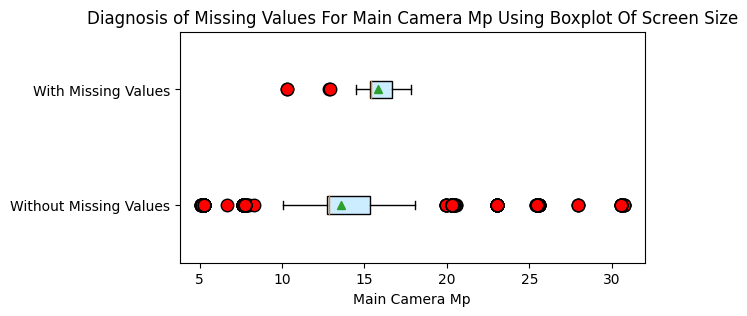

With Missing Values: Mean is 15.85
Without Missing Values: Mean is 13.6


With Missing Values: Lower whisker is cap 14.5 and upper whisker cap 17.81
Without Missing Values: Lower whisker cap is 10.03 and upper whisker cap 18.08


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and screen_size means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




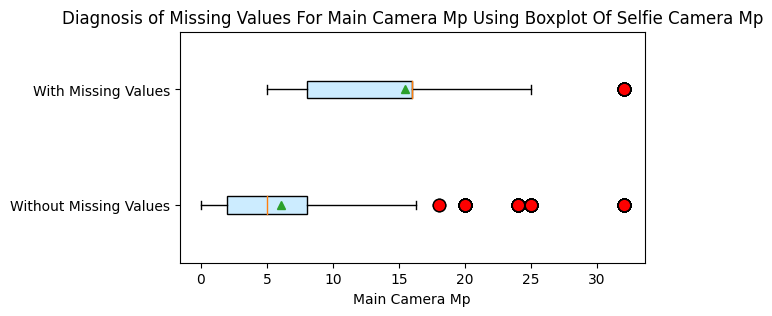

With Missing Values: Mean is 15.46
Without Missing Values: Mean is 6.07


With Missing Values: Lower whisker is cap 5.0 and upper whisker cap 25.0
Without Missing Values: Lower whisker cap is 0.0 and upper whisker cap 16.3


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and selfie_camera_mp means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




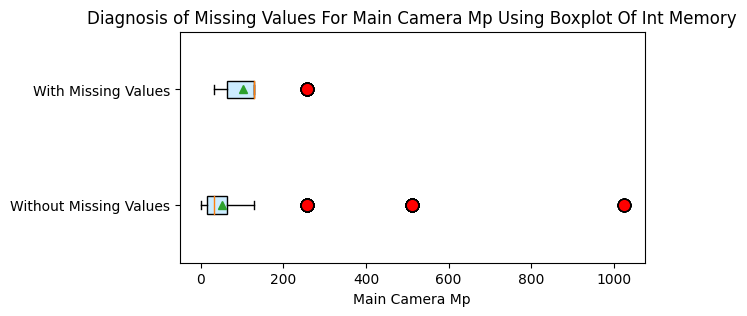

With Missing Values: Mean is 102.79
Without Missing Values: Mean is 51.93


With Missing Values: Lower whisker is cap 32.0 and upper whisker cap 128.0
Without Missing Values: Lower whisker cap is 0.01 and upper whisker cap 128.0


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and int_memory means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




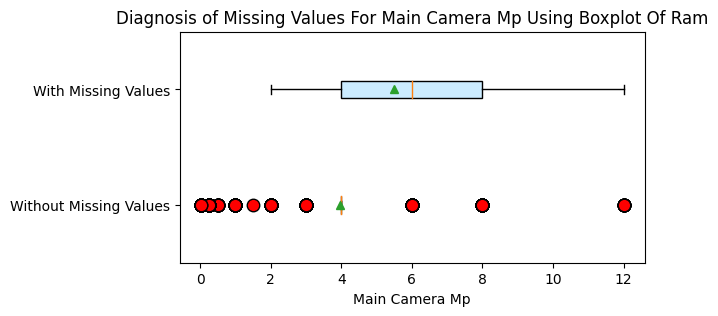

With Missing Values: Mean is 5.48
Without Missing Values: Mean is 3.96


With Missing Values: Lower whisker is cap 2.0 and upper whisker cap 12.0
Without Missing Values: Lower whisker cap is 4.0 and upper whisker cap 4.0


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and ram means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




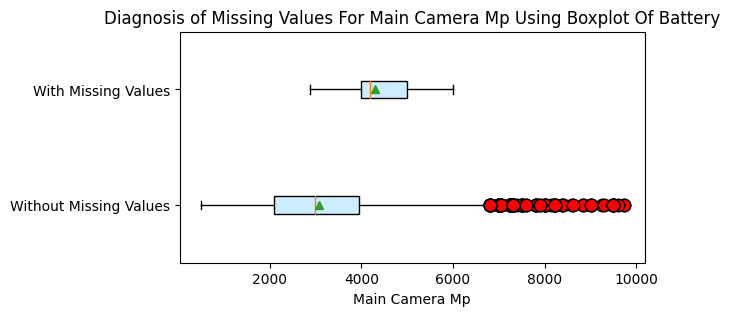

With Missing Values: Mean is 4304.13
Without Missing Values: Mean is 3069.3


With Missing Values: Lower whisker is cap 2870.0 and upper whisker cap 6000.0
Without Missing Values: Lower whisker cap is 500.0 and upper whisker cap 6700.0


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and battery means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




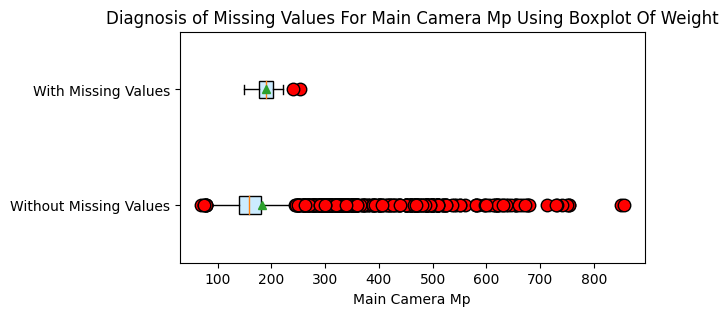

With Missing Values: Mean is 189.72
Without Missing Values: Mean is 182.37


With Missing Values: Lower whisker is cap 150.0 and upper whisker cap 222.0
Without Missing Values: Lower whisker cap is 79.0 and upper whisker cap 243.0


The p-value of 0.2790 is greater than or equal to the level of significance of 5%,                
therefore we fail to reject the null hypothesis that main_camera_mp and weight               
means are equal to each other indicating the 2 attributes have no meaningful relationship




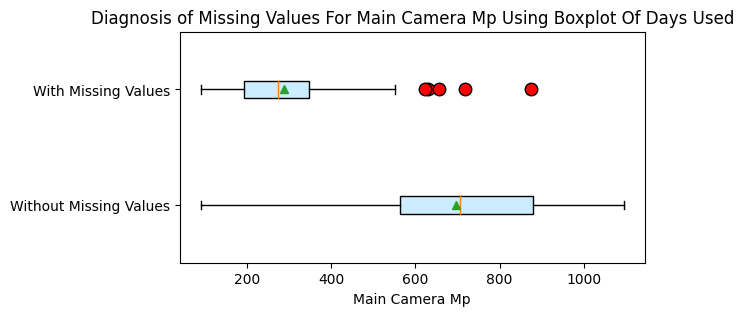

With Missing Values: Mean is 287.12
Without Missing Values: Mean is 696.06


With Missing Values: Lower whisker is cap 91.0 and upper whisker cap 552.0
Without Missing Values: Lower whisker cap is 91.0 and upper whisker cap 1094.0


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and days_used means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




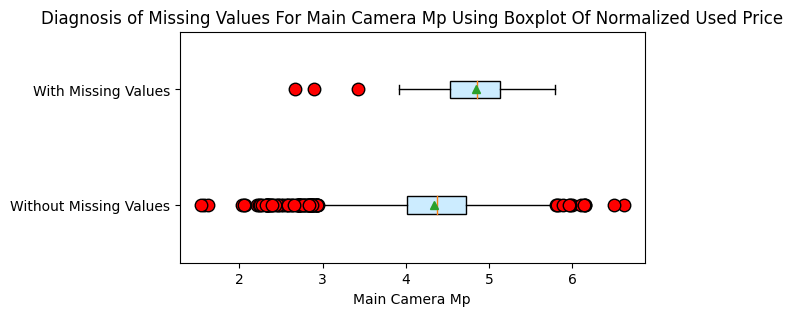

With Missing Values: Mean is 4.84
Without Missing Values: Mean is 4.34


With Missing Values: Lower whisker is cap 3.92 and upper whisker cap 5.79
Without Missing Values: Lower whisker cap is 2.96 and upper whisker cap 5.79


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and normalized_used_price means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




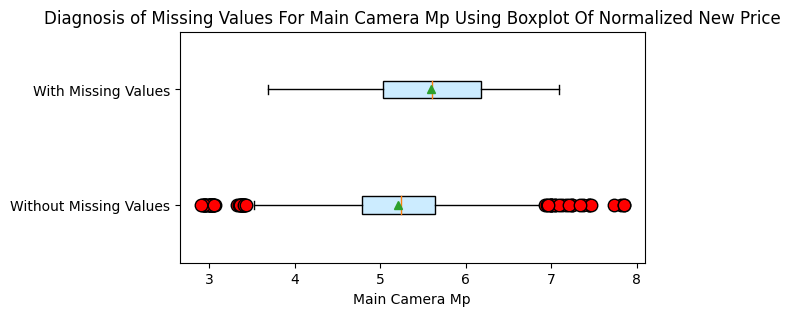

With Missing Values: Mean is 5.59
Without Missing Values: Mean is 5.21


With Missing Values: Lower whisker is cap 3.69 and upper whisker cap 7.09
Without Missing Values: Lower whisker cap is 3.53 and upper whisker cap 6.91


The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and normalized_new_price means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




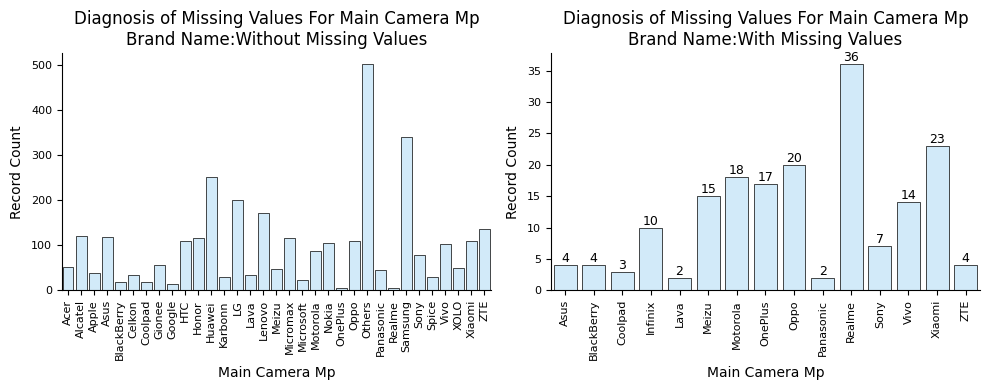

The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and brand_name means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




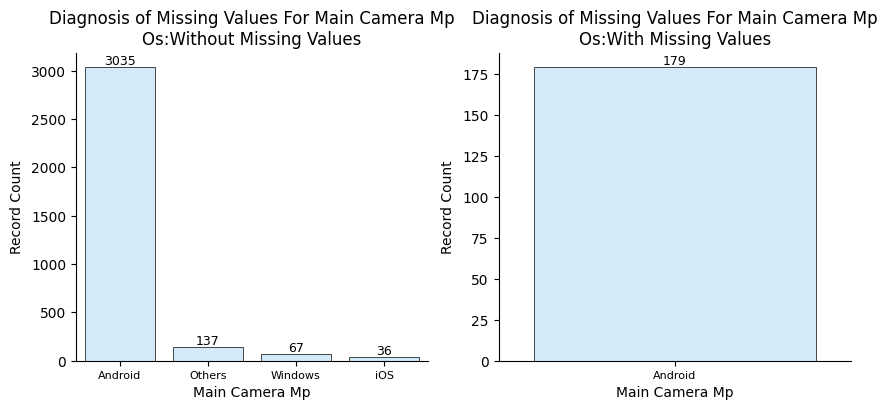

The p-value of 0.0028 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and os means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




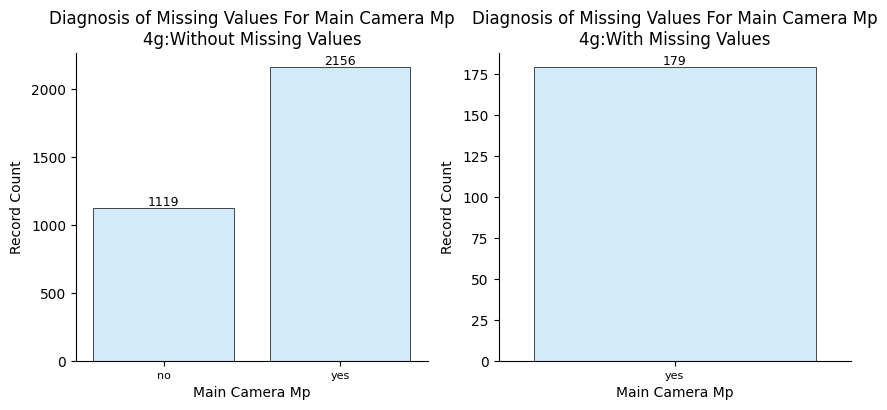

The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and 4g means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




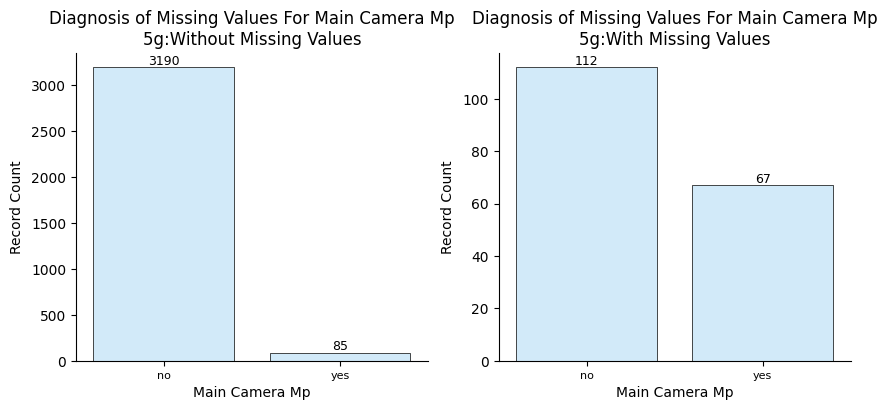

The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and 5g means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




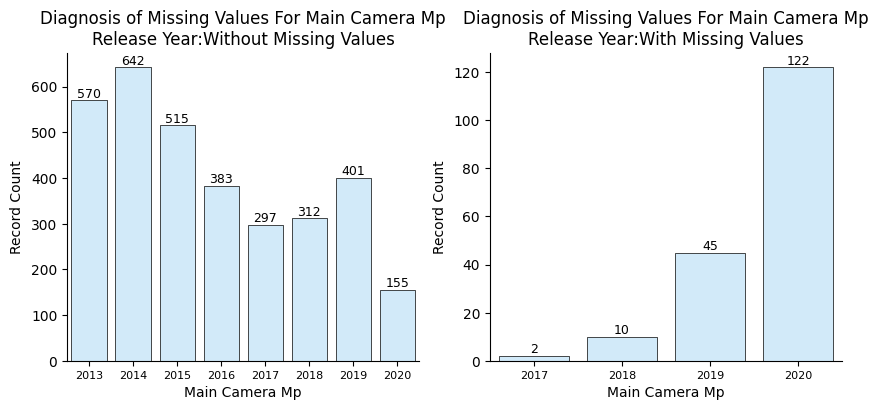

The p-value of 0.0000 is less than the level of significance of 5%, therefore we                
reject the null hypothesis that main_camera_mp and release_year means are equal to each               
other indicating the 2 attributes have a meaningful relationship.




In [35]:
# For attributes that have more than 10 missing values
# Attributes missing lt less than 10 values will use an imputed method
df_missing_cols = [col for col in df_Recell.columns if df_Recell[col].isnull().sum()>10]

# Create dataframe of reporting columns
df_missing_relationship = pd.DataFrame(columns=['Miss_Column','Attribute','P_value'])

# Cycle through each column that has more than 10 missing values
for cols_MV in df_missing_cols:
    
    # Create a dataframe of True/False boolean values for whether the row contains a missing value in the column (cols)
    Recell_MV = df_Recell[cols_MV].isna()
    
    # Create a copy of the dataframe numerical attribute list
    df_num_rel_list = df_num_list.copy()
    
    # Remove the column name (cols) associated with the the copied list
    df_num_rel_list.remove(cols_MV)

    # Cycle through each numerical attribute in the list
    # Analyze the relationship between the column (cols) and the attribute (att)
    for att in df_num_rel_list:
        
        # Call the analysis_mv function
        p_value = analysis_mv(df_Recell, cols_MV, att, Recell_MV)
        
        # Call the p_value_analysis function
        p_value_analysis(p_value, cols_MV, att)   
        
        # Populate a list of the column with missing value, the attribute to test for independence, and the p-value 
        list = [cols_MV, att,p_value]
        
        # Add the list to the df_missing_relationship dataframe
        df_missing_relationship.loc[len(df_missing_relationship)]=list
        
    for att in df_cat_list:
        
        # Call the cat_analysis_mv function
        p_value = cat_analysis_mv(df_Recell, cols_MV, att, Recell_MV)
        
        # Call the p_value_analysis function
        p_value_analysis(p_value, cols_MV, att) 
        
        # Populate a list of the column with missing value, the attribute to test for independence, and the p-value 
        list = [cols_MV, att,p_value]
        
        # Add the list to the df_missing_relationship dataframe
        df_missing_relationship.loc[len(df_missing_relationship)]=list        
        
        
        
        

In [36]:
# Print the results of the independent test of the missing value column to other columns
print(df_missing_relationship)

       Miss_Column              Attribute   P_value
0   main_camera_mp            screen_size  0.000000
1   main_camera_mp       selfie_camera_mp  0.000000
2   main_camera_mp             int_memory  0.000000
3   main_camera_mp                    ram  0.000000
4   main_camera_mp                battery  0.000000
5   main_camera_mp                 weight  0.279006
6   main_camera_mp              days_used  0.000000
7   main_camera_mp  normalized_used_price  0.000000
8   main_camera_mp   normalized_new_price  0.000000
9   main_camera_mp             brand_name  0.000000
10  main_camera_mp                     os  0.002776
11  main_camera_mp                     4g  0.000000
12  main_camera_mp                     5g  0.000000
13  main_camera_mp           release_year  0.000000


#### Observations
* Main_camera_mp missing values have a meaningful relationship with all attributes except weight

* Main_camera_mp missing value analysis against other numerical attributes:
    - Screen size mean is higher with missing values(15.85) vs without missing values(13.6)
    - Selfie camera MP mean is higher with missing values(15.46) vs without missing values(6.07)
    - Selfie camera MP whiskers have a higher and wider range(5.0 and 25.0) vs without missing values(0.0 and 16.3)
    - Int memory mean is higher with missing values(102.79) vs without missing values(51.93)
    - RAM whiskers have a higher and wider range(2.0 and 12.0) vs without missing values(4.0 and 4.0)    
    - Battery mean is higher with missing values(4304.13) vs without missing values(3069.3)    
    - Battery whiskers have a smaller range(2870 and 6000) vs without missing values(500 and 6700) 
    - Days used is lower with missing values(287.12) vs without missing values(696.06)
    - Days used whiskers have a smaller range(91 and 552) vs without missing values(91 and 1094)     
    - Normalized used price mean is higher with missing values(4.84) vs without missing values(4.34) 
    - Normalized new price mean is higher with missing values(5.59) vs without missing values(5.21) 
    
* Main_camera_mp missing value analysis against categorical attributes:
    - All are Android OS devices(179)
    - All are 4g available devices(179) 
    - All are from the years 2017 to 2020
    - Many 2020 devices are missing the main_camera_mp value (122 out of 277)
    - Many 5g available devices are missing the main_camera_mp value (67 out of 152) 
    - Many Realme devices are missing the main_camera_mp value (36 out of 41)
    - Many OnePlus devices are missing the main_camera_mp value (17 out of 22)
    - All Infinix devices are missing the main_camera_mp value (10 out of 10)

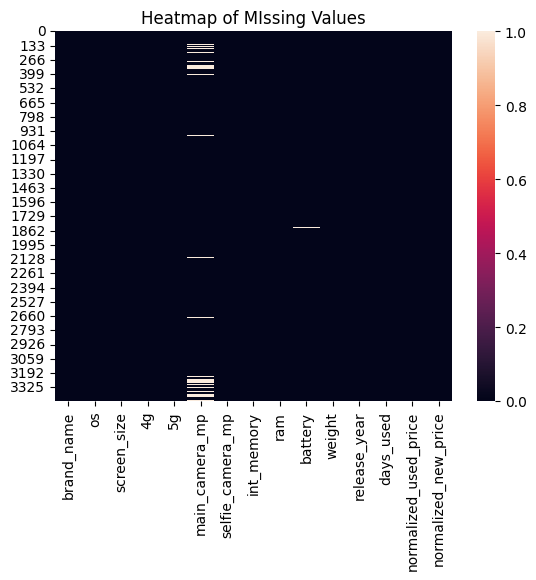

In [37]:
# Create a heatmap showing which cells in the dataframe have missing values
sns.heatmap(df_Recell.isna())

# Add title
plt.title('Heatmap of MIssing Values')

# Show plot
plt.show()

#### Observations:
* Missing main_camera_mp values tend to have occurred in the beginning and ends of the datafile

In [38]:
# Create function to report on gap in the dataset
def main_camera_mp_missing_rpt():

    # Create a report based on the results of the missing value independence test.
    # Examine the unique values of other columns that were associated with the 
    # missing values in the main_camera_mp columns


    # Filter the df_Recell dataframe by the unique values present in the rows where 
    # the main_camera_mp value was missing
    Recell_Flt = df_Recell[
        (df_Recell['os']=='Android') &
        (df_Recell['4g']=='yes') &
        (df_Recell['release_year'].isin([2017, 2018, 2019, 2020])) &
        (df_Recell['brand_name'].isin(['Realme','Xiaomi','Oppo','Motorola','OnePlus',
                                       'Meizu','Vivo','Infinix','Sony','ZTE','Asus',
                                       'BlackBerry','Coolpad','Lava','Panasonic'])) 
        ]

    # Find all the records where the main_camera_mp value is missing (NaN)
    Recell_MV = Recell_Flt[Recell_Flt['main_camera_mp'].isna()]

    # Find all the records where the main_camera_mp value is populated
    Recell_NMV = Recell_Flt[~Recell_Flt['main_camera_mp'].isna()]

    # Create dictionary for True/False values for missing vales buckets
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    # Create the plot figure
    plt.figure(figsize=(10,4))

    # Creating first subplot
    plt.subplot(1,2,1)

    # Create a countplot of the filtered non-missing values for brand name
    # Add a hue based on the release year
    # Order the bars but the brand name
    ax = sns.countplot(data=Recell_NMV,
                       x='brand_name',
                       palette ='bright',
                       hue='release_year',
                       linewidth=.5, edgecolor='black',
                       order=Recell_MV['brand_name'].value_counts().index.sort_values())

    # Add title and labels
    plt.title('Diagnosis of Missing Values For Main_Camera_MP\nBrand Name: Without Missing Values')
    plt.ylabel('Record Count', fontsize=10, labelpad=5)
    plt.xlabel('Brand Name', fontsize=10, labelpad=5)

    # Add tick properties
    plt.xticks(rotation=90, fontsize=8)               
    plt.yticks(fontsize=8)
           
    # Tighten the layout of the subplot           
    plt.tight_layout() 
        
    # Hide the top and right spines of the countplot           
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Creating first subplot
    plt.subplot(1,2,2)
           
    # Create a countplot of the filtered missing values for brand name
    # Add a hue based on the release year
    # Order the bars but the brand name           
    ax = sns.countplot(data=Recell_MV,
                       x='brand_name',
                       palette = 'bright',
                       hue='release_year',
                       linewidth=.5, edgecolor='black',
                       order=Recell_MV['brand_name'].value_counts().index.sort_values())
           
    # Add title and labels           
    plt.title('Diagnosis of Missing Values For Main_Camera_MP\nBrand Name: With Missing Values')
    plt.ylabel('Record Count', fontsize=10, labelpad=5)
    plt.xlabel('Brand Name', fontsize=10, labelpad=5)
           
    # Add tick properties           
    plt.xticks(rotation=90, fontsize=8)               
    plt.yticks(fontsize=8)
           
    # Tighten the layout of the subplots
    plt.tight_layout()   
           
    # Hide the top and right spines of the countplot 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.show()     

#### <a name='link1'>Missing Main Camera MP Issue:</a>

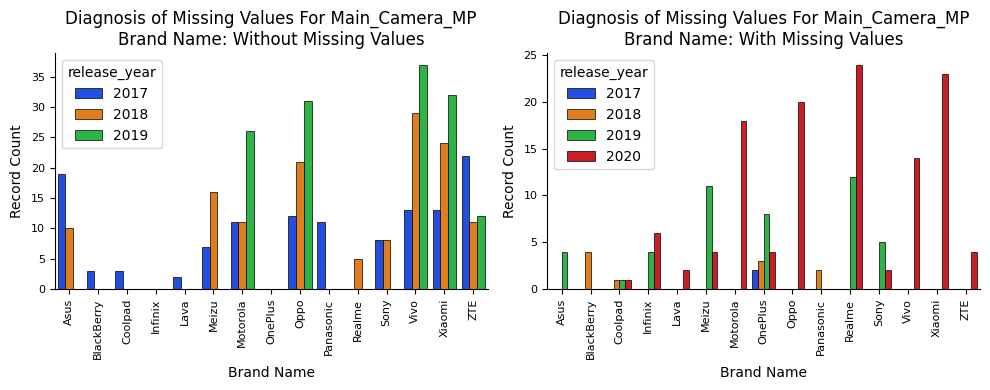

In [39]:
main_camera_mp_missing_rpt()

#### Observations:
* There is missing data for the main_camera_mp attribute. The missing data appears to be for 15 brands that sell 
  Android devices with 4g compatibility. After a specific year ends, each of the 15 brands no longer have the 
  main_camera_mp value populated.

In [40]:
# Make a copy of the df_Recell dataset that will be updated with missing values
df_Recell_Upd = df_Recell.copy()

# Sum the NaN records by attribute
df_Recell_Upd.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [41]:
# Update the selfie_camera_mp, int_memory, ram, battery and weight using the grouped median
# of brand and release year. Median was chosen as each attribute had a skewed distribution
# with a number of outliers that would affect the mean

# Create a list of attributes to update the NaN missing values
cols_upd_lst = ['selfie_camera_mp', 'int_memory', 'ram',
                'battery','weight']

# Cycle through the columns list and update the NaN missing records associated with
# the current column with the median value by brand name and release year
for col in cols_upd_lst:
    df_Recell_Upd[col]=df_Recell_Upd[col].fillna(
        value = df_Recell_Upd.groupby(['brand_name','release_year'])[col].transform('median'))

# Sum the NaN records by attribute to determine if there are more missing values to update    
df_Recell_Upd.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [42]:
# Update the selfie_camera_mp, battery and weight using the grouped median value
# of brand name. Median was chosen as each attribute had a skewed distribution
# with a number of outliers that would affect the mean

# Create a list of attributes to update the NaN missing values
cols_upd_lst = ['selfie_camera_mp','battery','weight']


# Cycle through the columns list and update the NaN missing records associated with
# the current column with the median value by brand name
for col in cols_upd_lst:
    df_Recell_Upd[col]=df_Recell_Upd[col].fillna(
        value = df_Recell_Upd.groupby(['brand_name'])[col].transform('median'))

# Sum the NaN records by attribute to determine if there are more missing values to update    
df_Recell_Upd.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [43]:
# Update the main_camera_mp using brand_name, os, 4g, and 5g attributes to interpolate value.
# Median was chosen as the distribution were skewed with a number of outliers that affected the mean.
# Do not group by release_year interpolation as there was an issue with the missing values 
df_Recell_Upd['main_camera_mp']=df_Recell_Upd['main_camera_mp'].fillna(
    value = df_Recell_Upd.groupby(['brand_name',
                                   'os',
                                   '4g', 
                                   '5g'  
                                  ])['main_camera_mp'].transform('median'))

# Sum the NaN records by attribute to determine if there are more missing values to update 
df_Recell_Upd.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           38
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [44]:
# Update the main_camera_mp using brand_name, os, 4g attributes to interpolate value.
# Median was chosen as the distribution were skewed with a number of outliers that affected the mean.
# Do not group by release_year interpolation as there was an issue with the missing values 
df_Recell_Upd['main_camera_mp']=df_Recell_Upd['main_camera_mp'].fillna(
    value = df_Recell_Upd.groupby(['brand_name',
                                   'os',
                                   '4g' 
                                  ])['main_camera_mp'].transform('median'))

# Sum the NaN records by attribute to determine if there are more missing values to update 
df_Recell_Upd.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [45]:
# Find remaining missing rows
df_Recell_Upd[df_Recell_Upd.isnull().any(axis=1)]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android        17.32  yes  no             NaN   
60     Infinix  Android        15.39  yes  no             NaN   
61     Infinix  Android        15.39  yes  no             NaN   
62     Infinix  Android        15.39  yes  no             NaN   
63     Infinix  Android        15.29  yes  no             NaN   
278    Infinix  Android        17.32  yes  no             NaN   
279    Infinix  Android        15.39  yes  no             NaN   
280    Infinix  Android        15.39  yes  no             NaN   
281    Infinix  Android        15.39  yes  no             NaN   
282    Infinix  Android        15.29  yes  no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   185.0          2020   
62               16.0        32.0  3.0   4000.0   178.0          2019   
63               16.0        32.0  2.0   4000.0   165.0          2019   
278               8.0        32.0  2.0   6000.0   209.0          2020   
279               8.0        64.0  4.0   5000.0   185.0          2020   
280               8.0        32.0  2.0   5000.0   185.0          2020   
281              16.0        32.0  3.0   4000.0   178.0          2019   
282              16.0        32.0  2.0   4000.0   165.0          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245               4.282068              4.597642  
60         173               4.363608              4.711780  
61         256               4.181439              4.505460  
62         316               4.555244              4.602166  
63         468               4.416670              4.871297  
278        320               4.405133              4.605370  
279        173               4.495913              4.702115  
280        329               4.370713              4.487287  
281        356               4.417997              4.605970  
282        497               4.423289              4.866072

#### Observations:
* The Infinix devices do not have a main_camera_mp value populated in the dataset

In [46]:
# Update the main_camera_mp using os, 4g, 5g, int_memory, release_year attributes to interpolate value.
# Median was chosen as the distribution were skewed with a number of outliers that affected the mean.
# Do not group by release_year interpolation as there was an issue with the missing values 
df_Recell_Upd['main_camera_mp']=df_Recell_Upd['main_camera_mp'].fillna(
    value = df_Recell_Upd.groupby(['os',
                                   '4g',
                                   '5g',
                                   'int_memory',
                                   'release_year'
                                  ])['main_camera_mp'].transform('median'))

# Find remaining missing rows
df_Recell_Upd.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

In [47]:
# Add column to show how many years device has existed
current_year = 2021
df_Recell_Upd['years_existed'] = current_year-df_Recell_Upd['release_year'] 
df_Recell_Upd['years_existed'] = df_Recell_Upd['years_existed'].astype(str)
df_Recell_Upd.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price years_existed  
0        127               4.307572              4.715100             1  
1        325               5.162097              5.519018             1  
2        162               5.111084              5.884631             1  
3        345               5.135387              5.630961             1  
4        293               4.389995              4.947837             1

In [48]:
# Drop the release year column
df_Recell_Upd.drop('release_year', axis=1, inplace=True)

### Outliers - Univariate Analysis

In [49]:
# Define function to find the outliers of an attribute
def define_outlier(df, col):
    """
    Define the IQR formula and determine which loaded records are for a columns are outliers
    
    df: datafame
    col: column name
    """
    
    # Define the Q1, Q2, and IQR values to determine outlier range
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    # Determine if a record is an outlier for either the upper or lower whiskers
    # Assign the records a boolean value 
    BM = (df[col]>(Q3+1.5*IQR)) | (df[col]<(Q1-1.5*IQR))
    
    # Return the dataframe boolean values
    return df[BM]

In [50]:
# Define function to find the outliers in a dataframe
def find_outliers(data):
    """
    Find all the numerical outliers in the dataframe
    
    data = dataframe
    """
    
    # Print the number of rows in the dataframe
    print('Total rows:{}'.format(data.shape[0]))
    print('Number of Outliers:')
    print('-'*45)
    
    # Cycle through the numerical columns in the df_num_list list
    for cols in df_num_list:
        
        # Call the define_outlier function to determine which records for a column are outliers
        # Save the outliers in the df_OM dataframe
        df_OM = define_outlier(data, cols)
        
        # Print the column name, number of outliers, and percent of outliers to the total records
        print('{:<21}: {:<5}   Percent:{}%'.format(
            cols,df_OM[cols].count(), round(df_OM[cols].count()/data.shape[0]*100,1)))

In [51]:
# Call the find_outliers function for the df_Recell_Upd dataframe
find_outliers(df_Recell_Upd)

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 450     Percent:13.0%
main_camera_mp       : 5       Percent:0.1%
selfie_camera_mp     : 221     Percent:6.4%
int_memory           : 138     Percent:4.0%
ram                  : 639     Percent:18.5%
battery              : 77      Percent:2.2%
weight               : 368     Percent:10.7%
days_used            : 0       Percent:0.0%
normalized_used_price: 85      Percent:2.5%
normalized_new_price : 66      Percent:1.9%


In [52]:
# Create function to update the identified outliers with the lower or upper whisker value
def treat_outliers(df, col):
    """
    Determine which loaded records for a column are outliers and update them
    to the lower or upper whisker
    
    df: datafame
    col: column name
    """
    
    # Define the Q1, Q2, IQR, lower whisker, and upper whisker values to determine outlier range      
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # All the values smaller than lower_whisker will be assigned the value of lower_whisker
    # All the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

In [53]:
# Cycle through attributes updating outliers to the nearest upper or lower bound
for cols in df_num_list:
    treat_outliers(df_Recell_Upd, cols)

# Call the find_outliers function for the df_Recell_Upd dataframe
find_outliers(df_Recell_Upd)                          

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


### Outliers - Bivariate Analysis

In [54]:
# Define function to find the bivariate outliers of an attribute and brand name
def find_bivariate_outliers(data, att):
    """
    Find the outliers associated with an attribute within a dataframe
    
    data: dataframe
    att: categorical attribute to check for outliers against numerical attributes
    """
    

    # Look for outliers in numerical list but have it grouped by brand name for each attribute
    # Each brand had a different number of outliers in the box plot by attribute and brand above
    
    # Create a list of brand names
    df_brand = df_Recell_Upd[att].unique().tolist()

    # Print the number of rows in the dataframe
    print('Total rows:{}'.format(df_Recell_Upd.shape[0]))
    print('Number of Outliers:')
    print('-'*45)
    
    # Cycle through the numerical columns in the df_num_list list
    for cols in df_num_list:  
        
        # Set the total variable to 0
        total = 0
        
        # Cycle through the numerical columns in the df_num_list list
        for x in df_brand:
            # Filter on the dataframe for the attribute (x) rcords
            df =  df_Recell_Upd[df_Recell_Upd[att]==x]
            
            # Call the define_outlier function to determine which records for a column are outliers
            # Save the outliers in the df_OM dataframe
            df_OM = define_outlier(df, cols)
            
            # Add the number of outlier counts to the total variable
            total += df_OM[cols].count()
        
        # Print the column name, number of outliers, and percent of outliers to the total records
        print('{:<21}: {:<5}   Percent:{}%'.format(
                    cols,total, round(total/df_Recell_Upd.shape[0]*100,1)))   

In [55]:
# Create function to update the identified outliers with the lower or upper whisker value
def treat_bivariate_outliers(df, att):
    """
    Determine which loaded records for a column are outliers and update them
    to the lower or upper whisker
    
    df: datafame
    col: column name
    """

        
    # Create a list of unique values for the attribute
    df_brand = df_Recell_Upd[att].unique().tolist()    
    
    # Cycle through each numerical attribute 
    for cols in df_num_list:  
        
        # Cycle through each brand name, updating outliers with the lower or upper whisker value
        for x in df_brand:
            
            # Define the Q1, Q2, IQR, lower whisker, and upper whisker values to determine outlier range
            Q1 = df_Recell_Upd.loc[(df_Recell_Upd[att]==x),(cols)].quantile(0.25)  # 25th quantile
            Q3 = df_Recell_Upd.loc[(df_Recell_Upd[att]==x),(cols)].quantile(0.75)  # 75th quantile
            IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
            lower_whisker = Q1 - 1.5 * IQR
            upper_whisker = Q3 + 1.5 * IQR

            # all the values smaller than lower_whisker will be assigned the value of lower_whisker
            # all the values greater than upper_whisker will be assigned the value of upper_whisker
            # the assignment will be done by using the clip function of NumPy
            df_Recell_Upd.loc[(df_Recell_Upd[att]==x),(cols)] = np.clip(
                         df_Recell_Upd.loc[(df_Recell_Upd[att]==x),(cols)],
                         lower_whisker, 
                         upper_whisker)

In [56]:
# Create function to find and treat attribute outliers in a dataframe
def process_bivariate_outliers(df, att):
    """
    Find and treat categorical attribute outliers in numerical columns in a dataframe
    
    df: dataframe
    att: attribute    
    """
    
    print('Before {} vs numerical attribute outliers have been processed'.format(att))
    
    # Call the find_bivariate_outliers function for a dataframe and attribute
    find_bivariate_outliers(df, att)
    
    # Call the treat_bivariate_outliers function for a dataframe and attribute
    treat_bivariate_outliers(df, att)
    
    # Print a line after the graphs to delineate between multiple calls
    print('_'*122)
    
    
    print('After {} vs numerical attribute outliers have been processed'.format(att))
    
    # Call the find_bivariate_outliers function again for a dataframe and attribute of remaining outliers
    find_bivariate_outliers(df, att)
    
    # Print a line after the graphs to delineate between multiple calls
    print('_'*122)
    
    # Create boxplots for all numerical attributes by brand name
    for col in df_num_list:
        boxplots_by_cat_and_num_atts(df, att, col) 

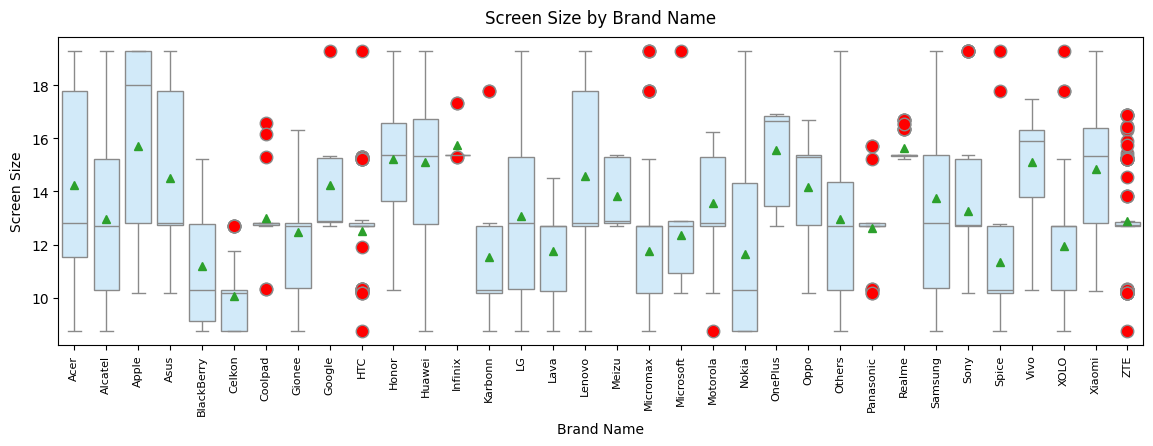

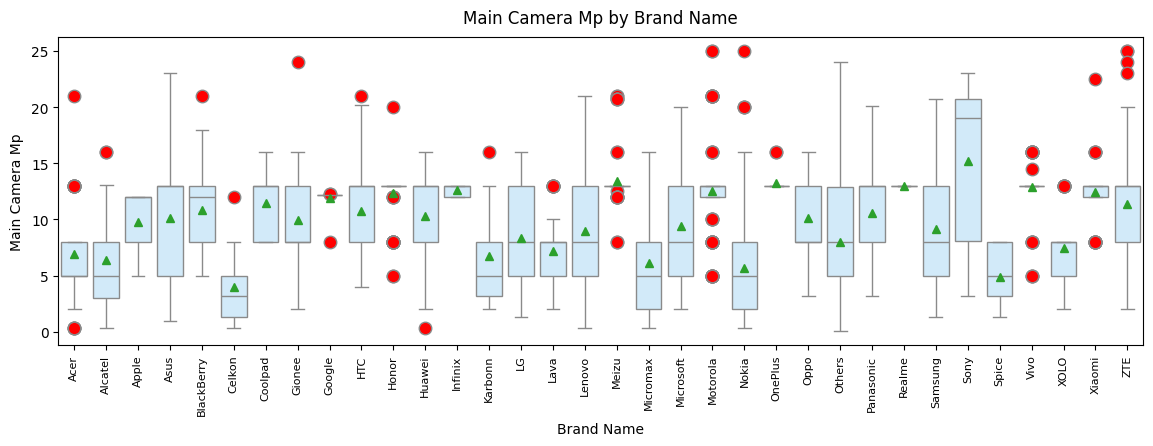

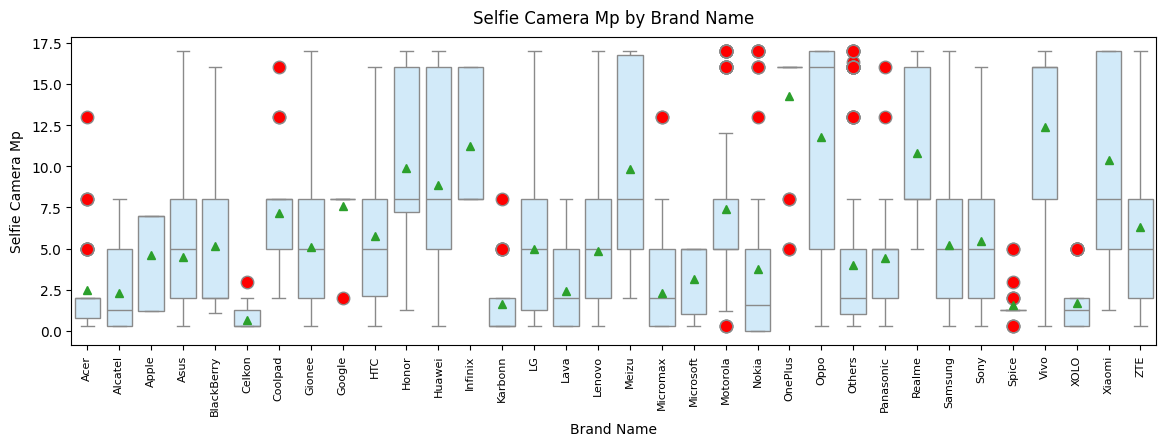

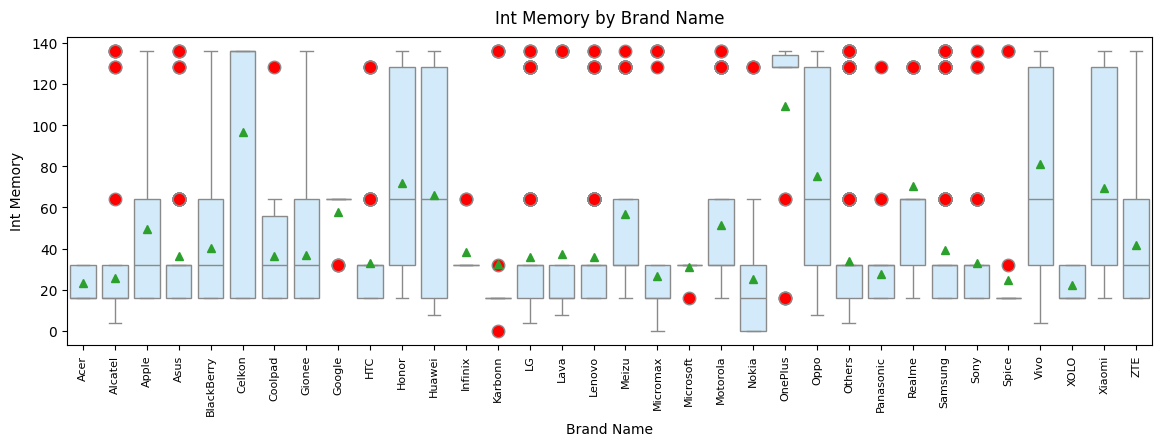

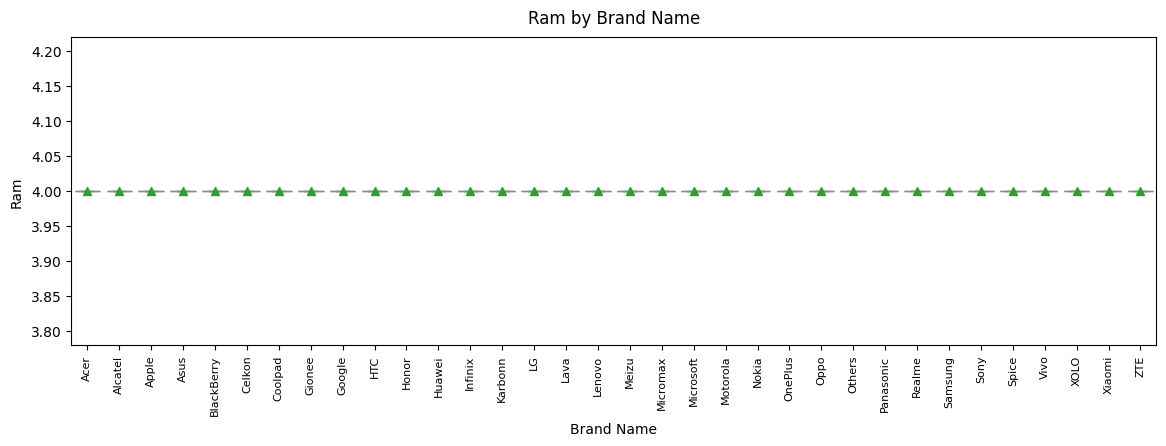

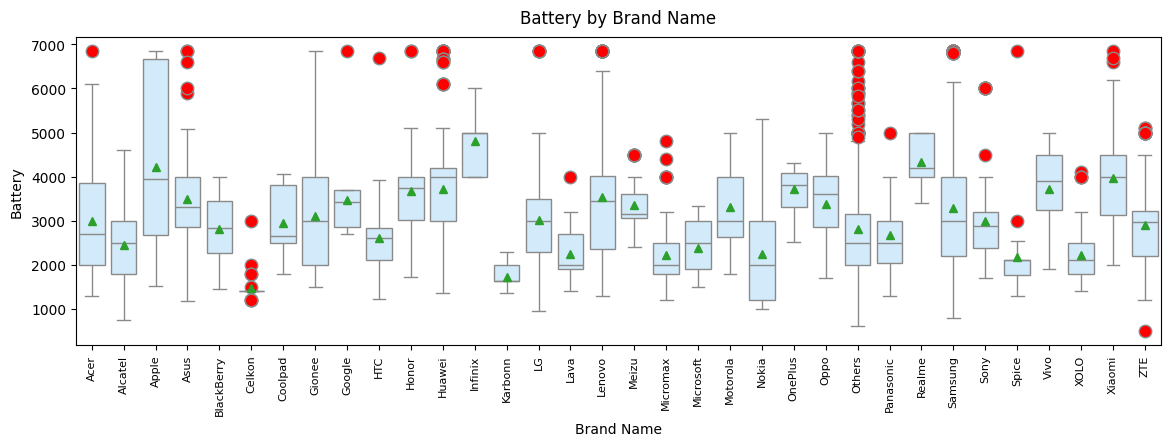

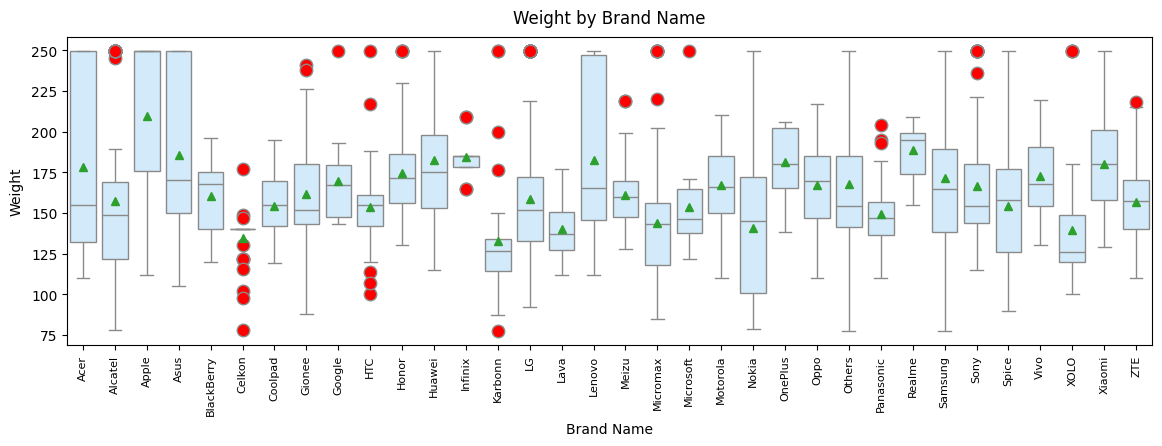

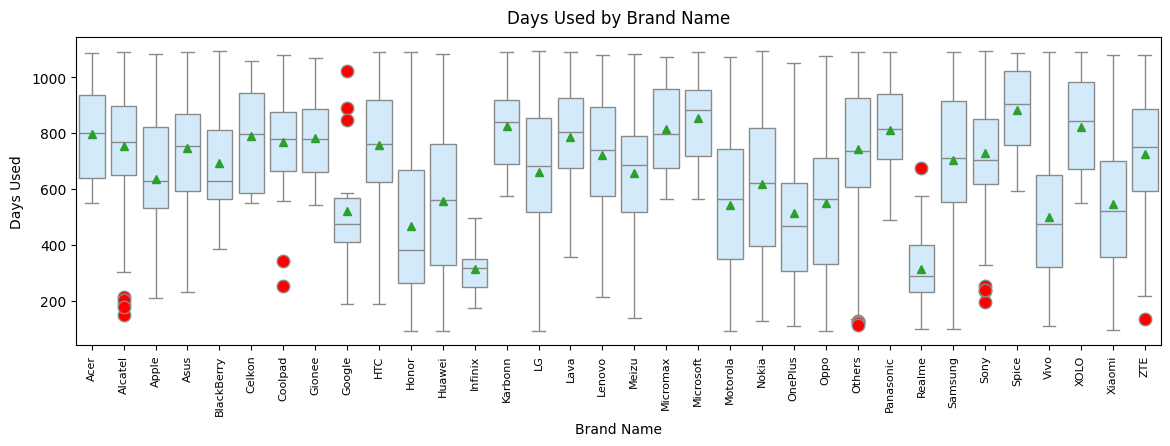

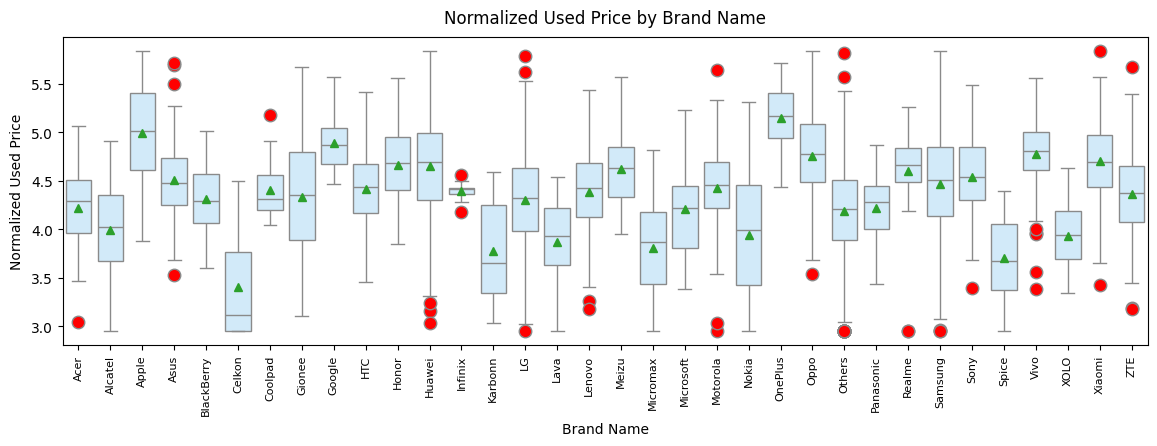

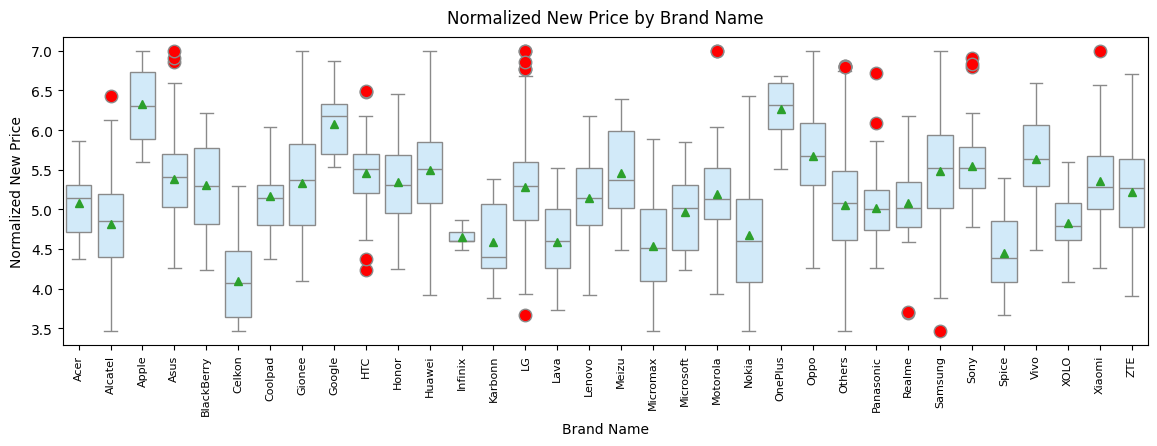

Before brand_name vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 154     Percent:4.5%
main_camera_mp       : 163     Percent:4.7%
selfie_camera_mp     : 114     Percent:3.3%
int_memory           : 368     Percent:10.7%
ram                  : 0       Percent:0.0%
battery              : 160     Percent:4.6%
weight               : 92      Percent:2.7%
days_used            : 20      Percent:0.6%
normalized_used_price: 55      Percent:1.6%
normalized_new_price : 29      Percent:0.8%
__________________________________________________________________________________________________________________________
After brand_name vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
i

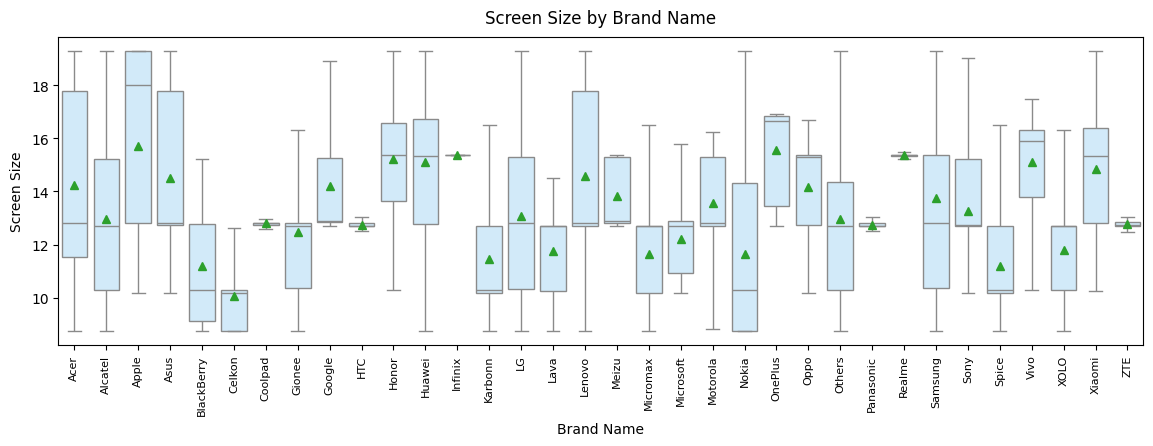

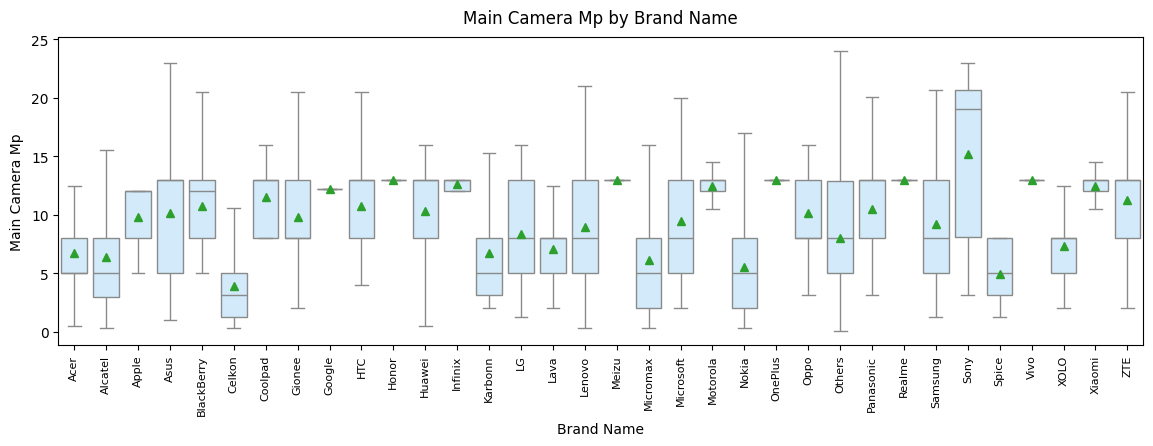

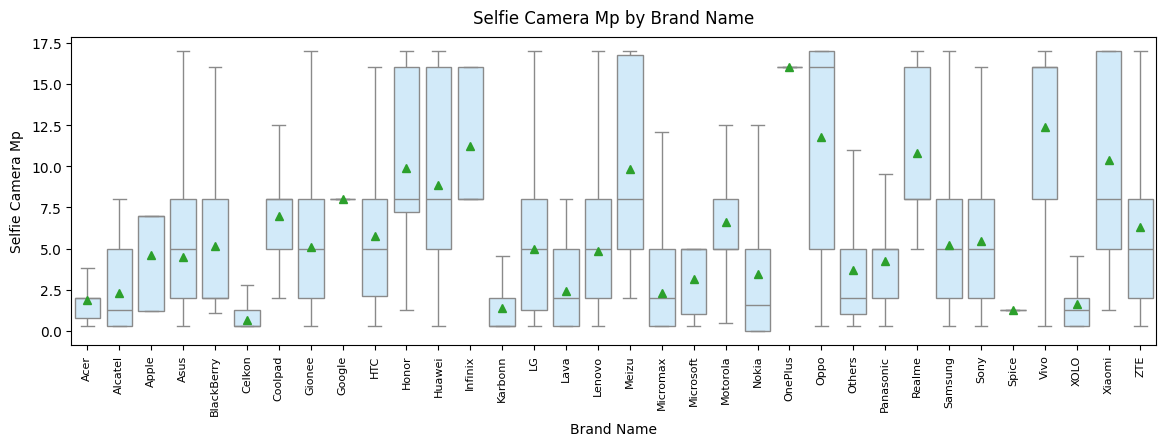

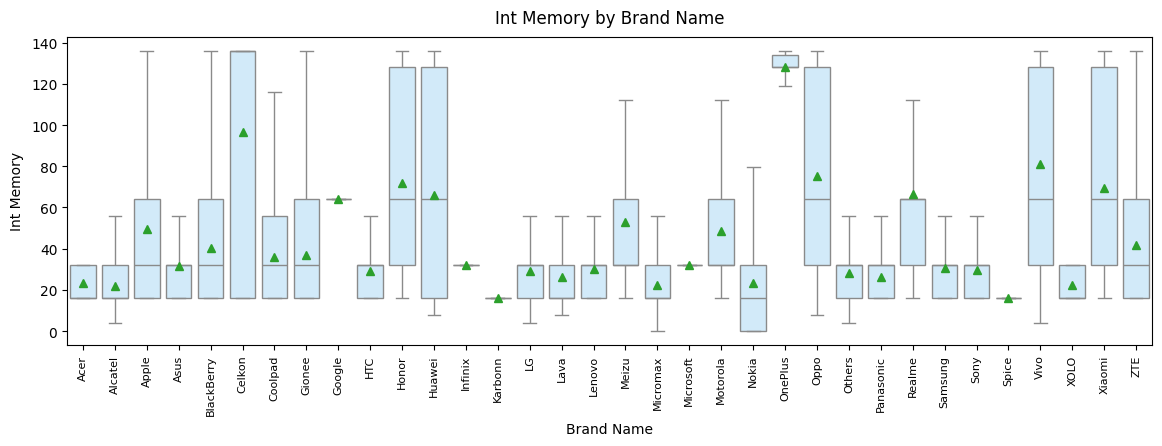

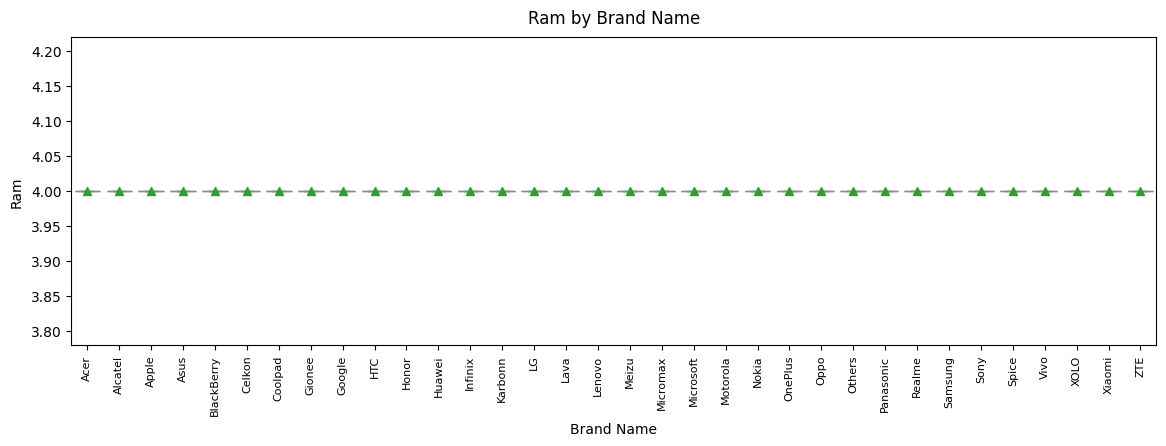

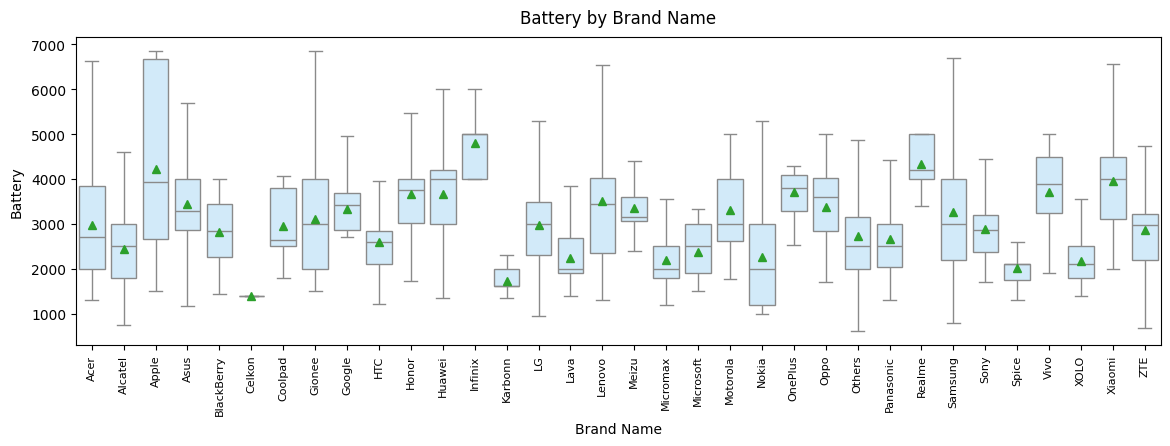

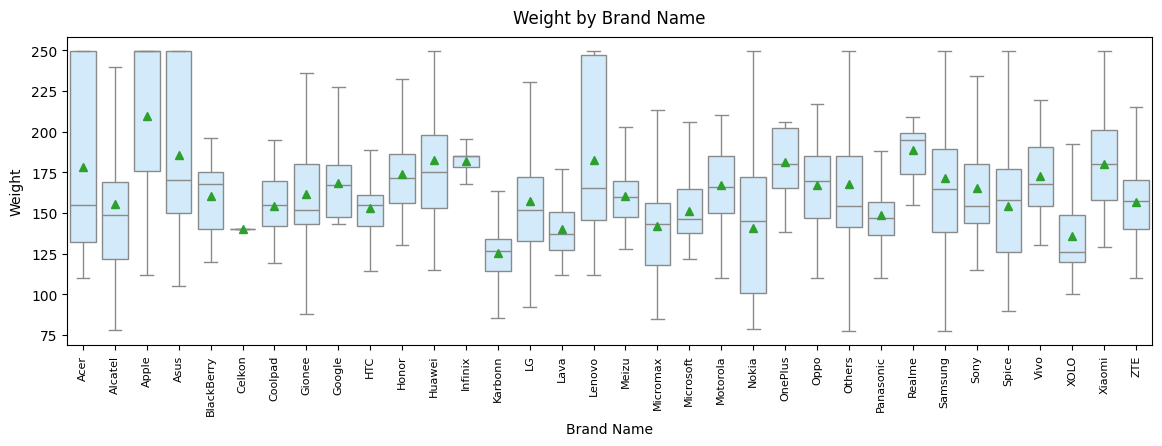

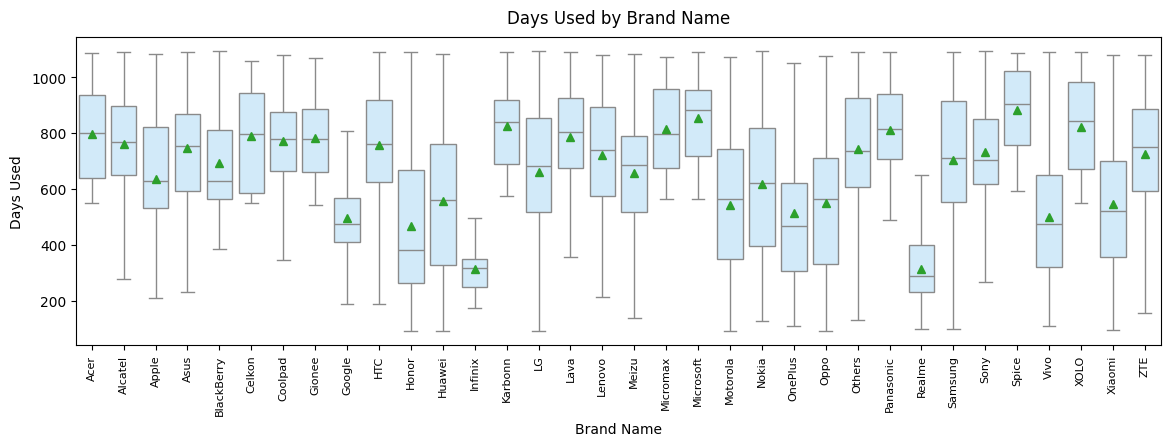

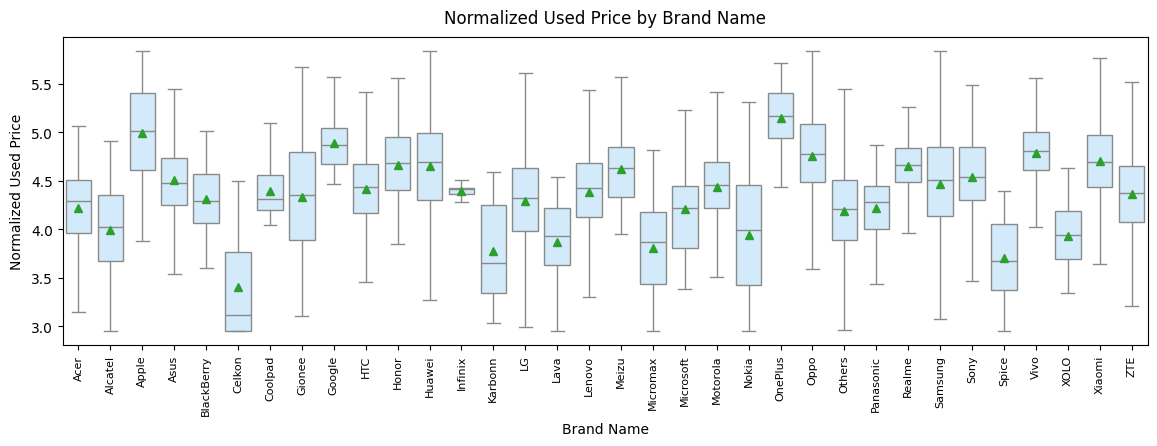

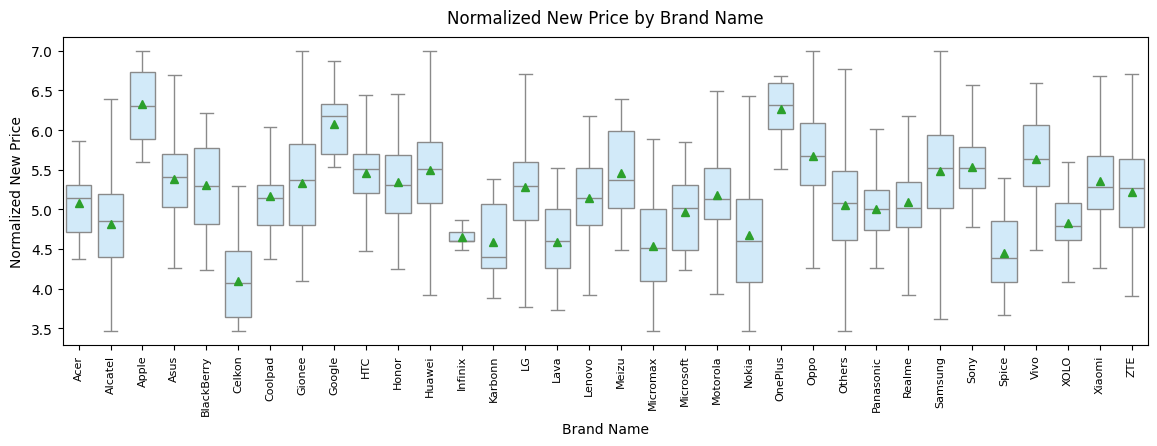

In [57]:
# Create boxplots of numerical attributes by brand name
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, 'brand_name', col)
    
# Call process_bivariate_outliers to find and process outliers of numerical attributes by brand name
process_bivariate_outliers(df_Recell_Upd, 'brand_name')    

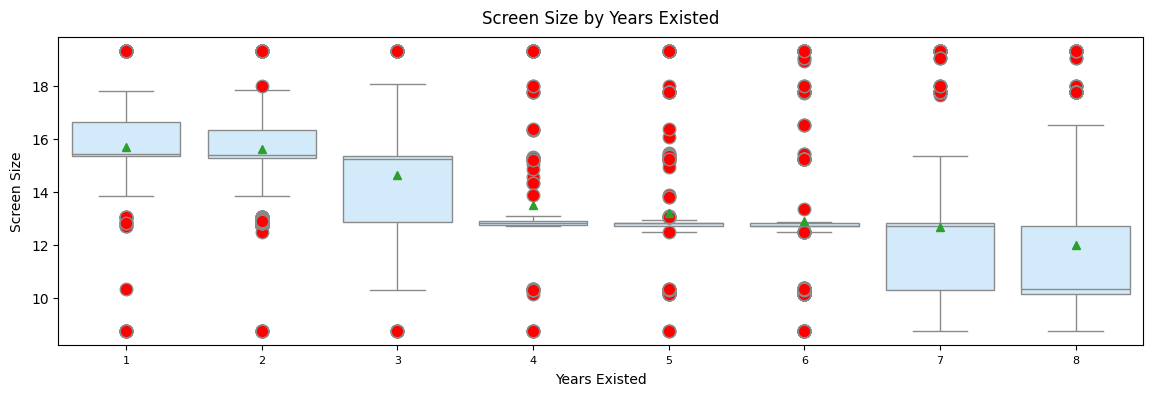

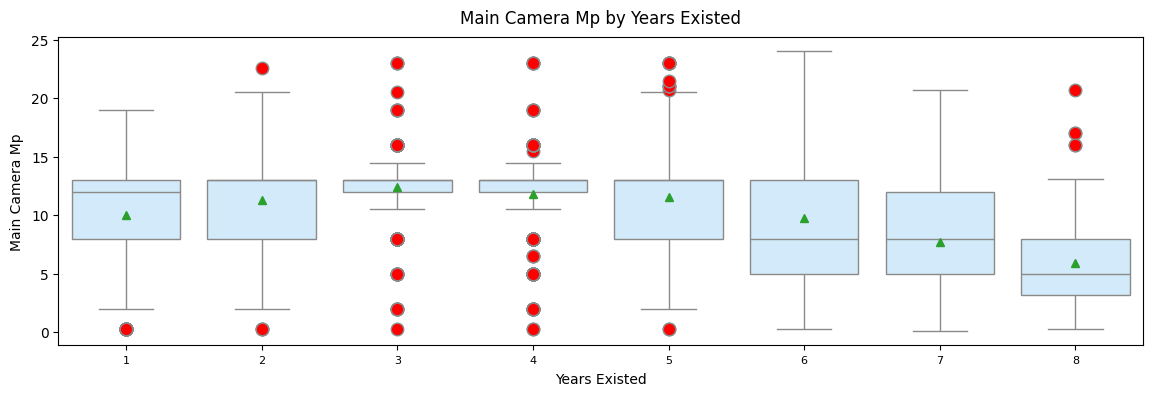

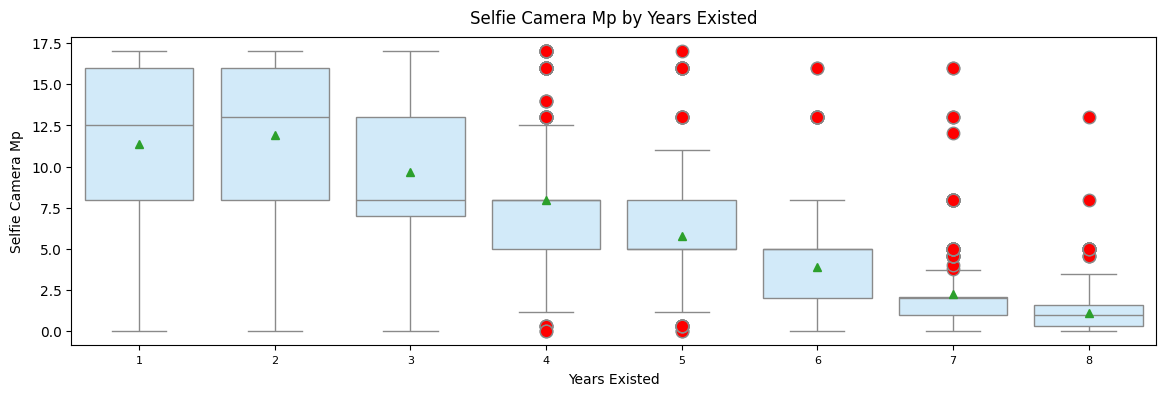

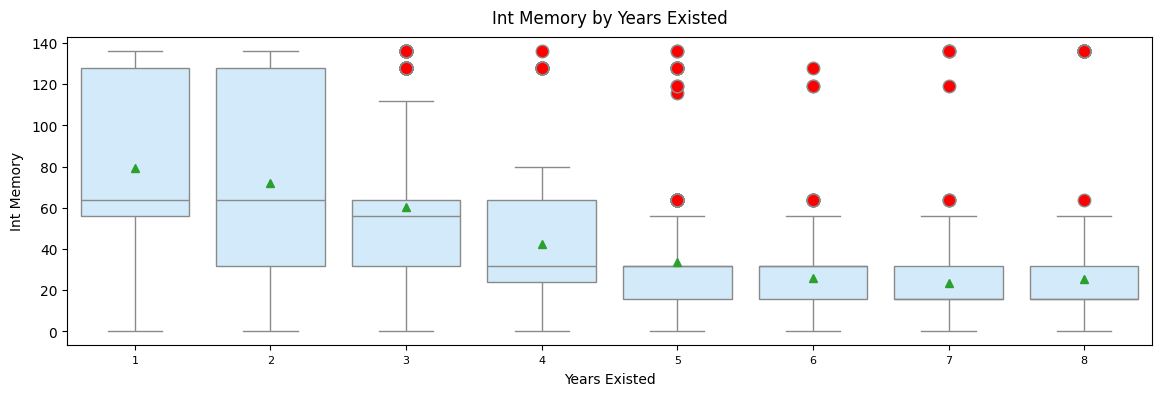

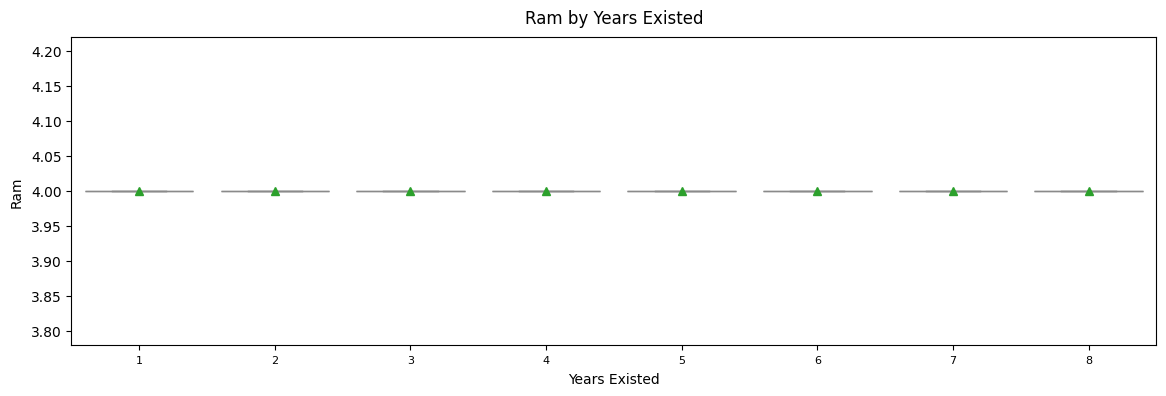

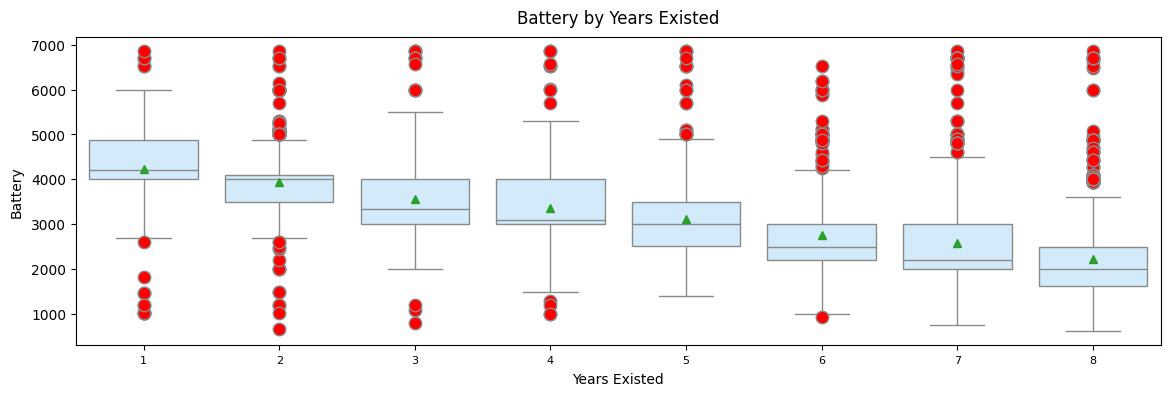

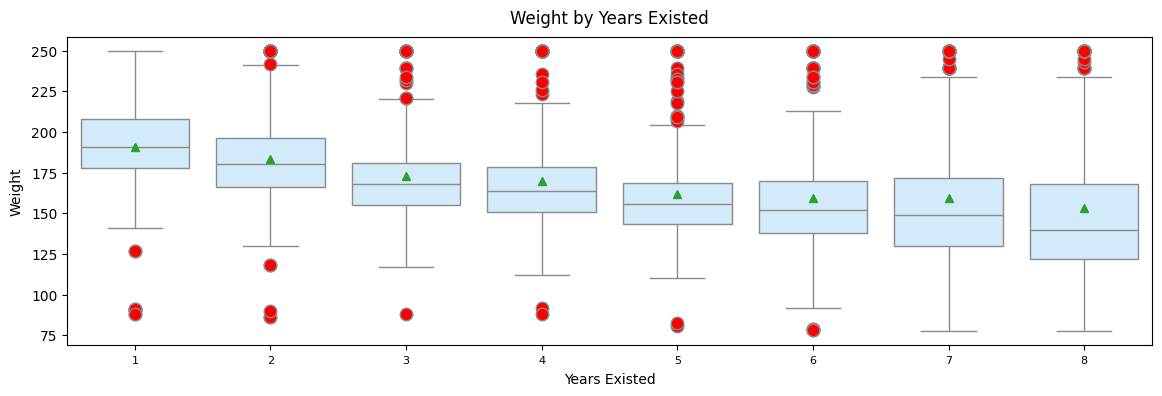

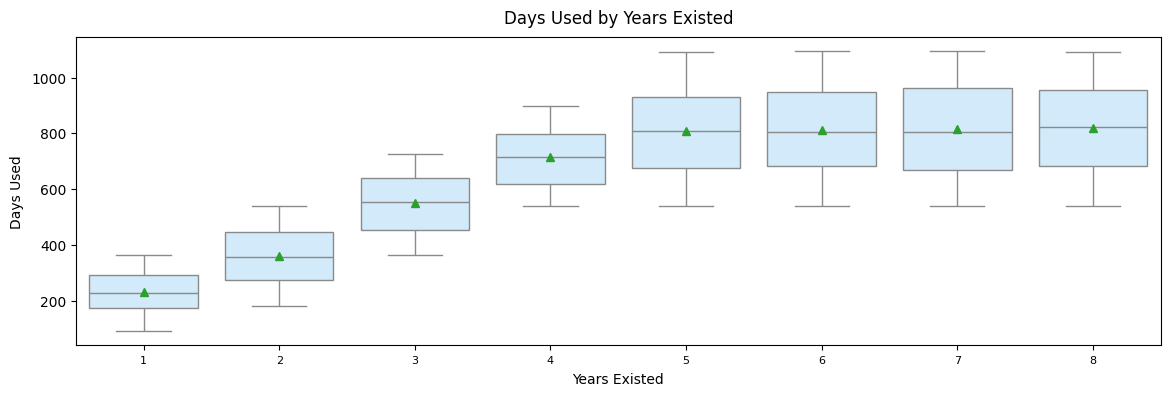

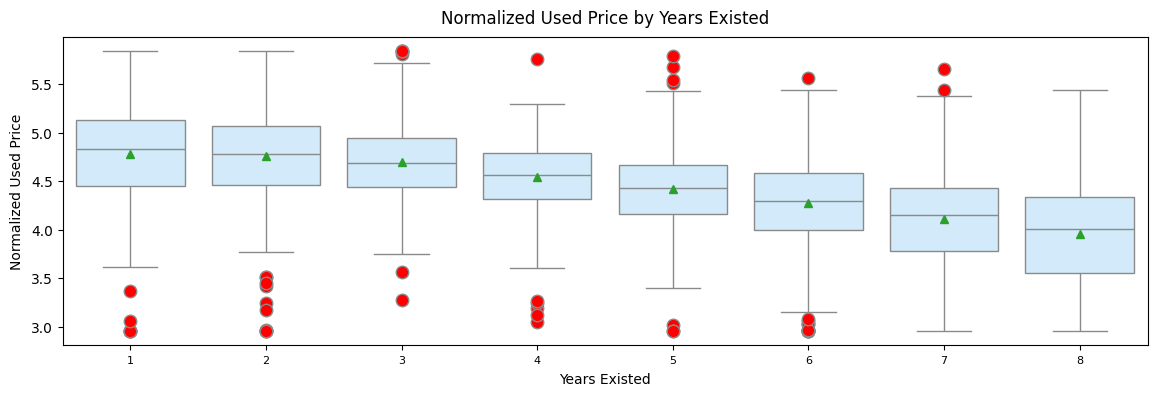

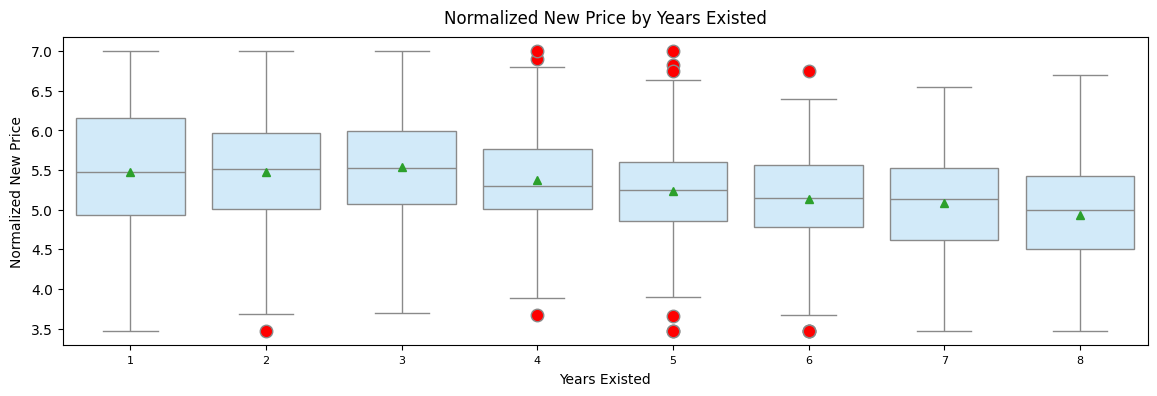

Before years_existed vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 701     Percent:20.3%
main_camera_mp       : 202     Percent:5.8%
selfie_camera_mp     : 275     Percent:8.0%
int_memory           : 161     Percent:4.7%
ram                  : 0       Percent:0.0%
battery              : 263     Percent:7.6%
weight               : 366     Percent:10.6%
days_used            : 0       Percent:0.0%
normalized_used_price: 48      Percent:1.4%
normalized_new_price : 14      Percent:0.4%
__________________________________________________________________________________________________________________________
After years_existed vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent

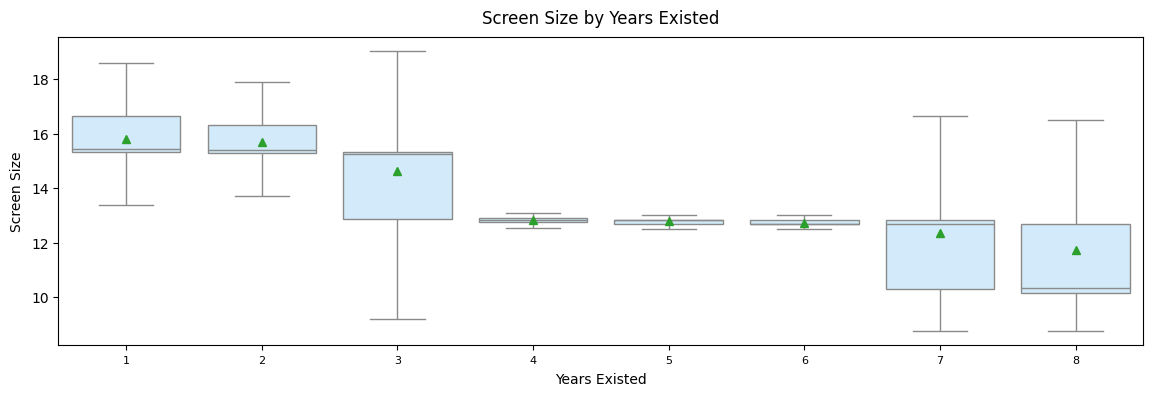

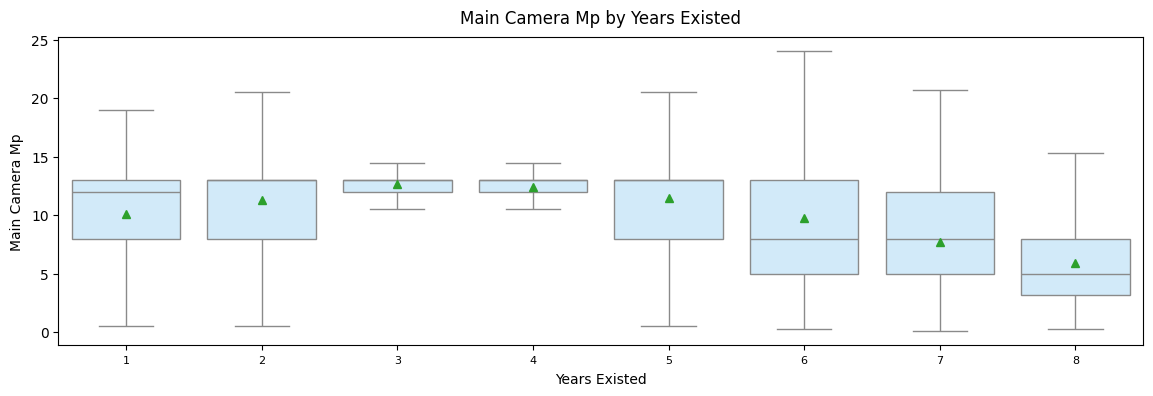

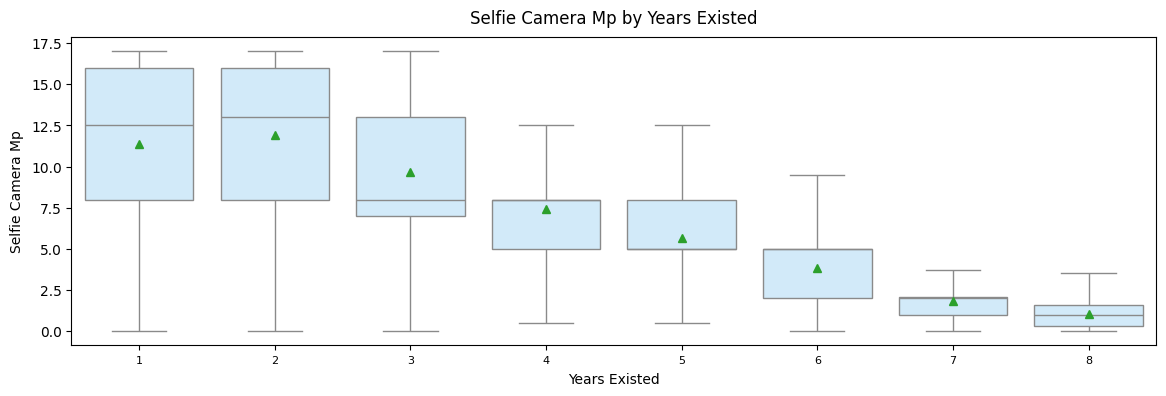

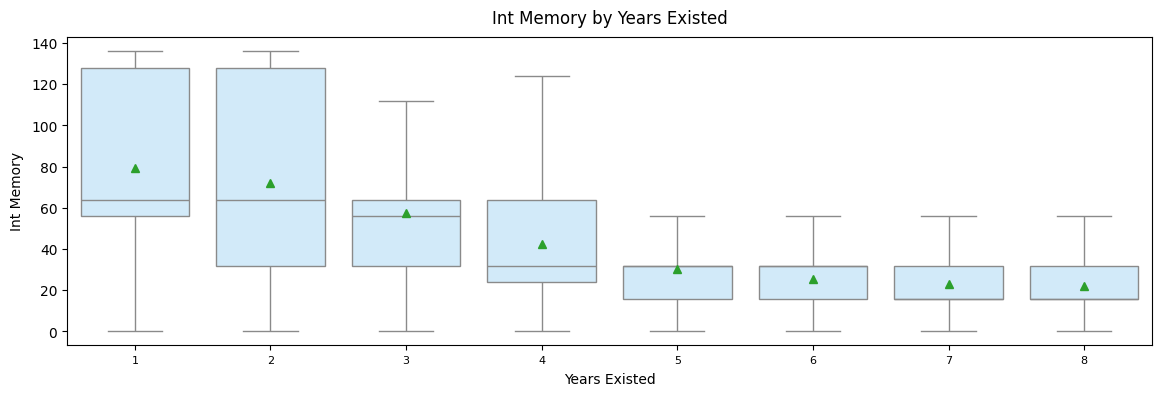

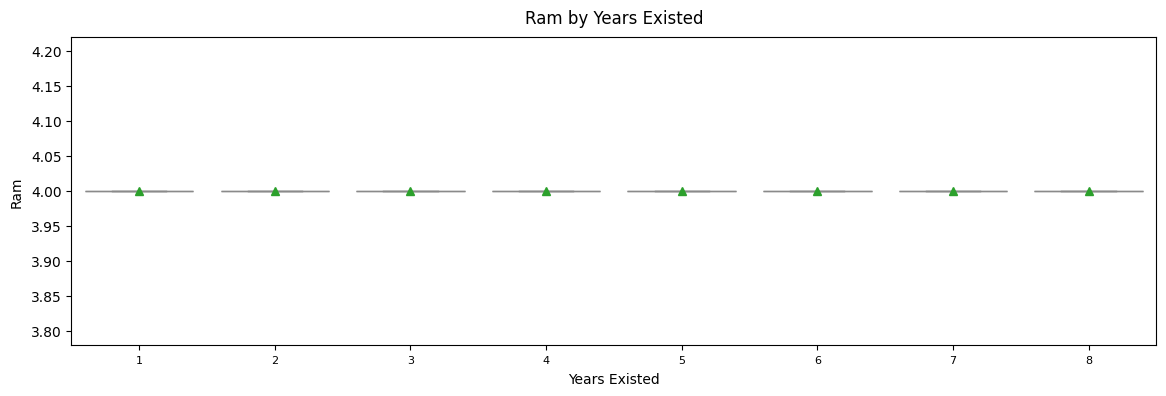

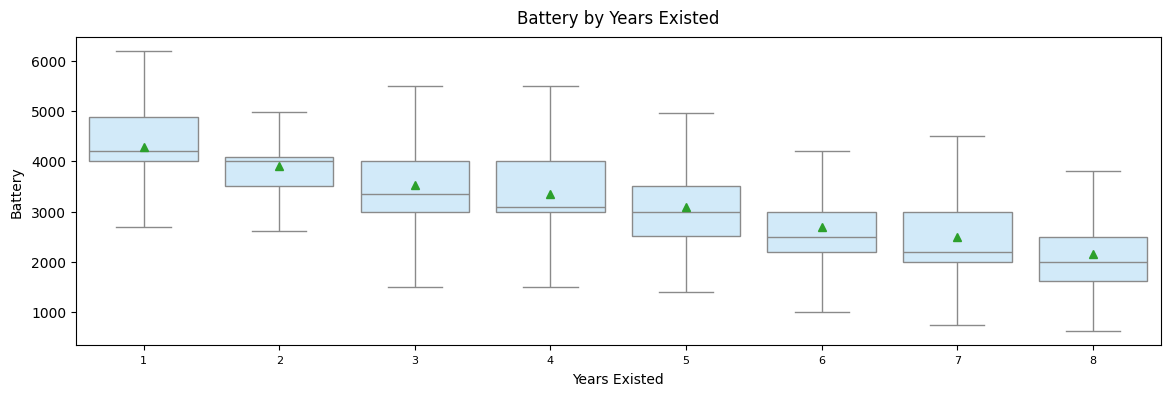

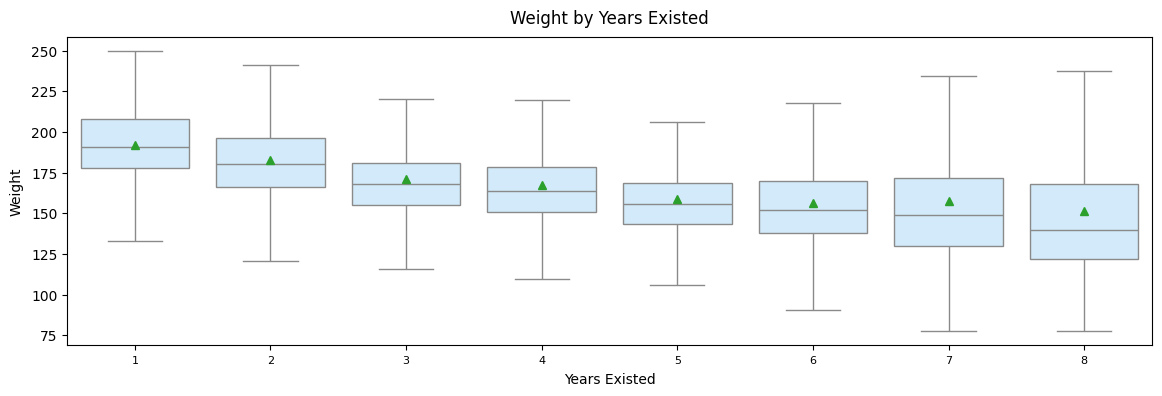

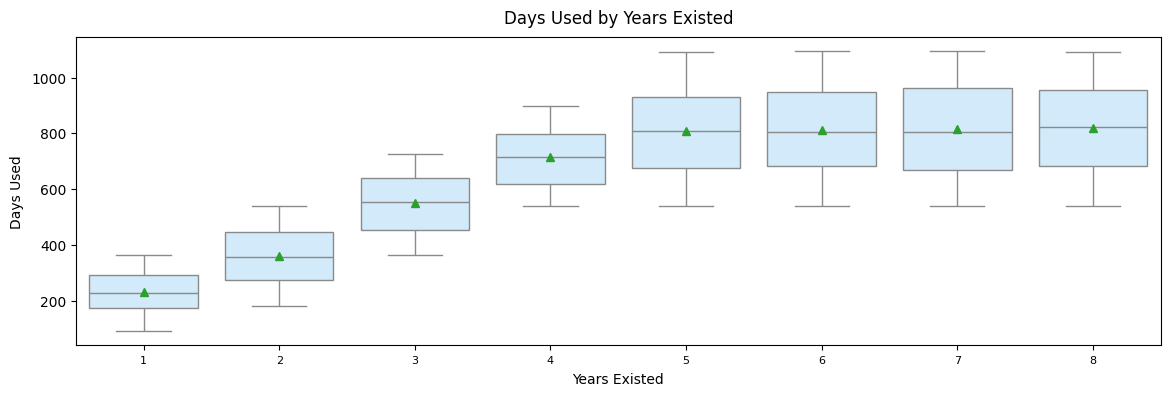

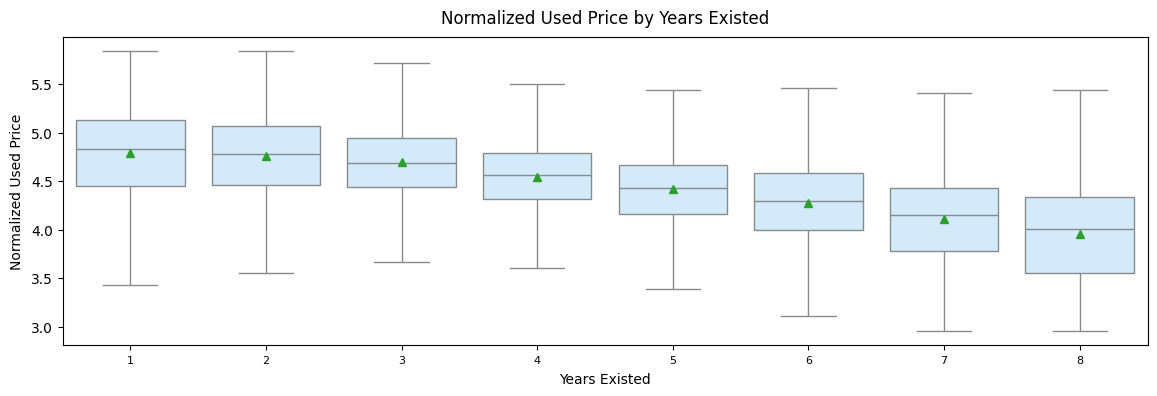

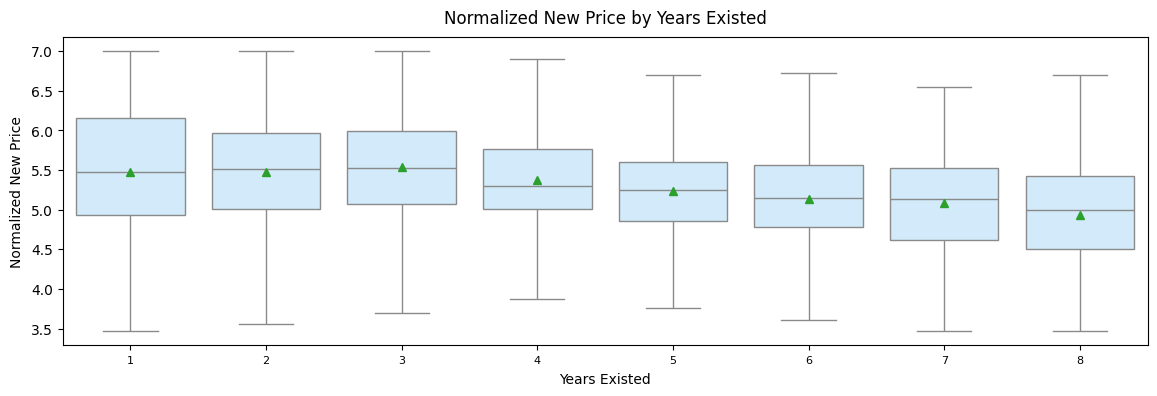

In [58]:
# Create boxplots of numerical attributes by years existed
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, 'years_existed', col)

# Call process_bivariate_outliers to find and process outliers of numerical attributes by years_existed   
process_bivariate_outliers(df_Recell_Upd, 'years_existed')    

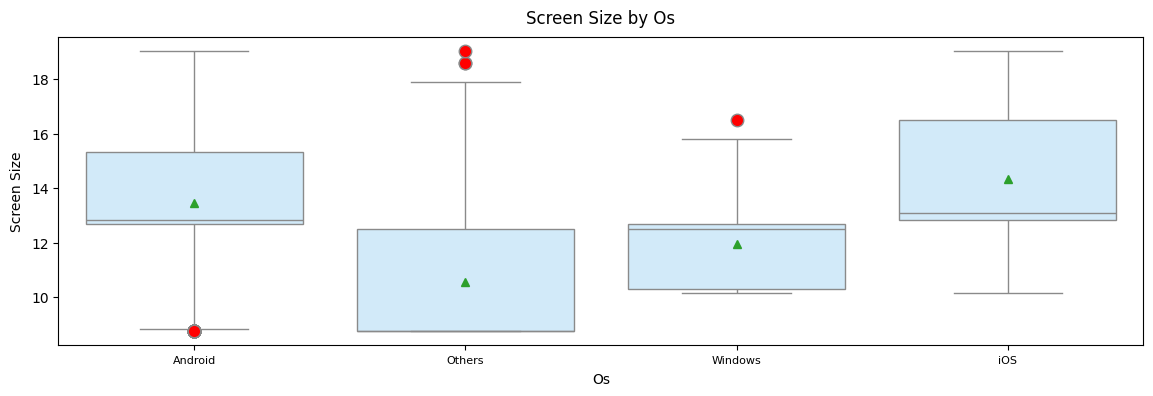

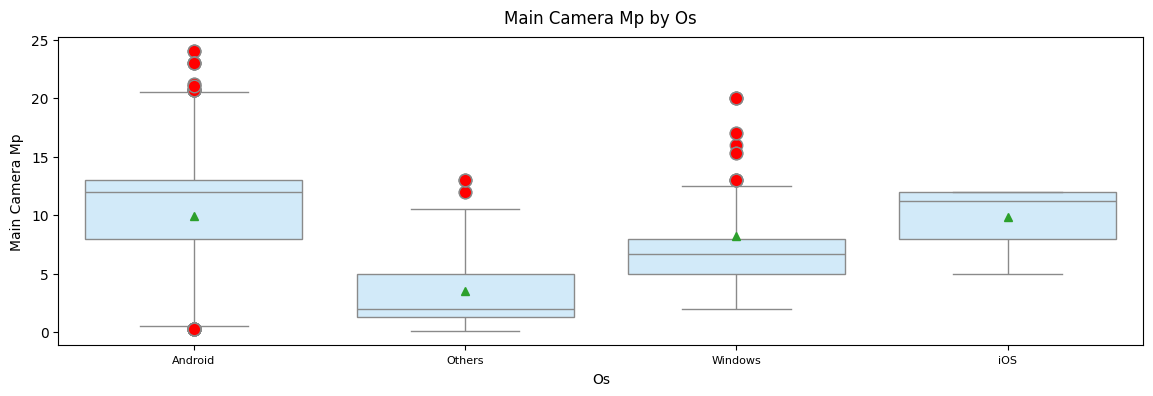

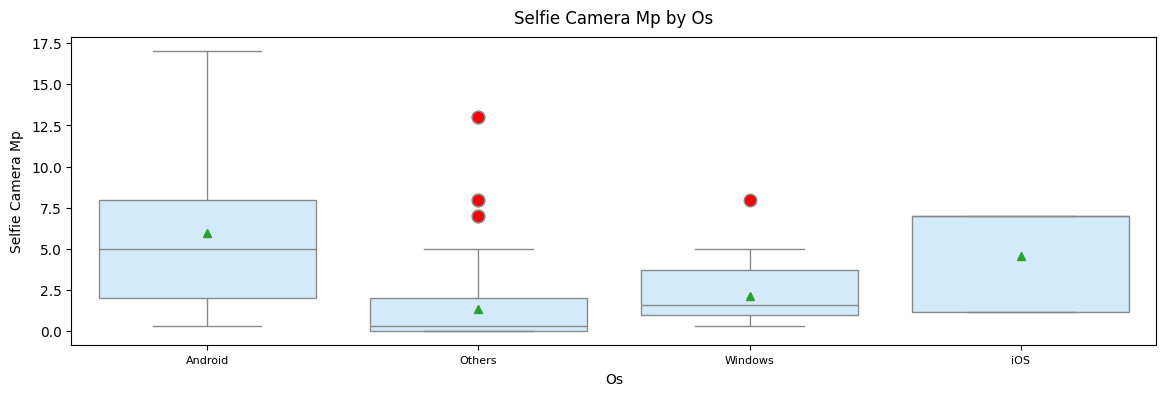

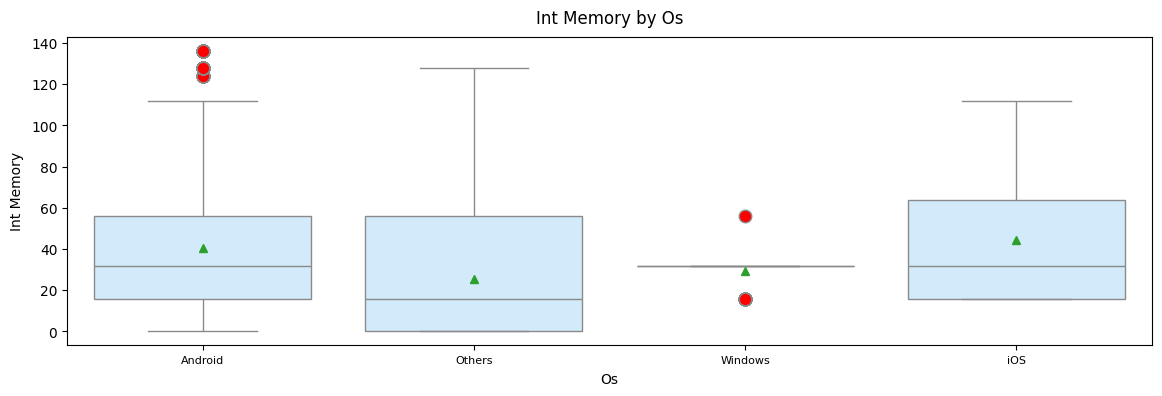

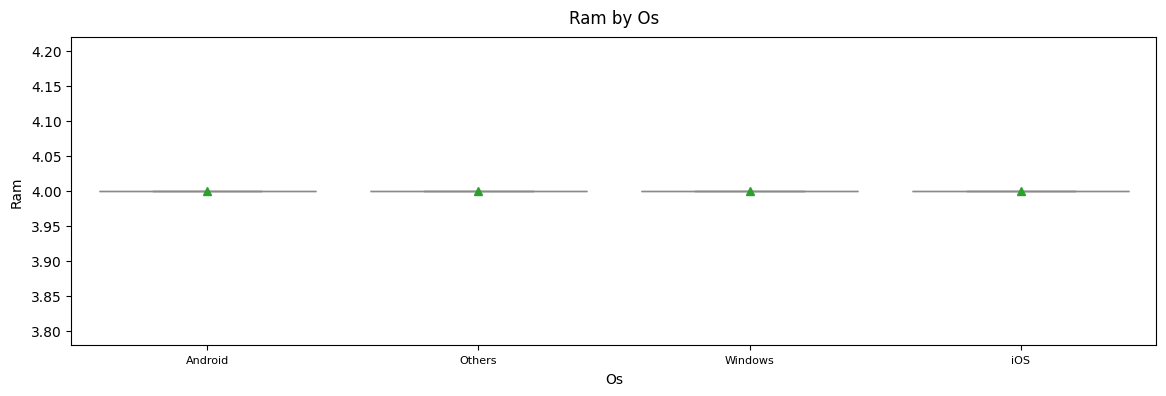

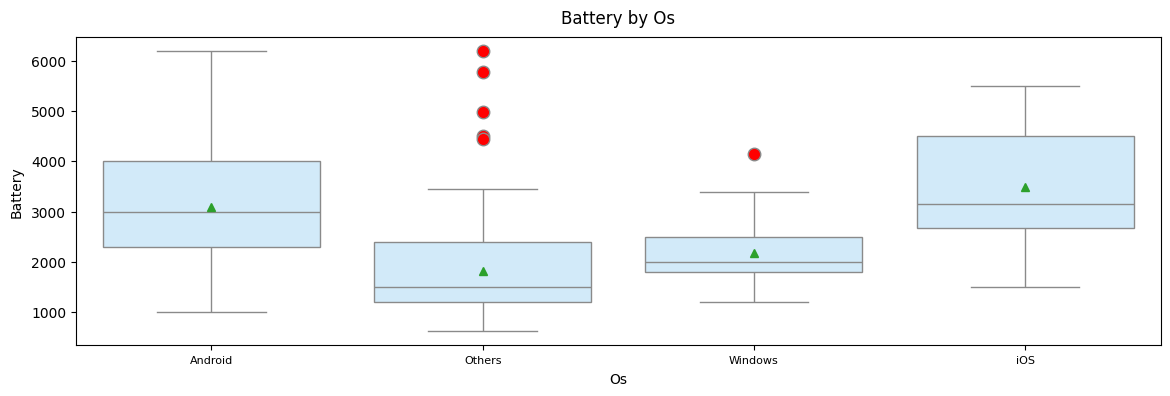

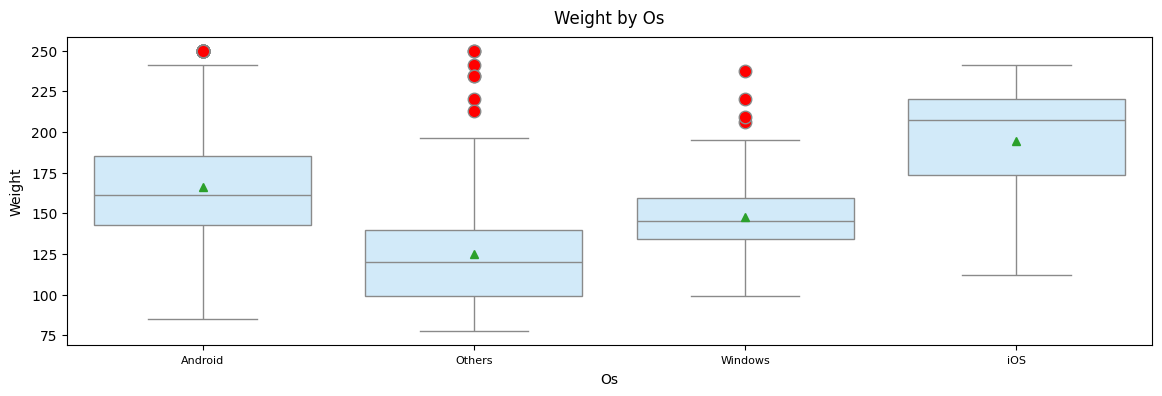

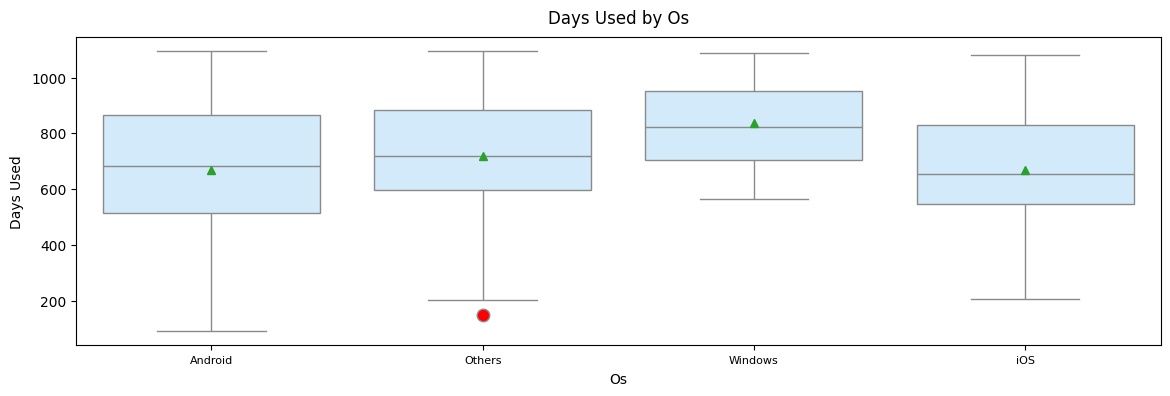

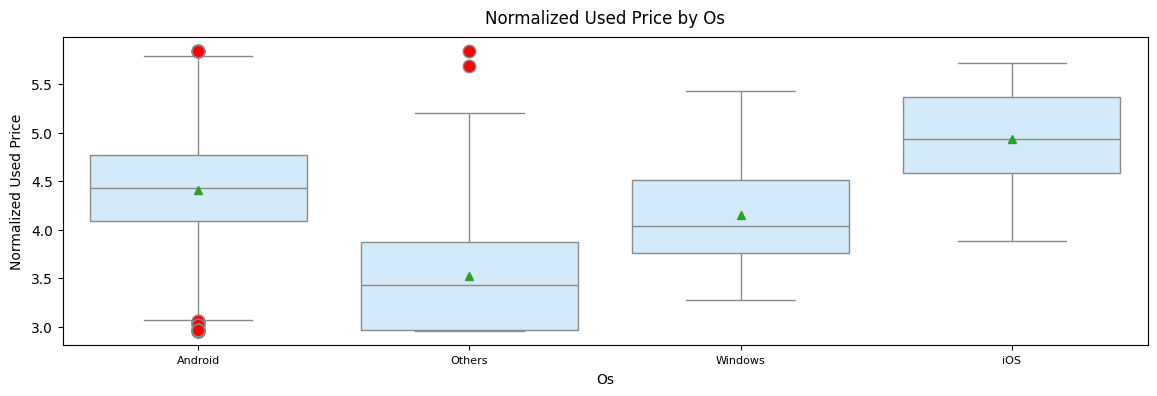

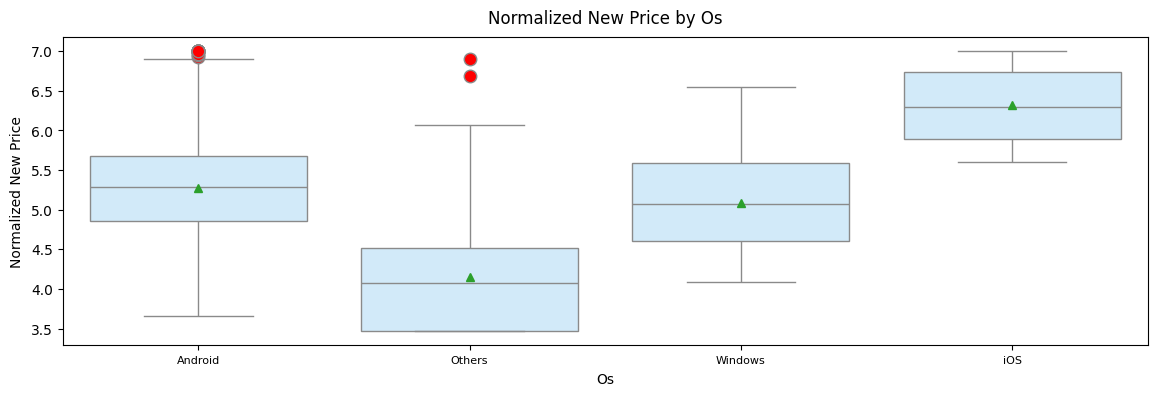

Before os vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 79      Percent:2.3%
main_camera_mp       : 62      Percent:1.8%
selfie_camera_mp     : 7       Percent:0.2%
int_memory           : 246     Percent:7.1%
ram                  : 0       Percent:0.0%
battery              : 6       Percent:0.2%
weight               : 28      Percent:0.8%
days_used            : 1       Percent:0.0%
normalized_used_price: 36      Percent:1.0%
normalized_new_price : 18      Percent:0.5%
__________________________________________________________________________________________________________________________
After os vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory        

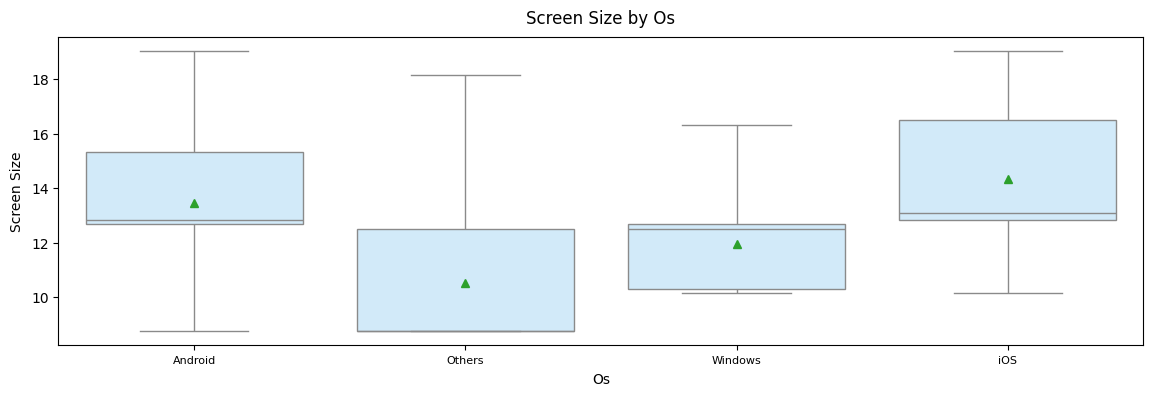

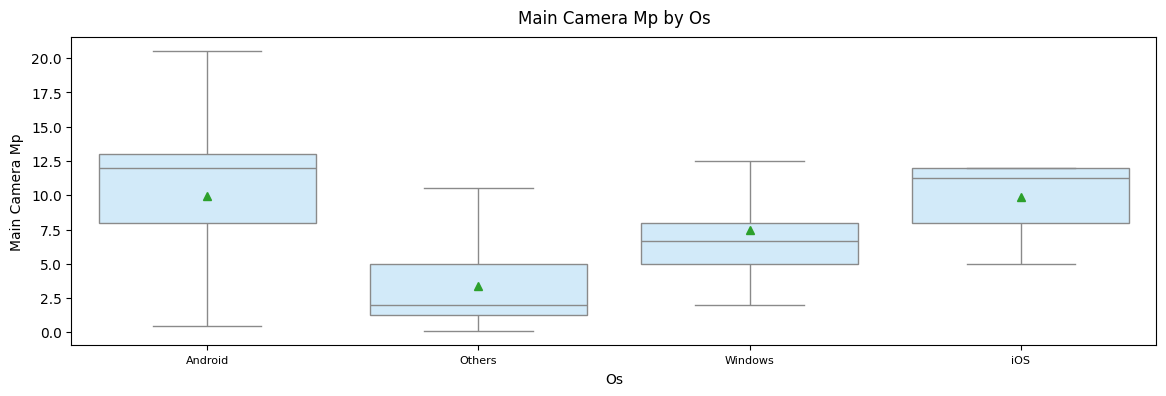

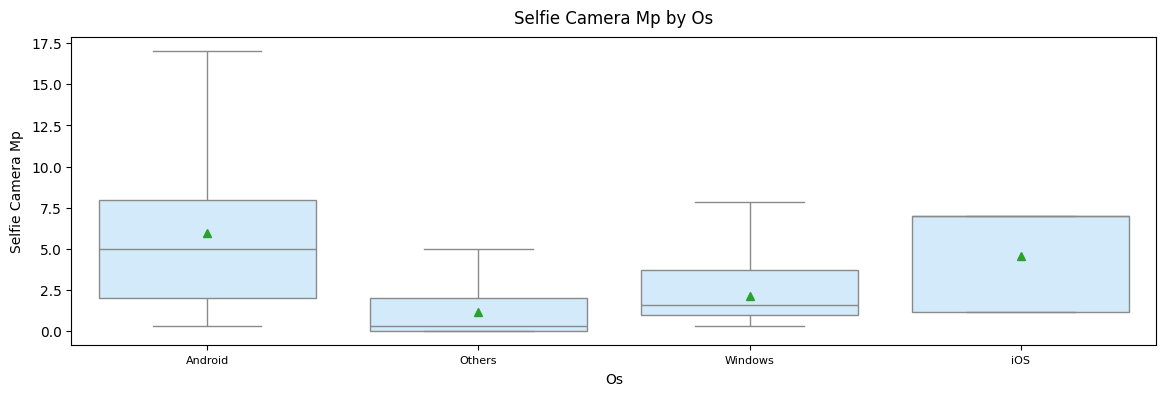

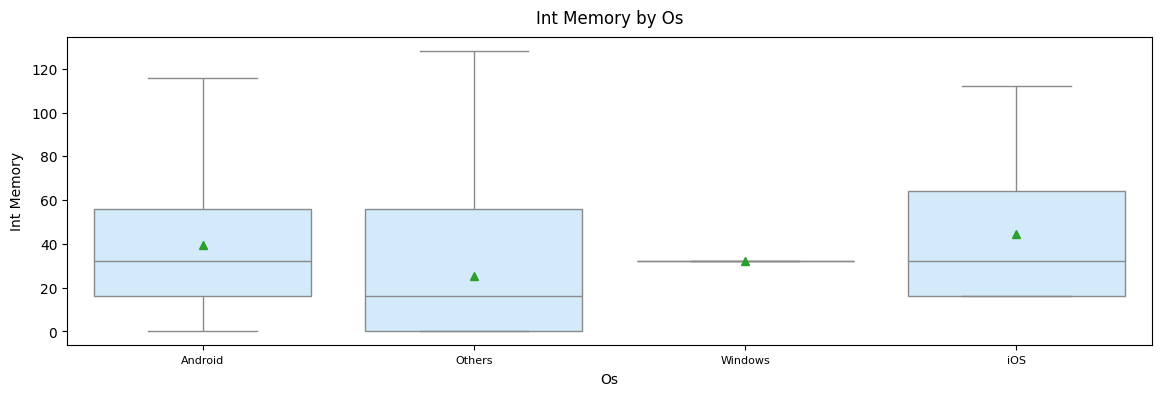

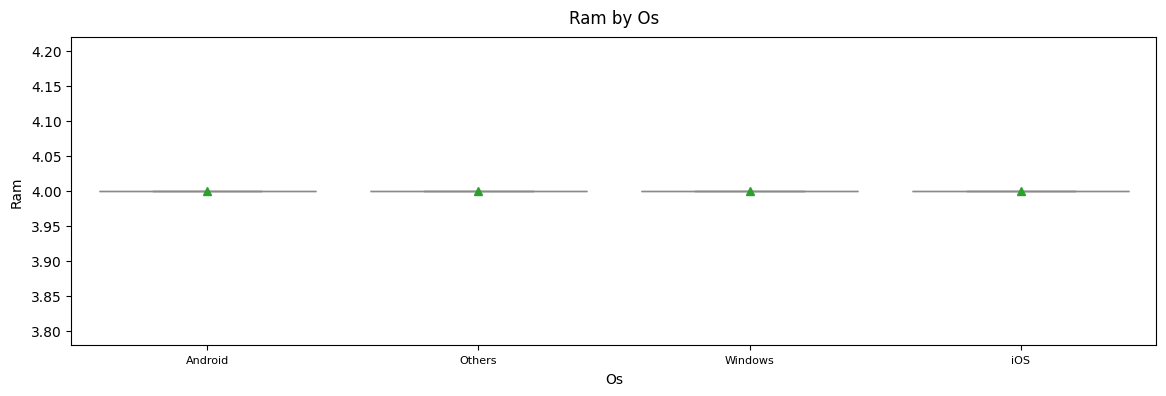

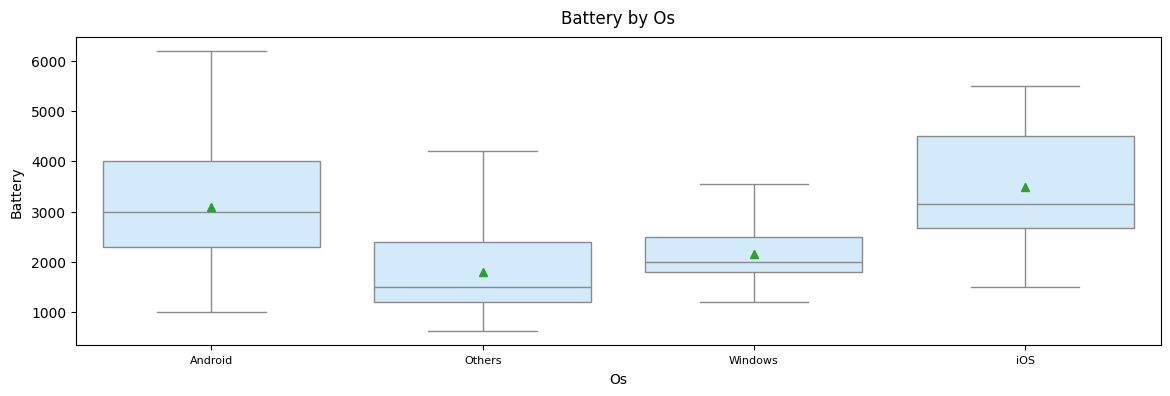

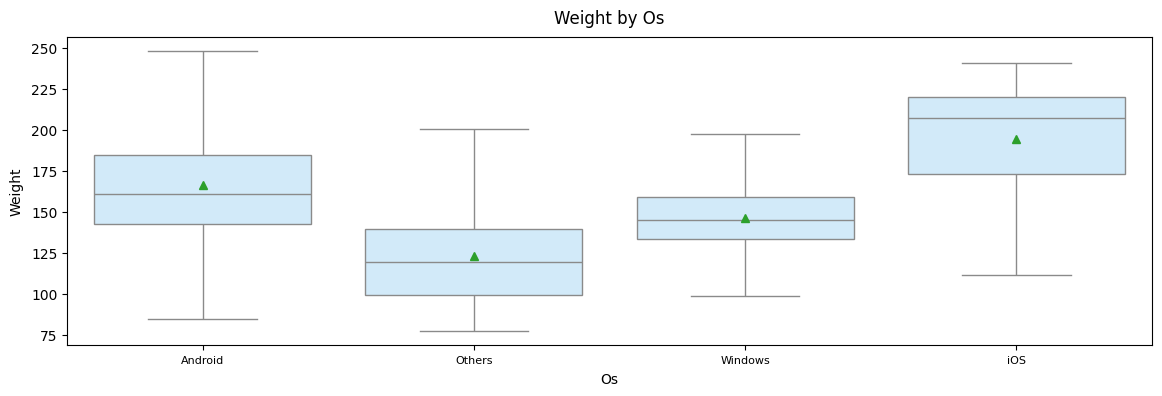

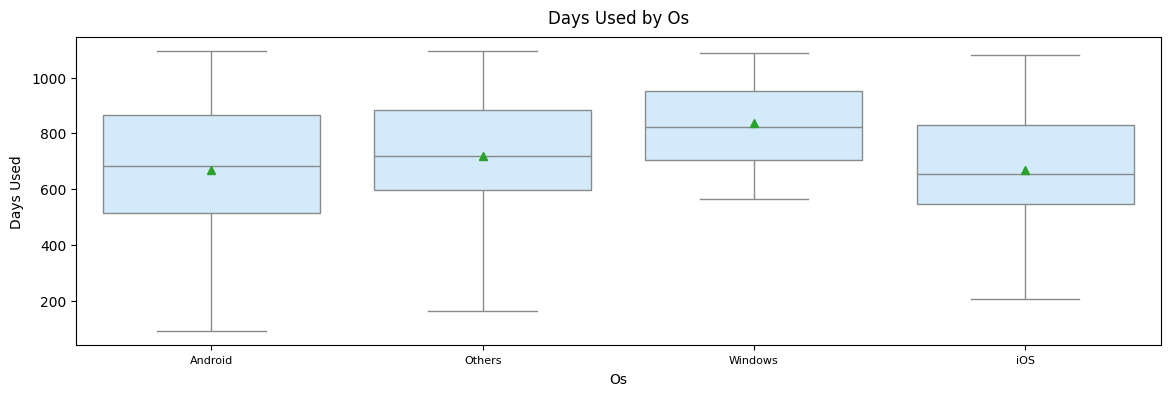

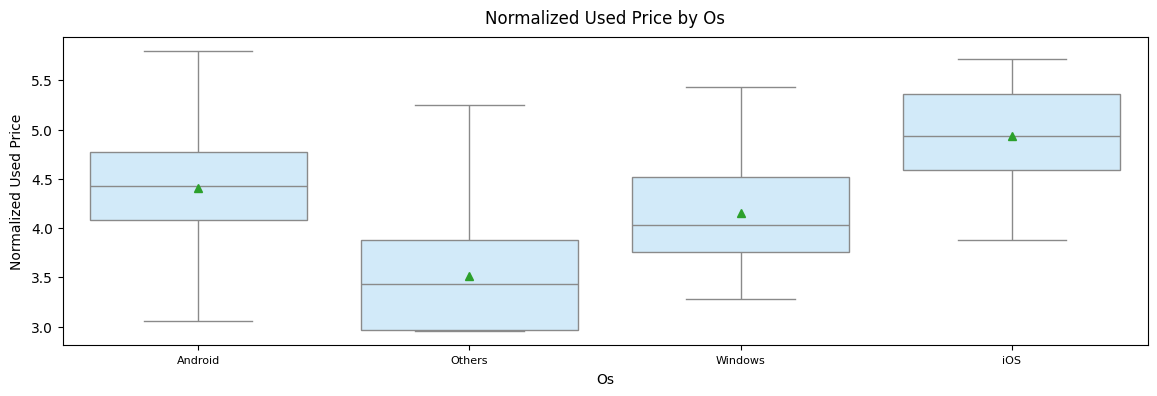

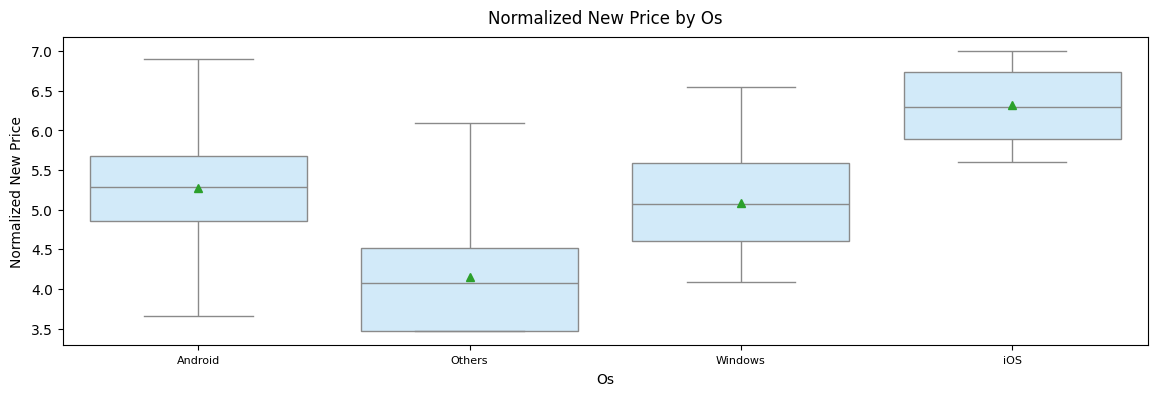

In [59]:
# Create boxplots of numerical attributes by os
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, 'os', col)
    
# Call process_bivariate_outliers to find and process outliers of numerical attributes by os
process_bivariate_outliers(df_Recell_Upd, 'os')    

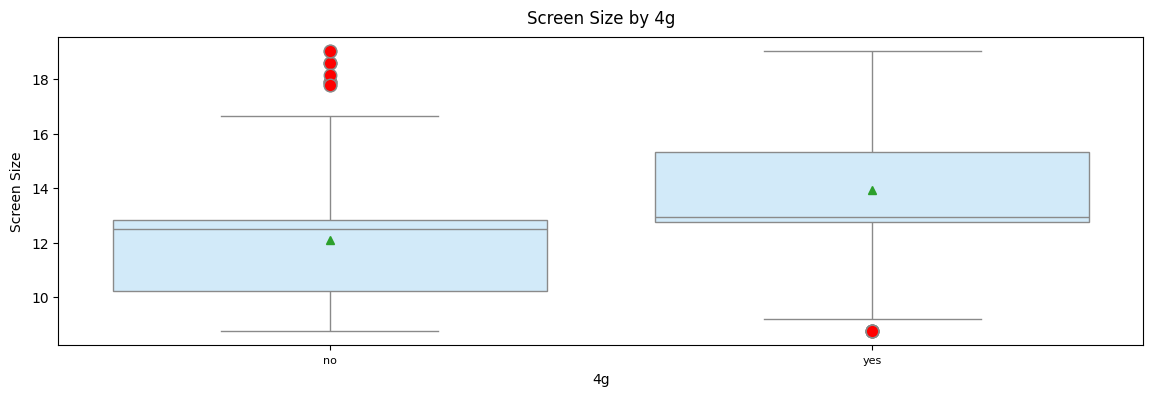

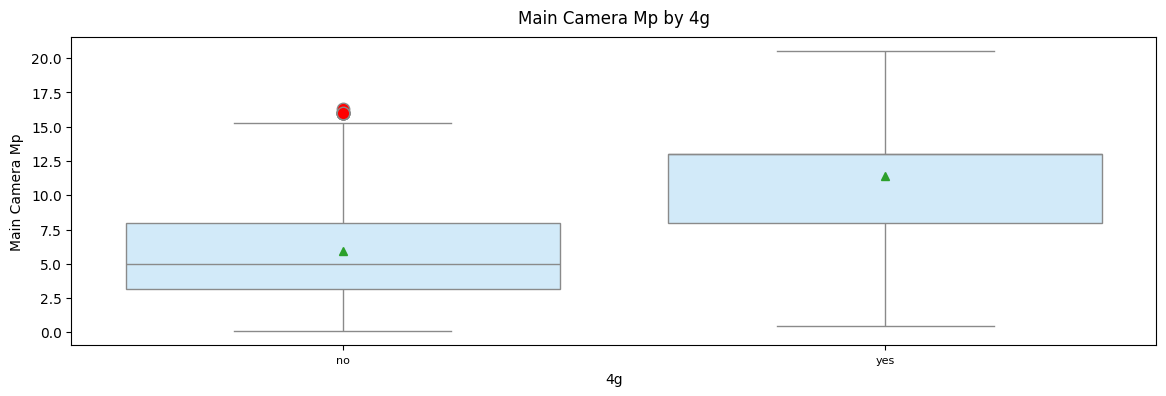

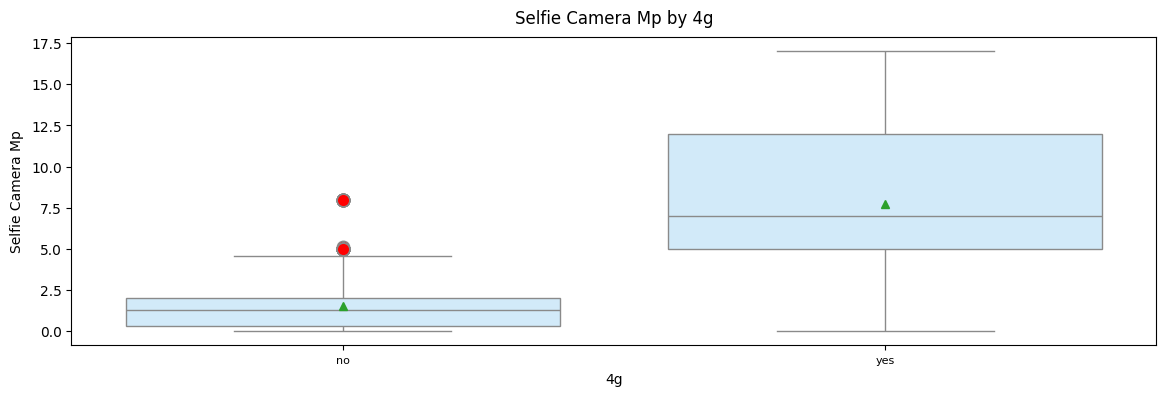

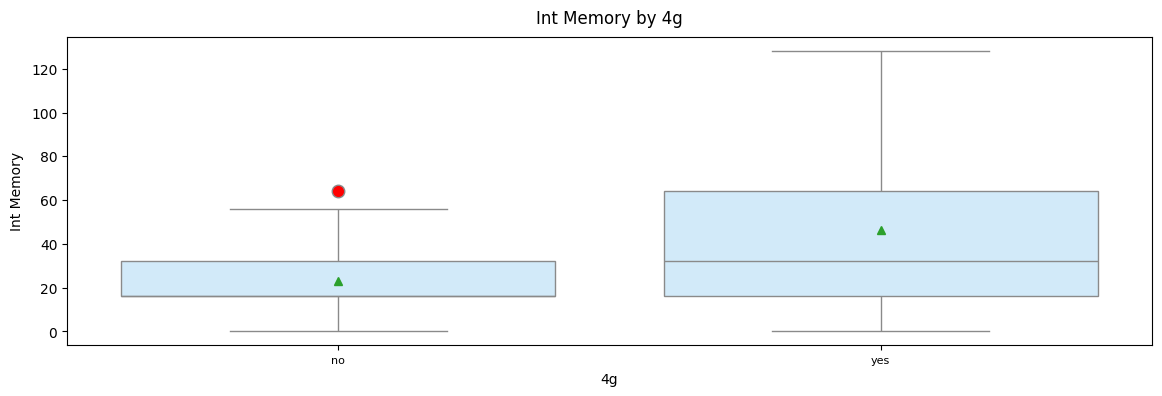

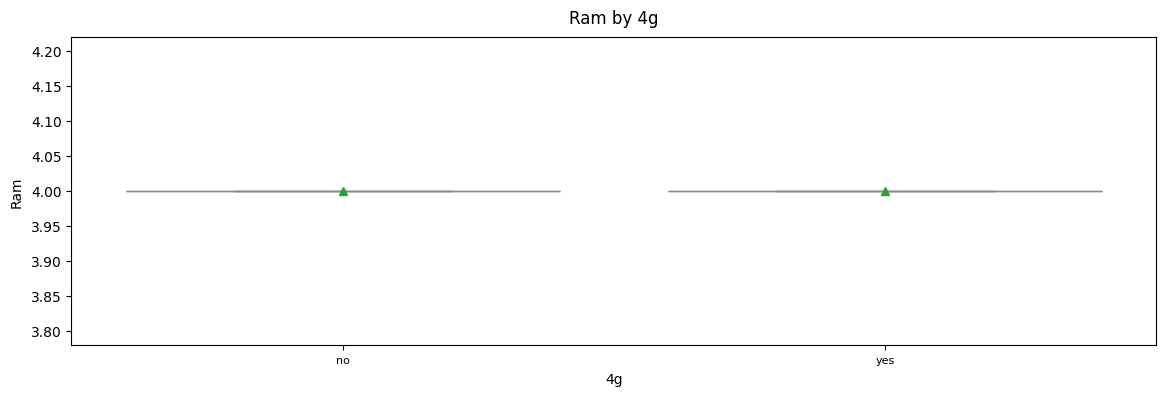

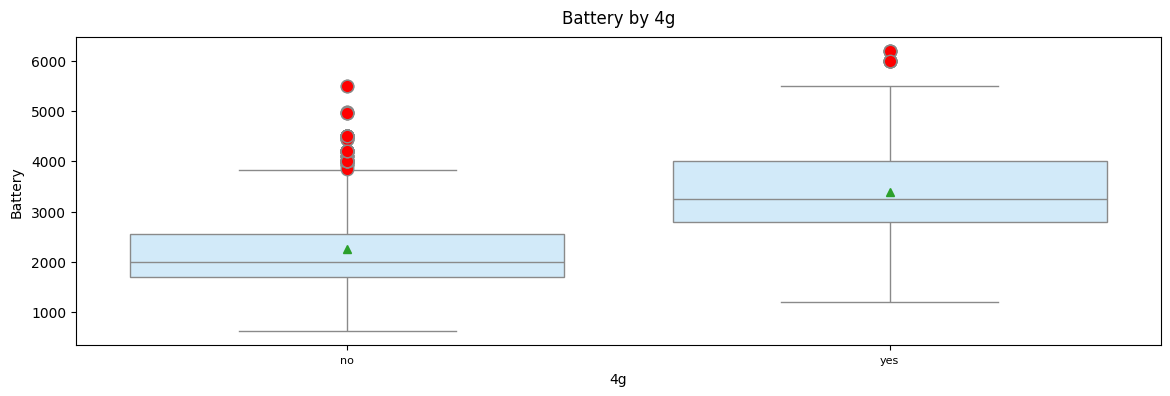

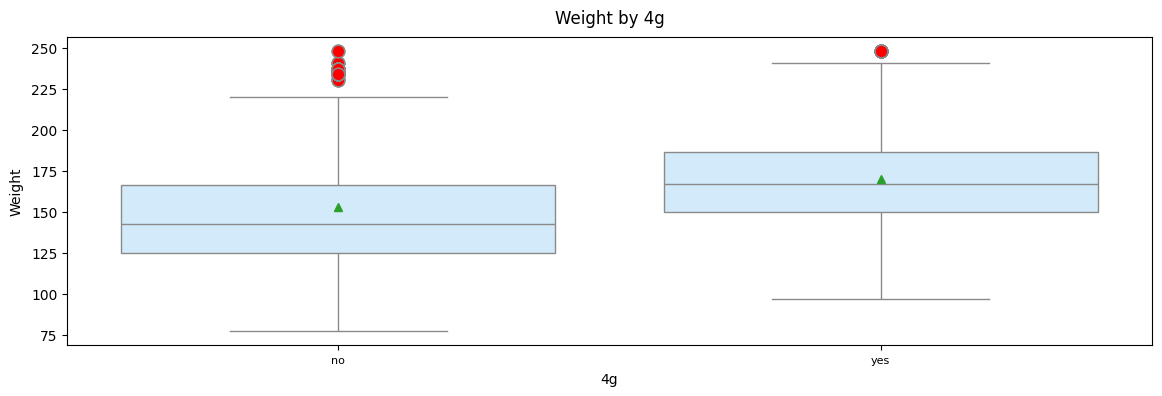

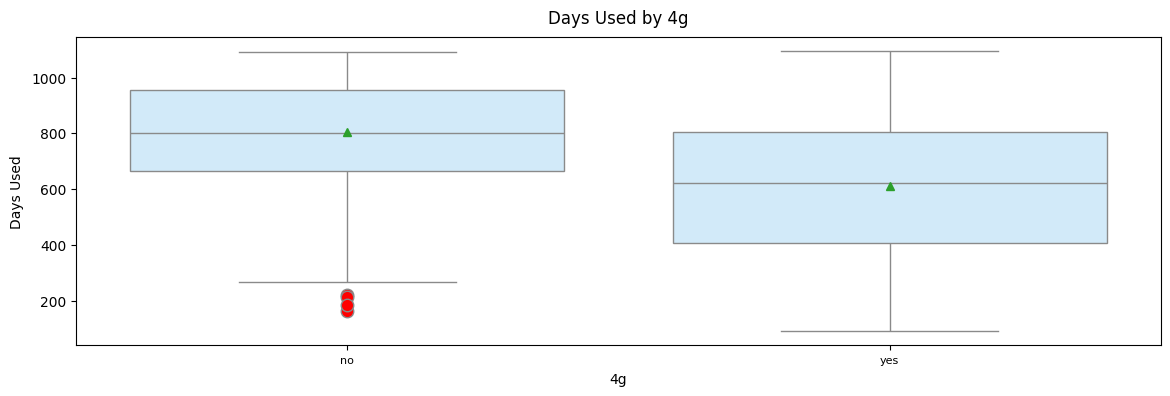

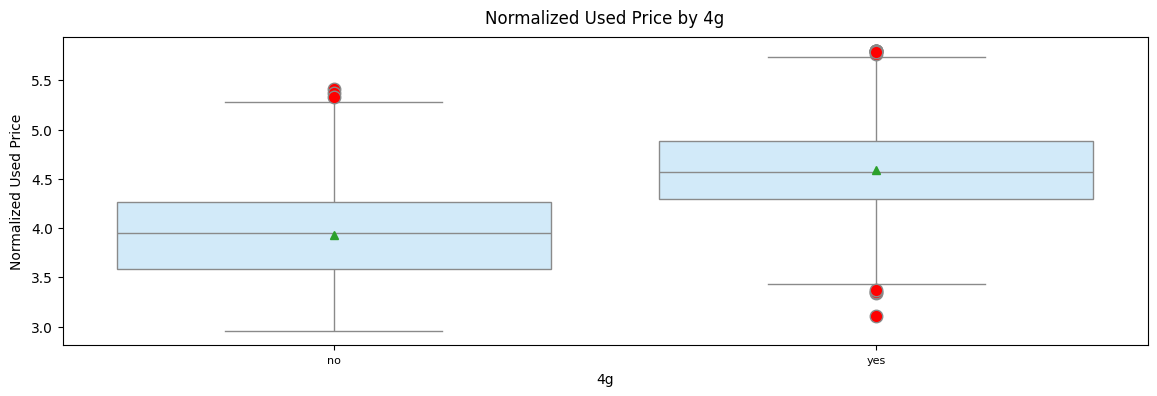

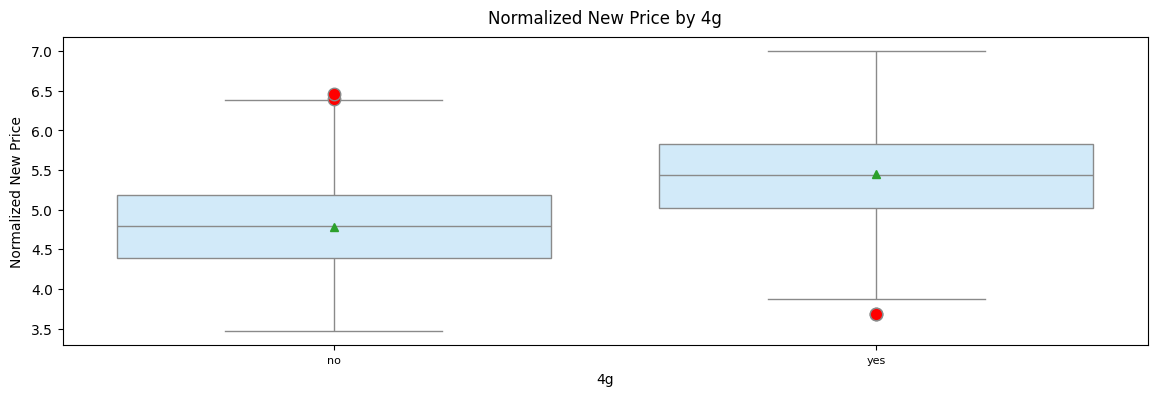

Before 4g vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 17      Percent:0.5%
main_camera_mp       : 9       Percent:0.3%
selfie_camera_mp     : 64      Percent:1.9%
int_memory           : 1       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 87      Percent:2.5%
weight               : 152     Percent:4.4%
days_used            : 4       Percent:0.1%
normalized_used_price: 15      Percent:0.4%
normalized_new_price : 4       Percent:0.1%
__________________________________________________________________________________________________________________________
After 4g vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory        

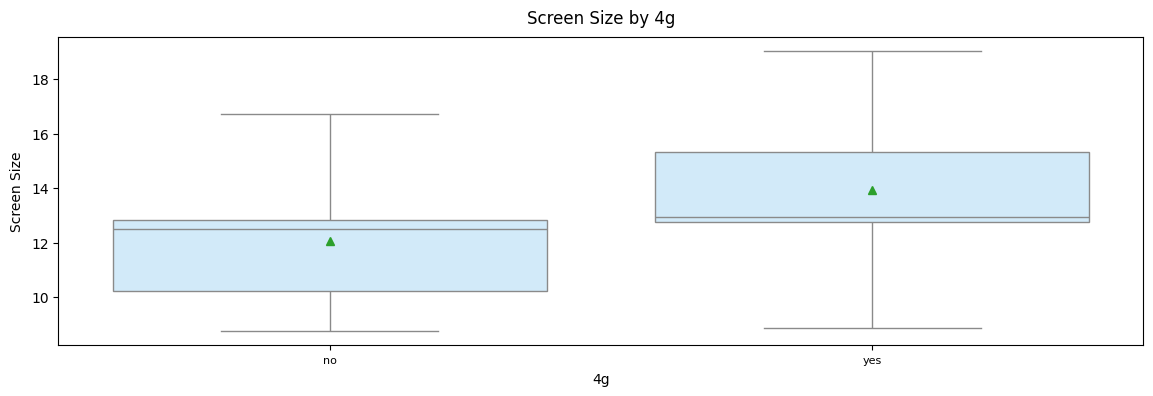

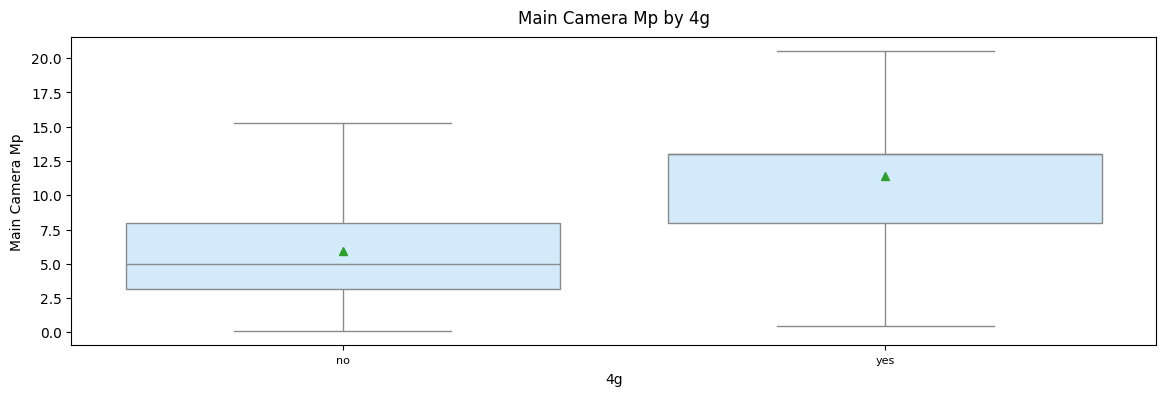

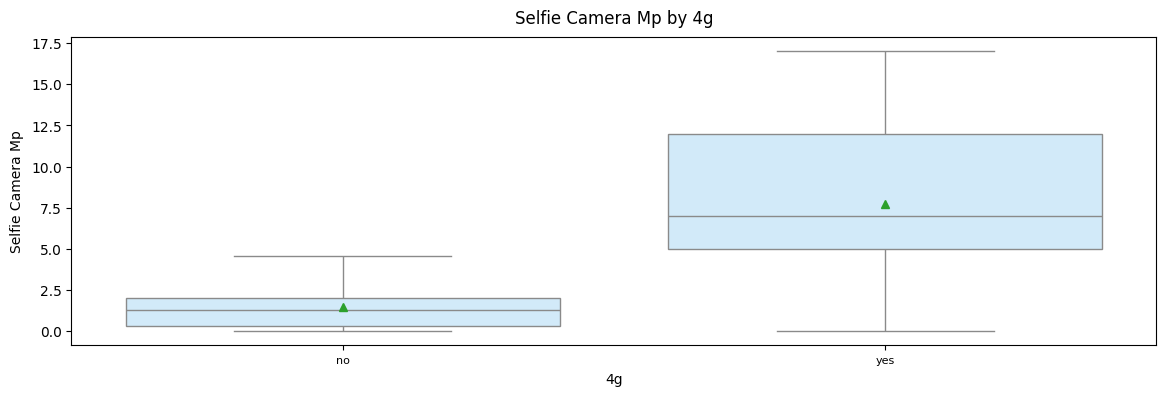

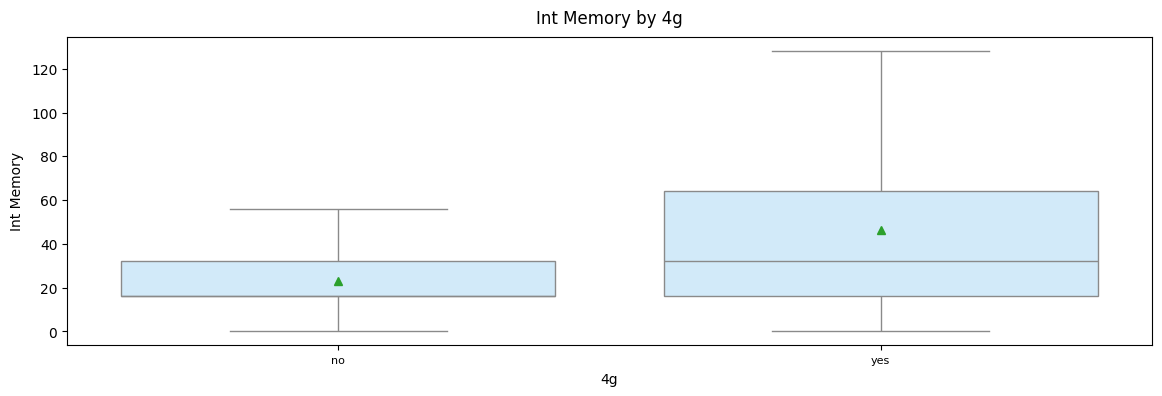

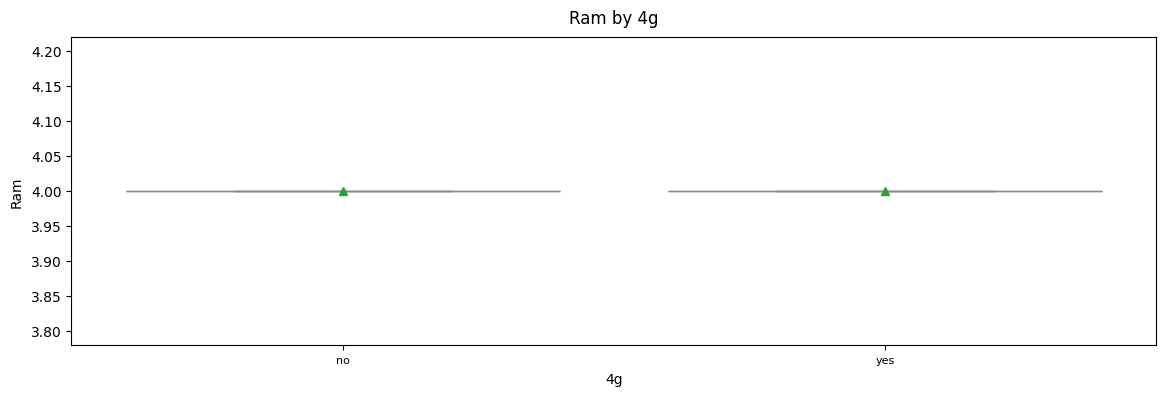

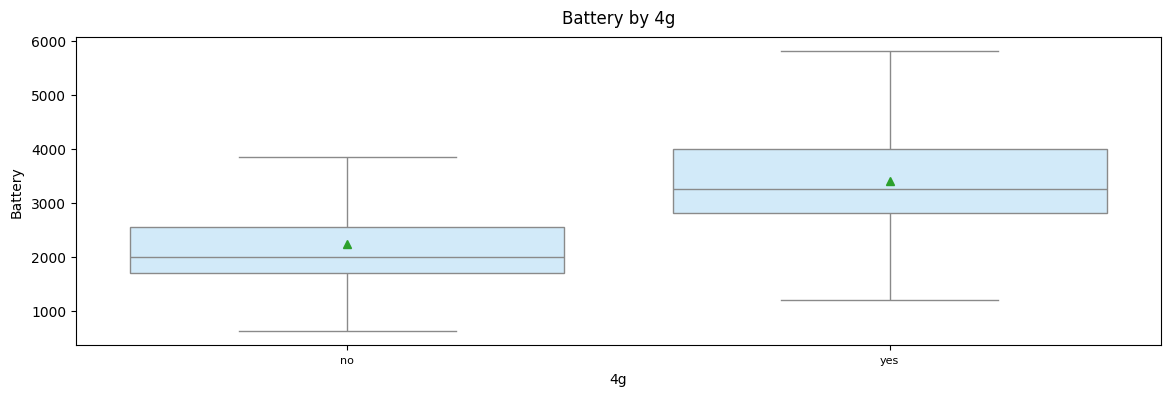

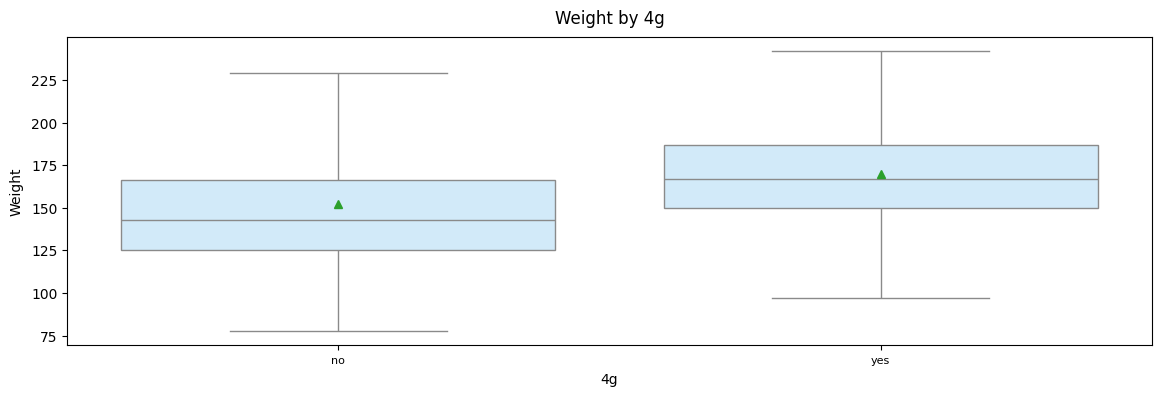

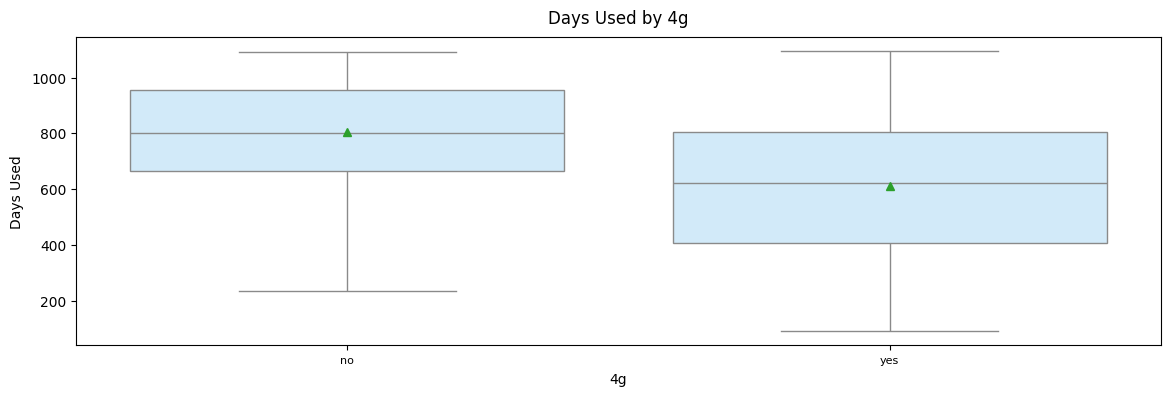

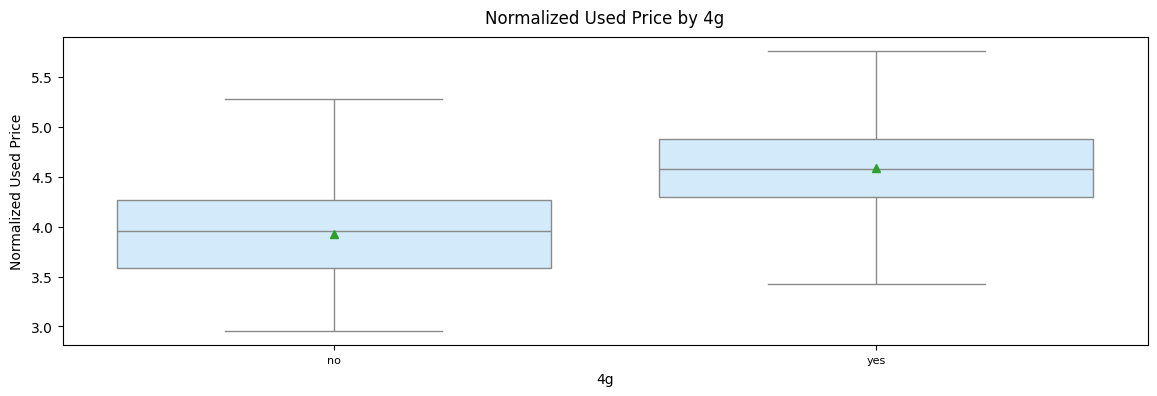

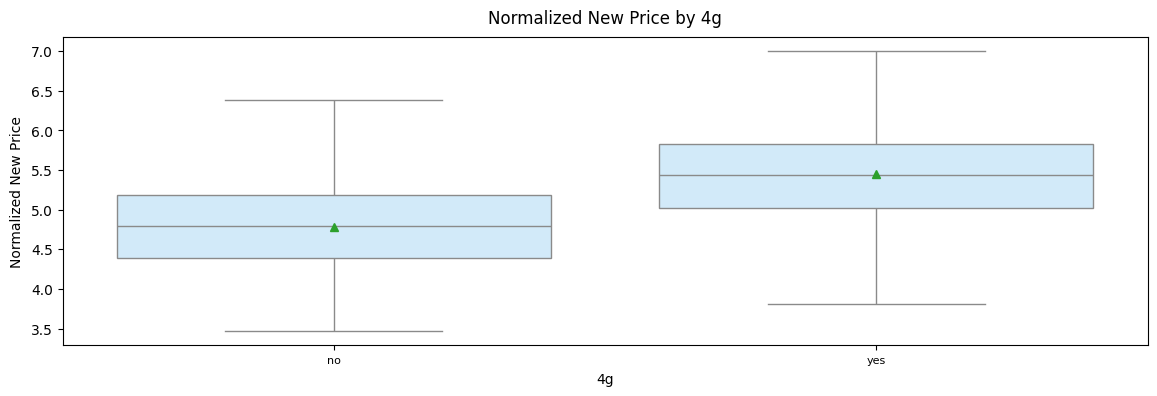

In [60]:
# Create boxplots of numerical attributes by 4g
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, '4g', col)  
    
# Call process_bivariate_outliers to find and process outliers of numerical attributes by 4g
process_bivariate_outliers(df_Recell_Upd, '4g')    

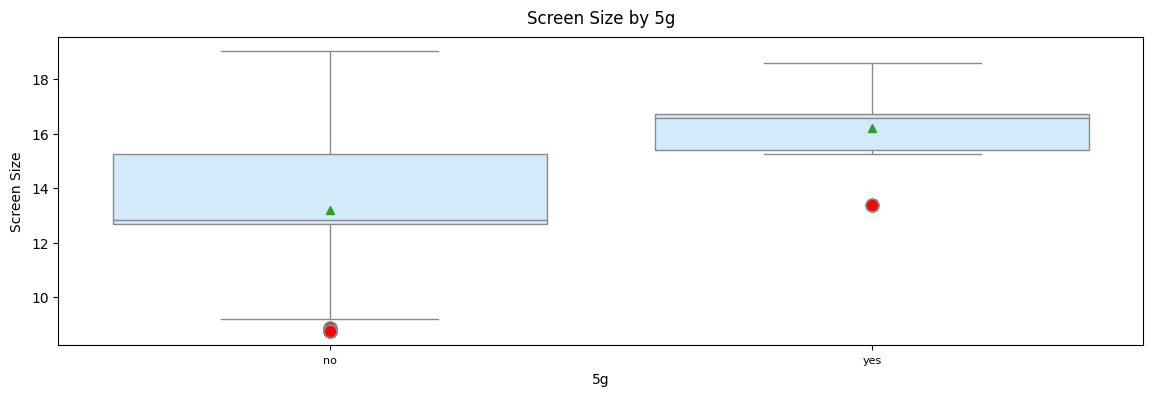

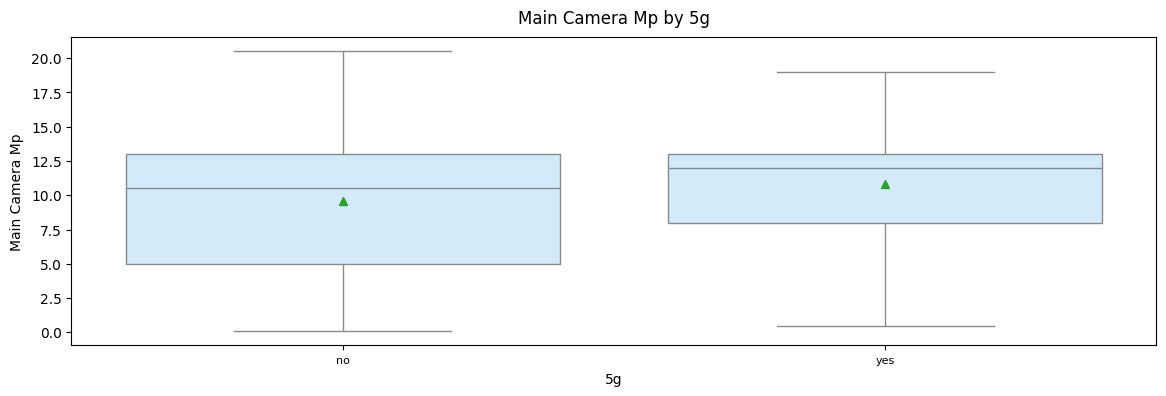

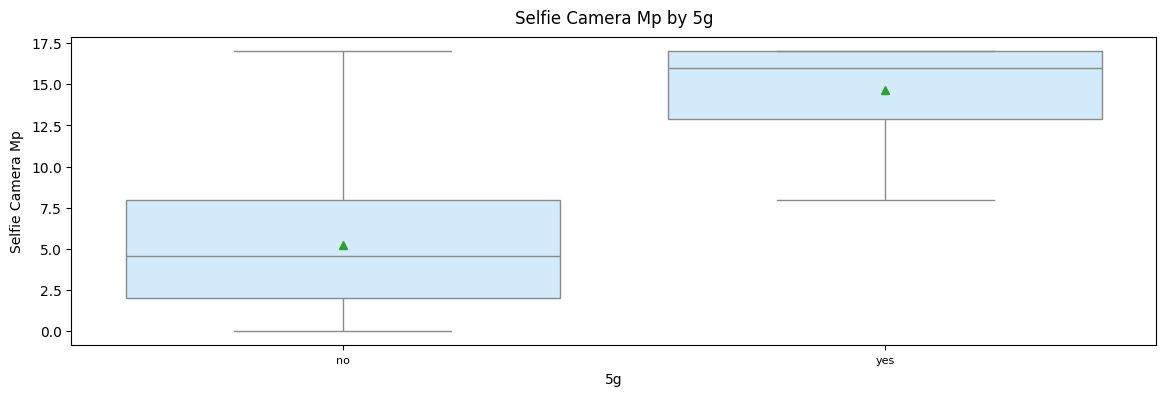

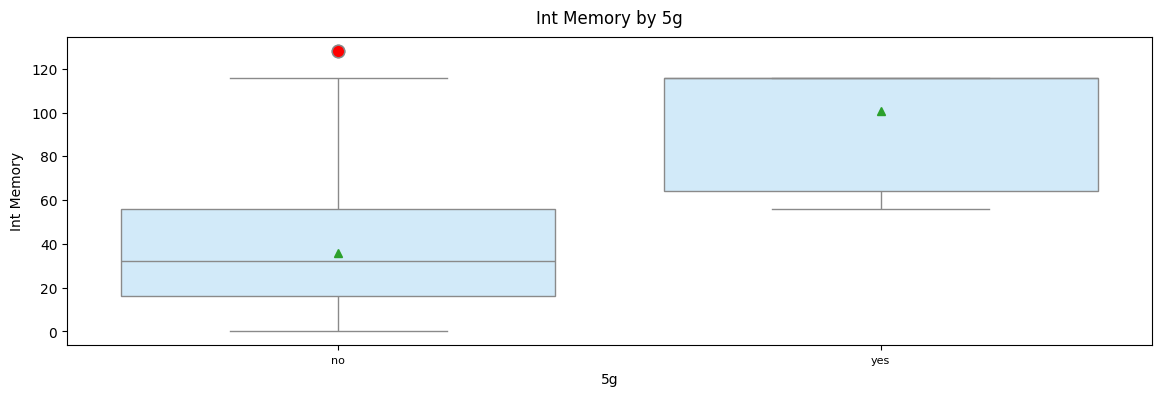

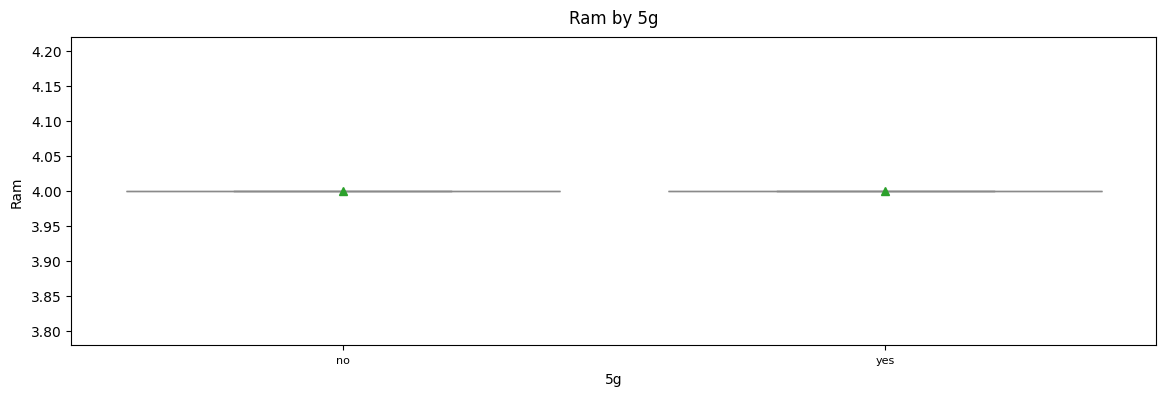

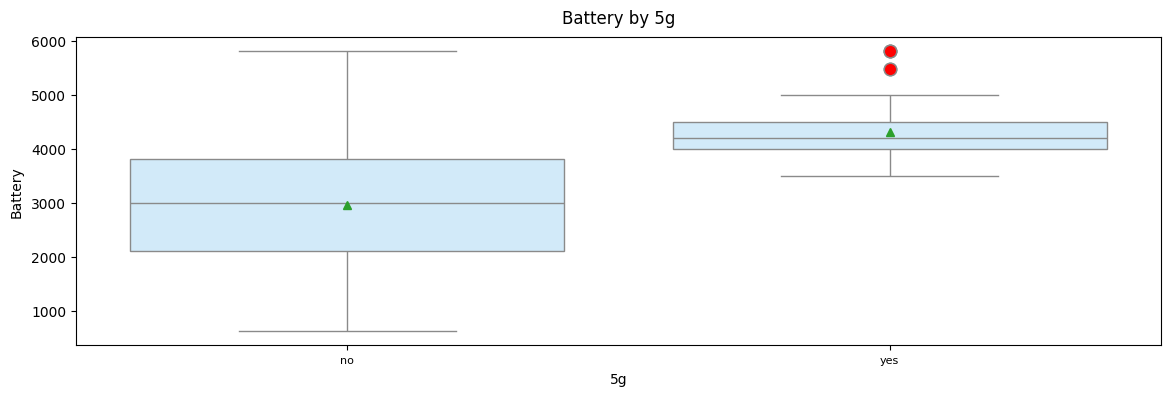

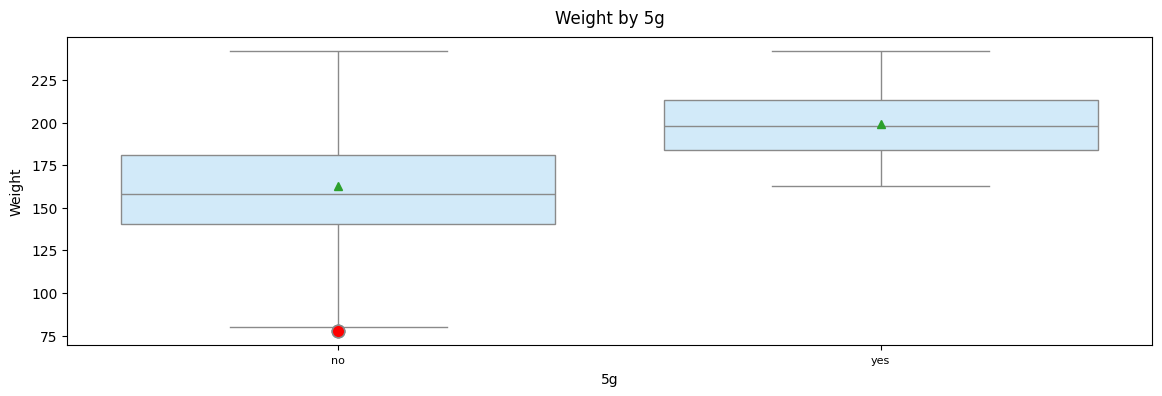

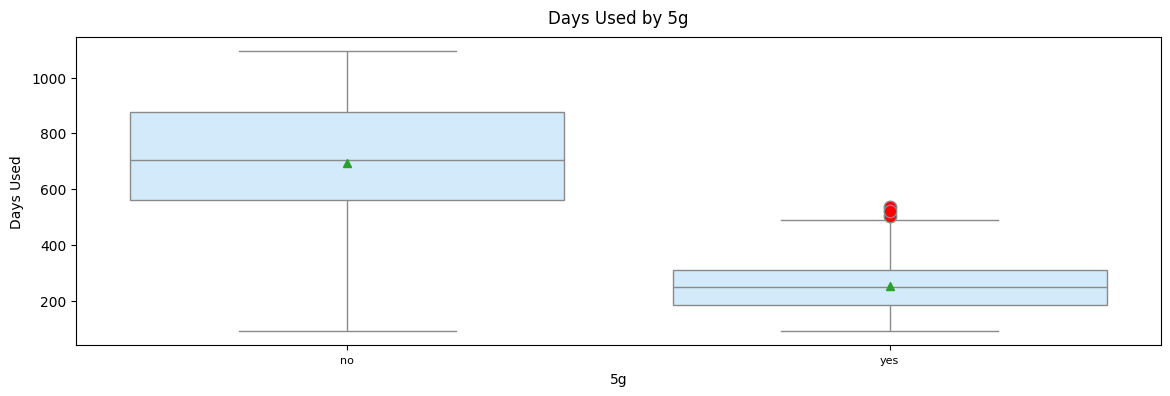

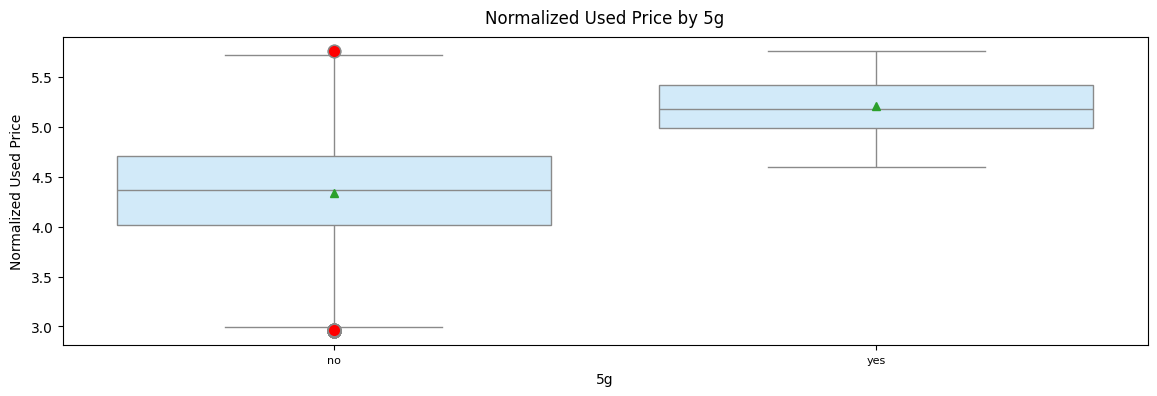

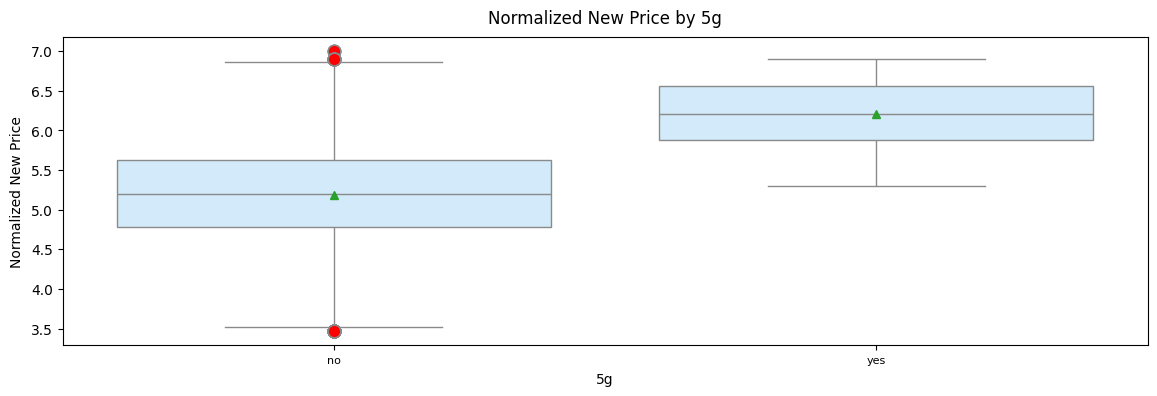

Before 5g vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 157     Percent:4.5%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 2       Percent:0.1%
ram                  : 0       Percent:0.0%
battery              : 5       Percent:0.1%
weight               : 3       Percent:0.1%
days_used            : 3       Percent:0.1%
normalized_used_price: 37      Percent:1.1%
normalized_new_price : 48      Percent:1.4%
__________________________________________________________________________________________________________________________
After 5g vs numerical attribute outliers have been processed
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory        

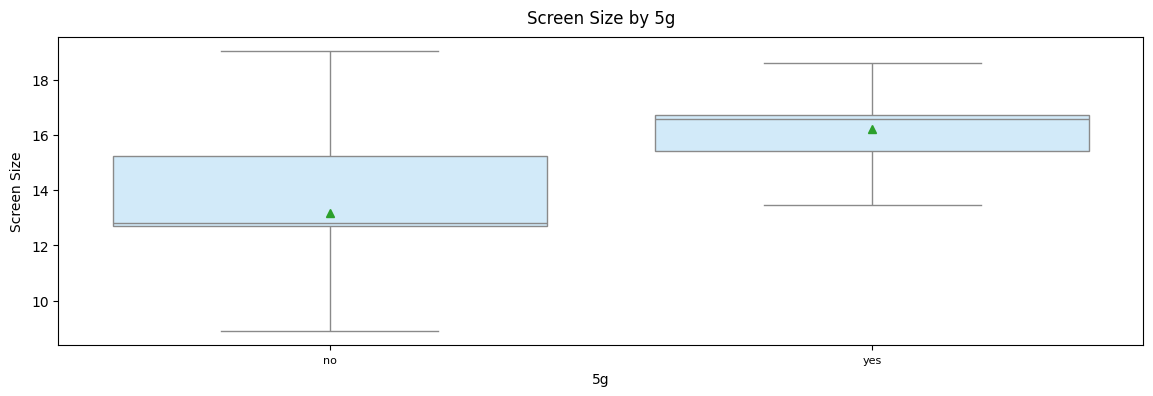

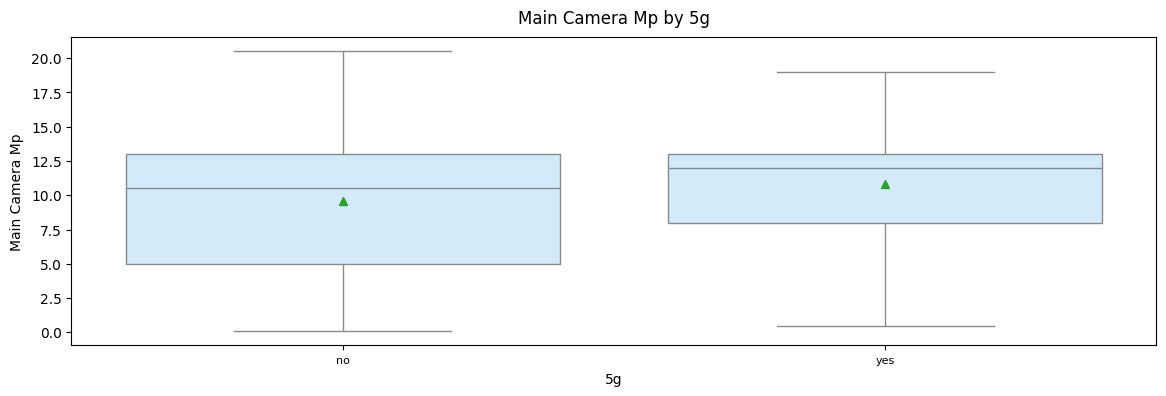

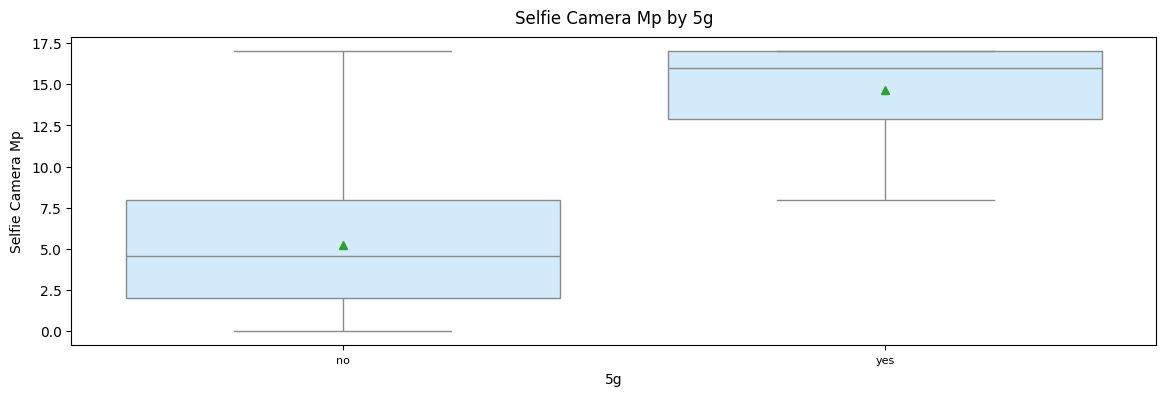

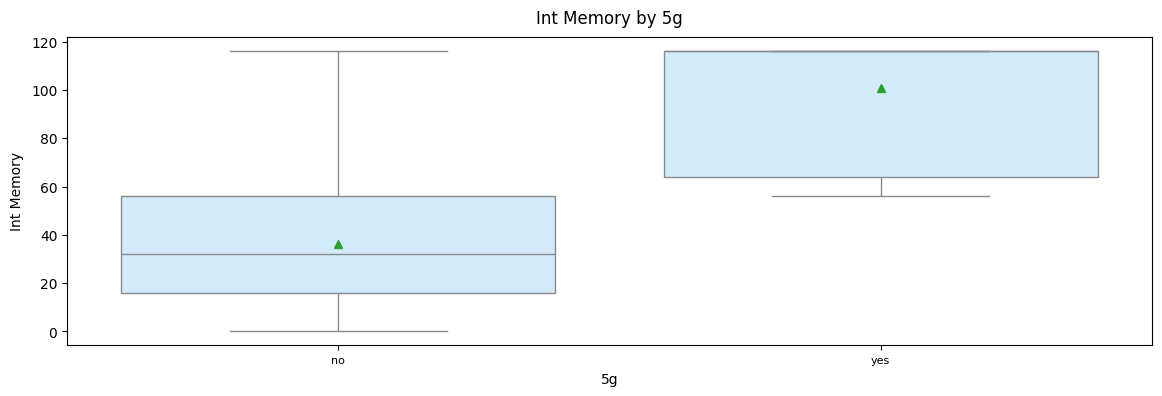

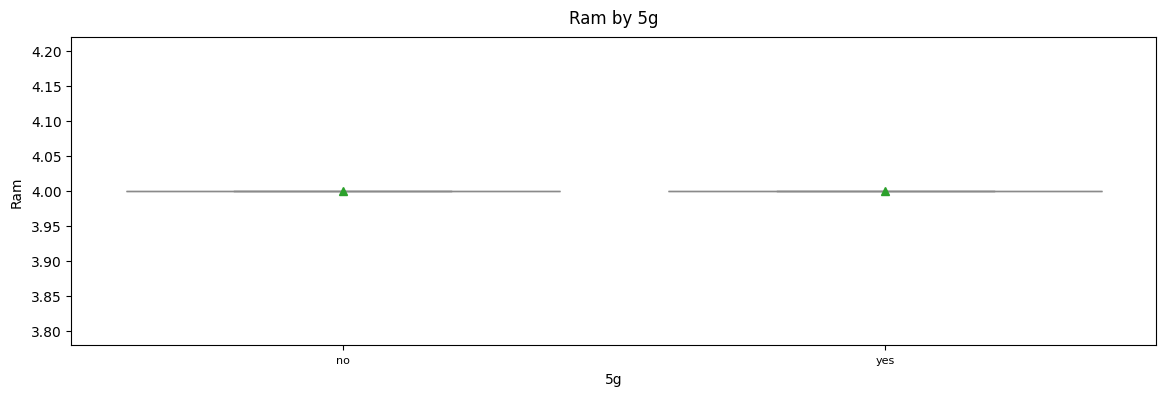

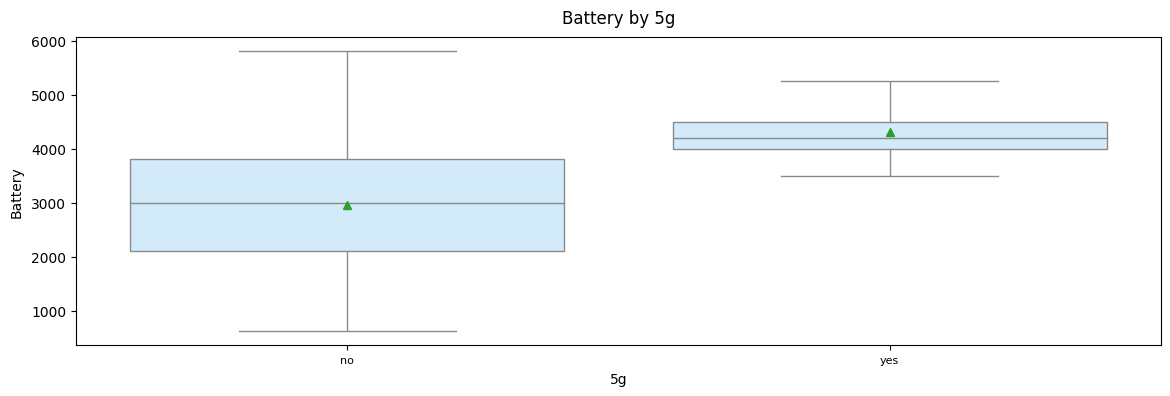

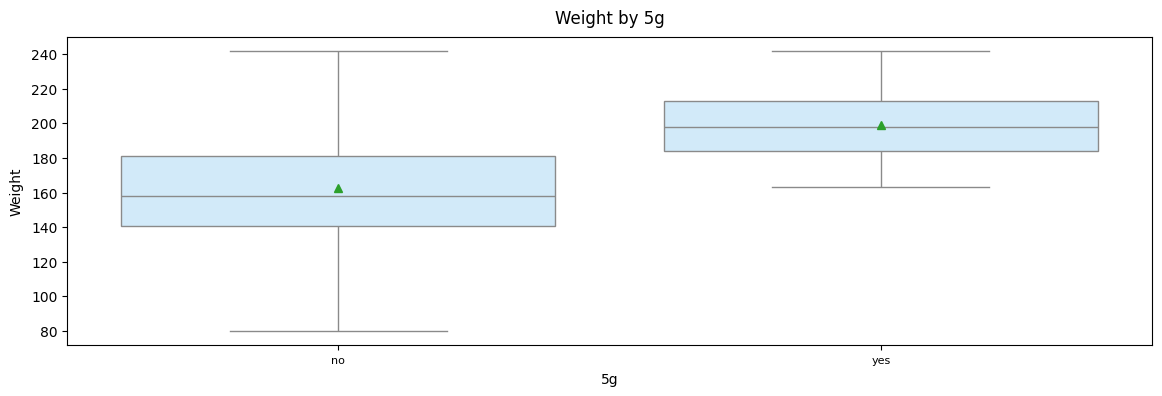

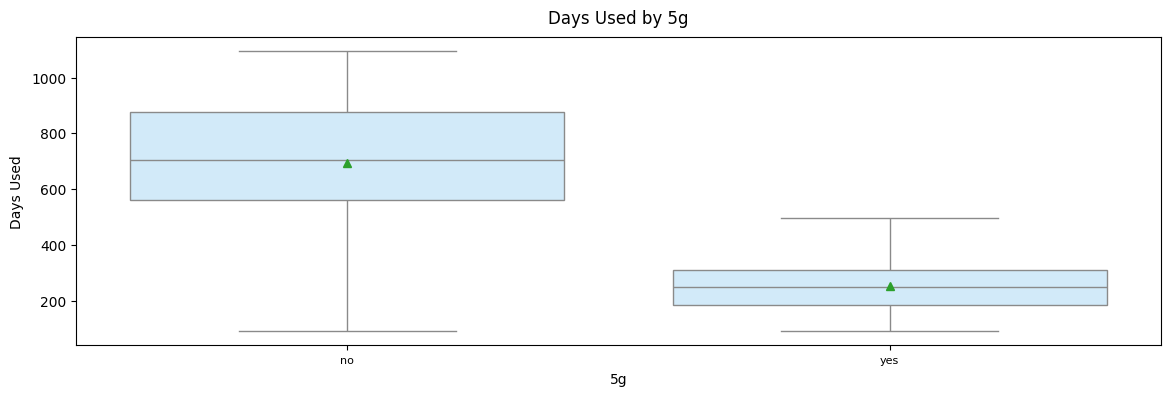

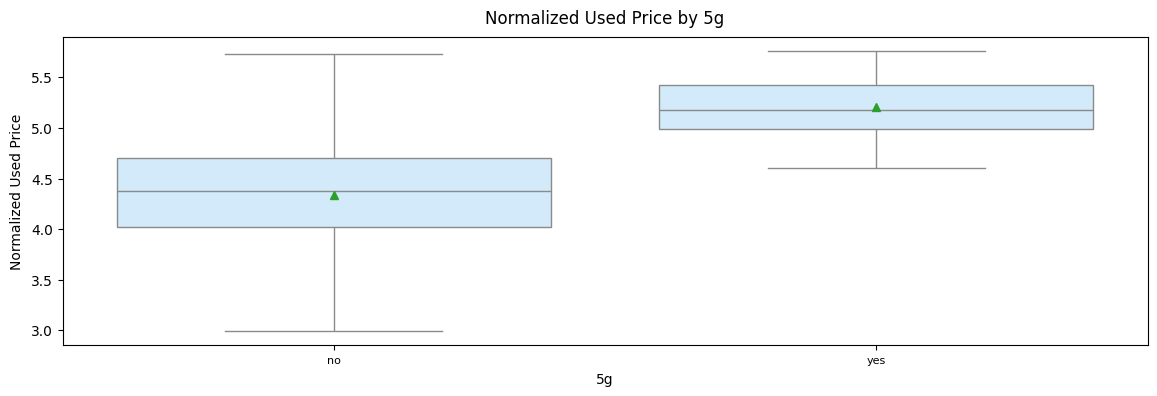

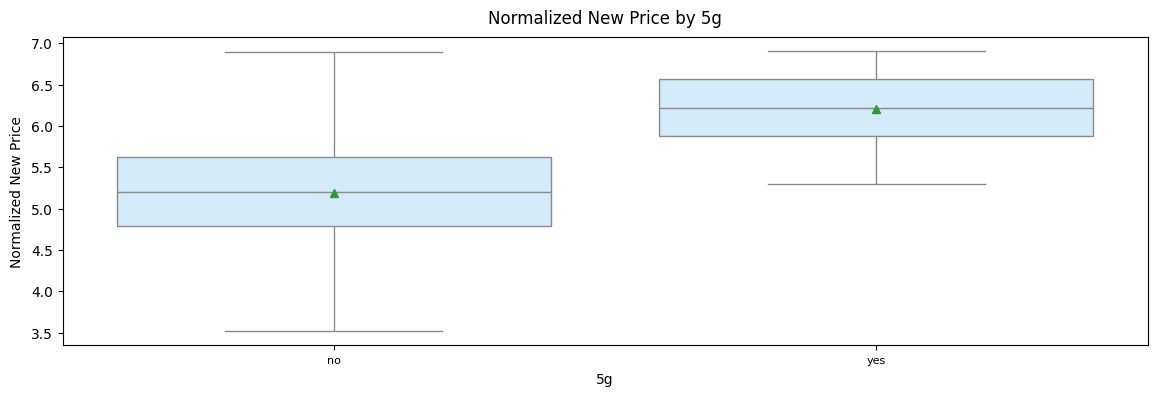

In [61]:
# Create boxplots of numerical attributes by 5g
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, '5g', col)
    
# Call process_bivariate_outliers to find and process outliers of numerical attributes by 5g
process_bivariate_outliers(df_Recell_Upd, '5g')    

### Cycle through the univariate and bivariate outlier processing again

In [62]:
# Find univariate outliers
find_outliers(df_Recell_Upd)

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [63]:
# Cap the univariate outliers to the upper/lower bounds
for cols in df_num_list:
    treat_outliers(df_Recell_Upd, cols)

# Find any outliers
find_outliers(df_Recell_Upd)    

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [64]:
# Find any outliers of numerical attributes by brand name
find_bivariate_outliers(df_Recell_Upd, 'brand_name')

# Treat outliers to the upper/lower bounds by brand name
treat_bivariate_outliers(df_Recell_Upd, 'brand_name')

# Find any outliers of numerical attributes by brand name
find_bivariate_outliers(df_Recell_Upd, 'brand_name')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 300     Percent:8.7%
main_camera_mp       : 42      Percent:1.2%
selfie_camera_mp     : 60      Percent:1.7%
int_memory           : 8       Percent:0.2%
ram                  : 0       Percent:0.0%
battery              : 11      Percent:0.3%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [65]:
# Find any outliers of numerical attributes by years existed
find_bivariate_outliers(df_Recell_Upd, 'years_existed')

# Treat outliers to the upper/lower bounds by years existed
treat_bivariate_outliers(df_Recell_Upd, 'years_existed')

# Find any outliers of numerical attributes by years existed
find_bivariate_outliers(df_Recell_Upd, 'years_existed')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 227     Percent:6.6%
main_camera_mp       : 10      Percent:0.3%
selfie_camera_mp     : 1       Percent:0.0%
int_memory           : 8       Percent:0.2%
ram                  : 0       Percent:0.0%
battery              : 90      Percent:2.6%
weight               : 8       Percent:0.2%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [66]:
# Find any outliers of numerical attributes by os
find_bivariate_outliers(df_Recell_Upd, 'os')

# Treat outliers to the upper/lower bounds by os
treat_bivariate_outliers(df_Recell_Upd, 'os')

# Find any outliers of numerical attributes by os
find_bivariate_outliers(df_Recell_Upd, 'os')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 3       Percent:0.1%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 2       Percent:0.1%
normalized_new_price : 3       Percent:0.1%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [67]:
# Find any outliers of numerical attributes by 4g
find_bivariate_outliers(df_Recell_Upd, '4g')

# Treat outliers to the upper/lower bounds by 4g
treat_bivariate_outliers(df_Recell_Upd, '4g')

# Find any outliers of numerical attributes by 4g
find_bivariate_outliers(df_Recell_Upd, '4g')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 6       Percent:0.2%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 1       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [68]:
# Find any outliers of numerical attributes by 5g
find_bivariate_outliers(df_Recell_Upd, '5g')

# Treat outliers to the upper/lower bounds by 5g
treat_bivariate_outliers(df_Recell_Upd, '5g')

# Find any outliers of numerical attributes by 5g
find_bivariate_outliers(df_Recell_Upd, '5g')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 183     Percent:5.3%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


### Cycle through the univariate and bivariate outlier process again

In [69]:
# Find univariate outliers
find_outliers(df_Recell_Upd)

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [70]:
# Find any outliers of numerical attributes by brand name
find_bivariate_outliers(df_Recell_Upd, 'brand_name')

# Treat outliers to the upper/lower bounds by brand name
treat_bivariate_outliers(df_Recell_Upd, 'brand_name')

# Find any outliers of numerical attributes by brand name
find_bivariate_outliers(df_Recell_Upd, 'brand_name')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 41      Percent:1.2%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 2       Percent:0.1%
int_memory           : 8       Percent:0.2%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 6       Percent:0.2%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [71]:
# Find any outliers of numerical attributes by years existed
find_bivariate_outliers(df_Recell_Upd, 'years_existed')

# Treat outliers to the upper/lower bounds by years existed
treat_bivariate_outliers(df_Recell_Upd, 'years_existed')

# Find any outliers of numerical attributes by years existed
find_bivariate_outliers(df_Recell_Upd, 'years_existed')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 34      Percent:1.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 1       Percent:0.0%
int_memory           : 8       Percent:0.2%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [72]:
# Find any outliers of numerical attributes by os
find_bivariate_outliers(df_Recell_Upd, 'os')

# Treat outliers to the upper/lower bounds by os
treat_bivariate_outliers(df_Recell_Upd, 'os')

# Find any outliers of numerical attributes by os
find_bivariate_outliers(df_Recell_Upd, 'os')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 5       Percent:0.1%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [73]:
# Find any outliers of numerical attributes by 4g
find_bivariate_outliers(df_Recell_Upd, '4g')

# Treat outliers to the upper/lower bounds by 4g
treat_bivariate_outliers(df_Recell_Upd, '4g')

# Find any outliers of numerical attributes by 4g
find_bivariate_outliers(df_Recell_Upd, '4g')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 1       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%
Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%


In [74]:
# Find any outliers of numerical attributes by 5g
find_bivariate_outliers(df_Recell_Upd, '5g')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


### Cycle through the univariate and bivariate outlier search again

In [75]:
# Find univariate outliers
find_outliers(df_Recell_Upd)

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [76]:
# Find any outliers of numerical attributes by brand name
find_bivariate_outliers(df_Recell_Upd, 'brand_name')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 34      Percent:1.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 2       Percent:0.1%
int_memory           : 8       Percent:0.2%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


#### Observations:
* These numerical outliers by brand name will rename as they impact other categorical attributes. 
  If capped, they create other outliers that when capped, create outliers here again. If rows are dropped
  they also cause other outliers to be created

In [77]:
# Find any outliers of numerical attributes by years existed
find_bivariate_outliers(df_Recell_Upd, 'years_existed')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [78]:
# Find any outliers of numerical attributes by os
find_bivariate_outliers(df_Recell_Upd, 'os')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [79]:
# Find any outliers of numerical attributes by 4g
find_bivariate_outliers(df_Recell_Upd, '4g')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


In [80]:
# Find any outliers of numerical attributes by 5g
find_bivariate_outliers(df_Recell_Upd, '5g')

Total rows:3454
Number of Outliers:
---------------------------------------------
screen_size          : 0       Percent:0.0%
main_camera_mp       : 0       Percent:0.0%
selfie_camera_mp     : 0       Percent:0.0%
int_memory           : 0       Percent:0.0%
ram                  : 0       Percent:0.0%
battery              : 0       Percent:0.0%
weight               : 0       Percent:0.0%
days_used            : 0       Percent:0.0%
normalized_used_price: 0       Percent:0.0%
normalized_new_price : 0       Percent:0.0%


## EDA

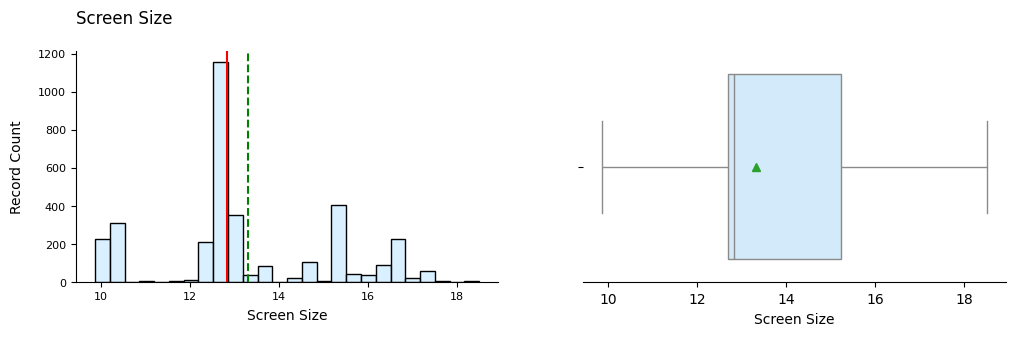

__________________________________________________________________________________________________________________________


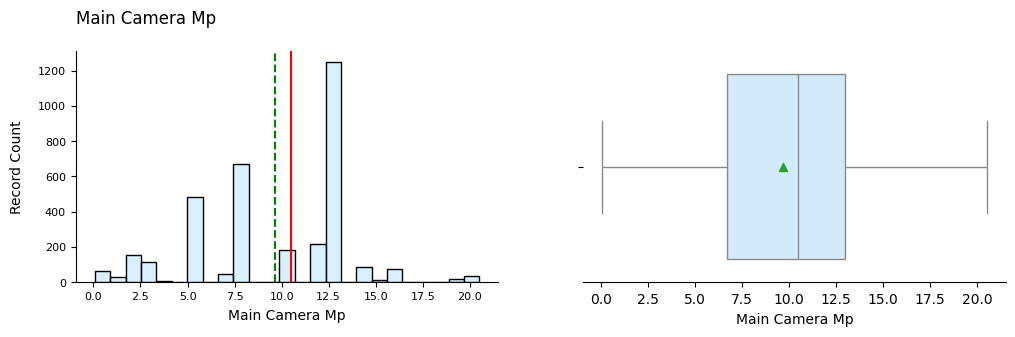

__________________________________________________________________________________________________________________________


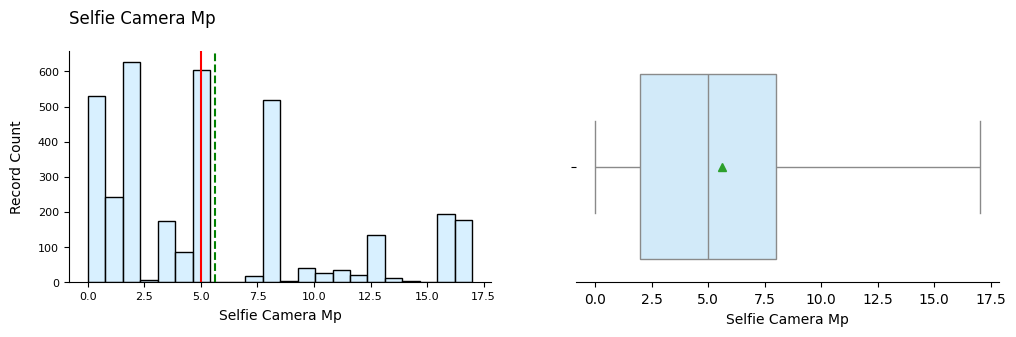

__________________________________________________________________________________________________________________________


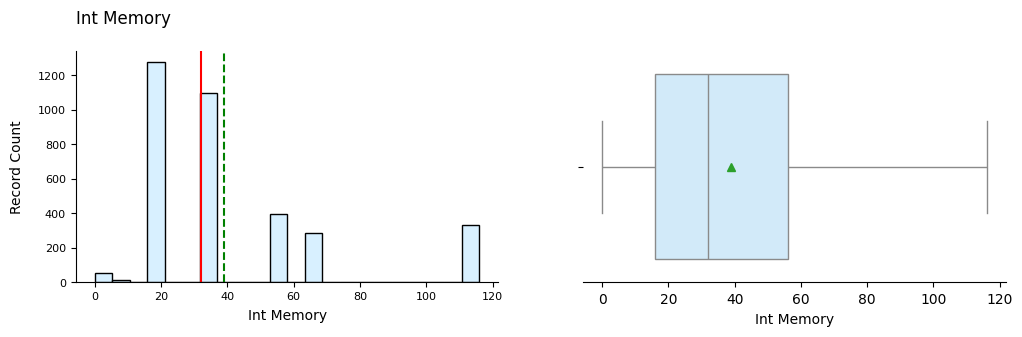

__________________________________________________________________________________________________________________________


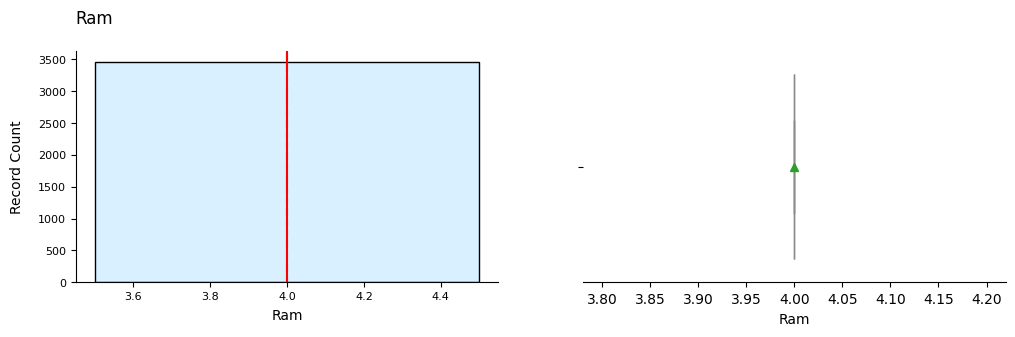

__________________________________________________________________________________________________________________________


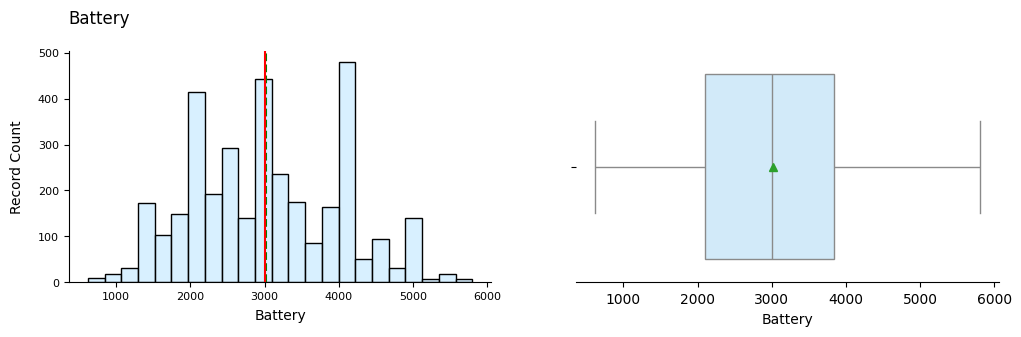

__________________________________________________________________________________________________________________________


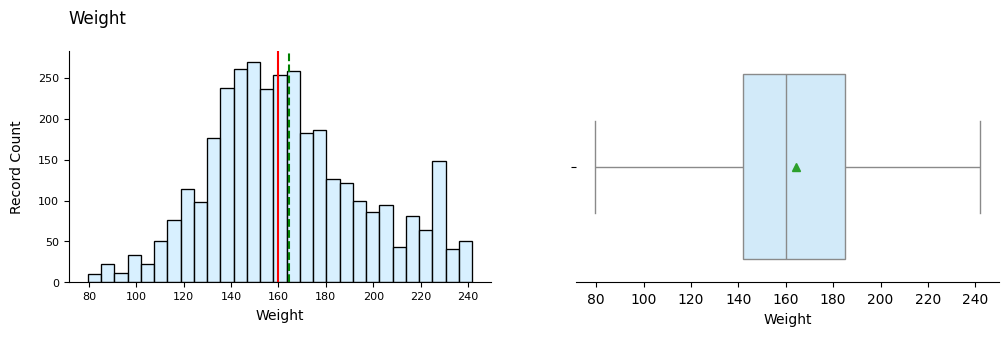

__________________________________________________________________________________________________________________________


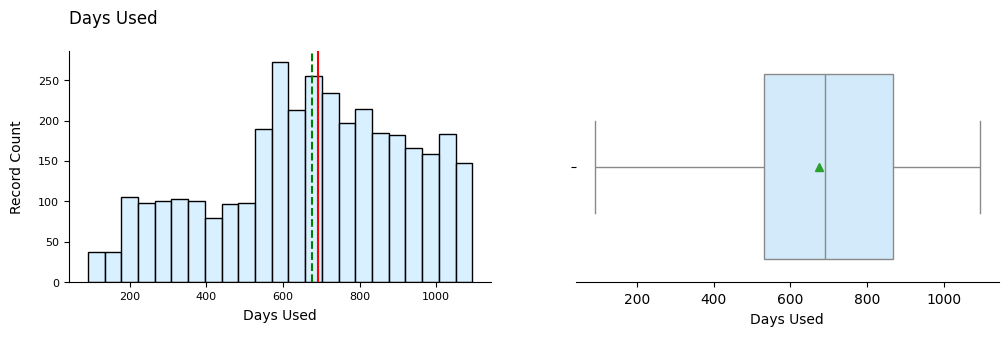

__________________________________________________________________________________________________________________________


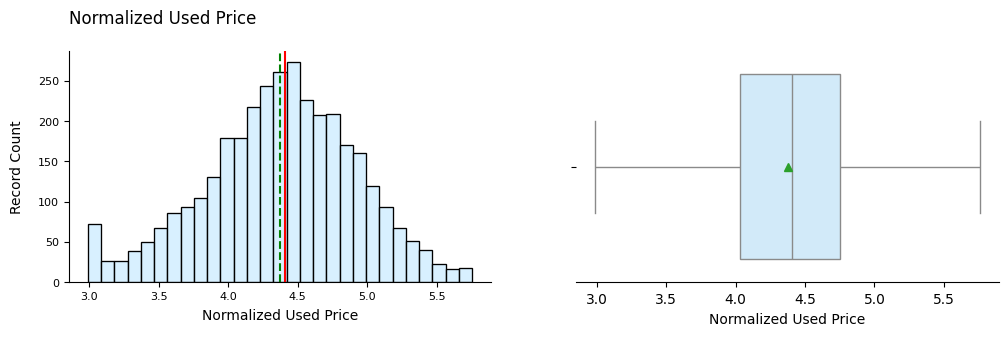

__________________________________________________________________________________________________________________________


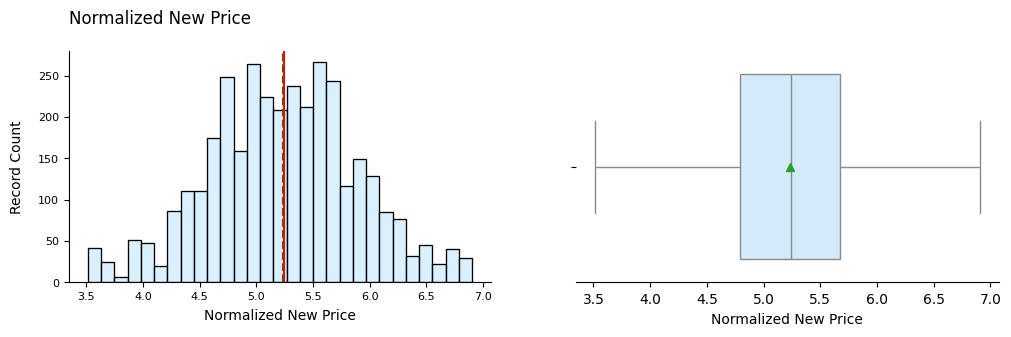

__________________________________________________________________________________________________________________________


In [81]:
# Create histograms and box plots for numerical attributes
for col in df_num_list:
    hist_box_plots(df_Recell_Upd, col)  

#### Observations:
* Outliers for each numerical attribute no longer appear
* Screen size, main camera MP, selfie camera MP, internal memory, RAM, battery, weight are right skewed
* Days used are left skewed
* Normalized used price and normalized new price appear normally distributed

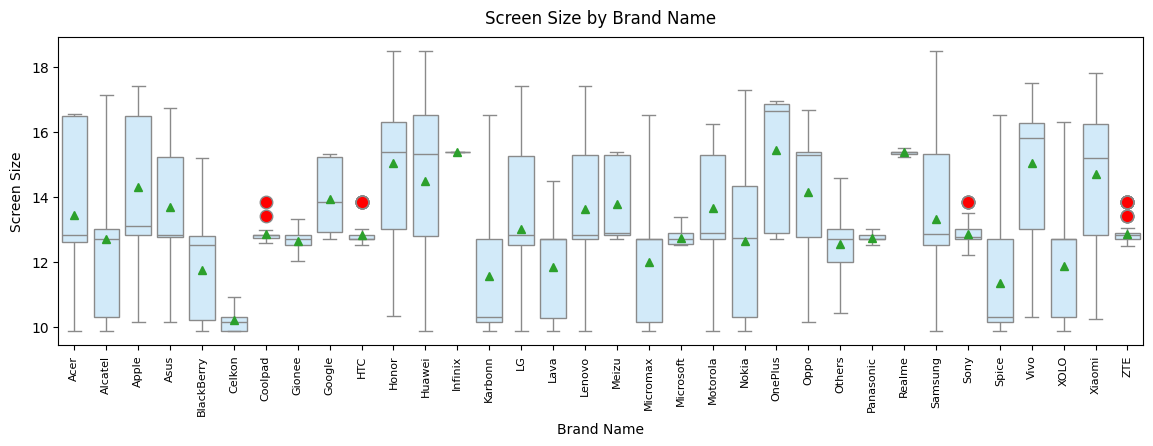

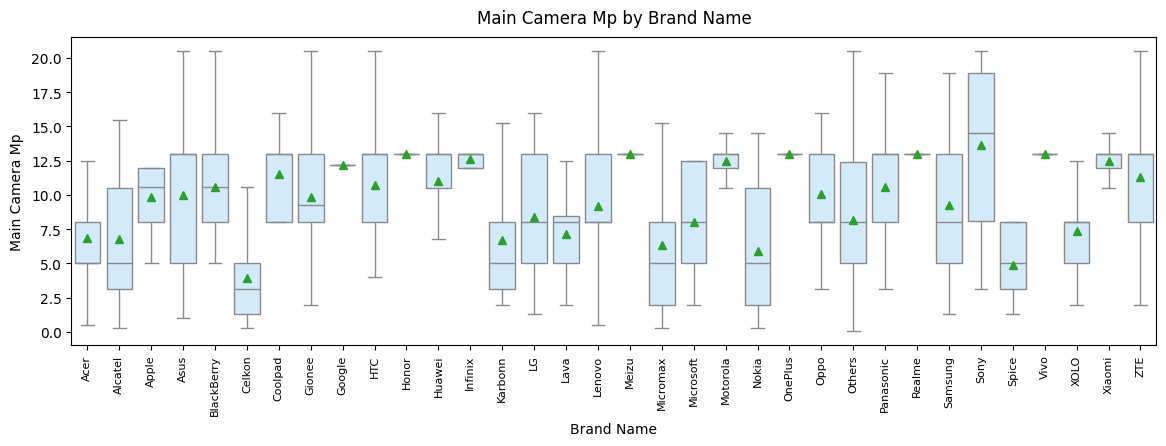

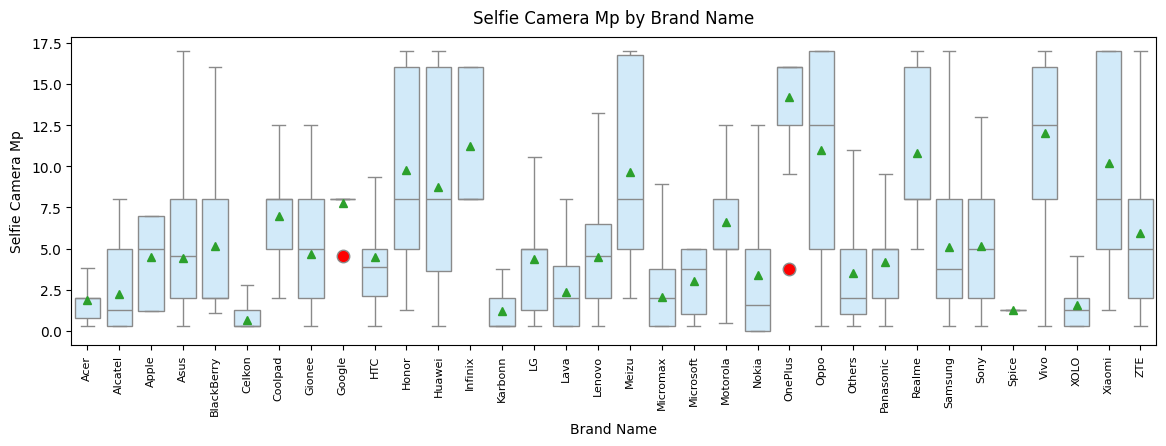

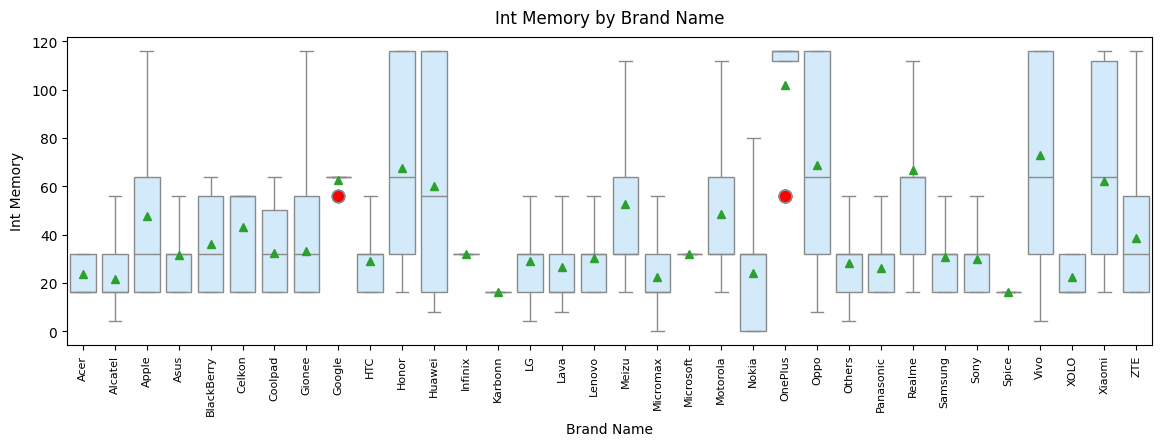

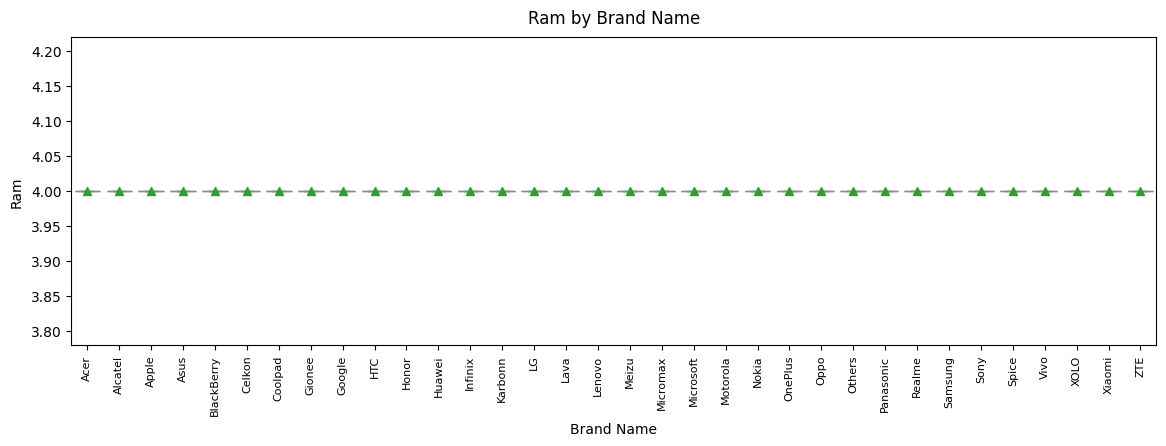

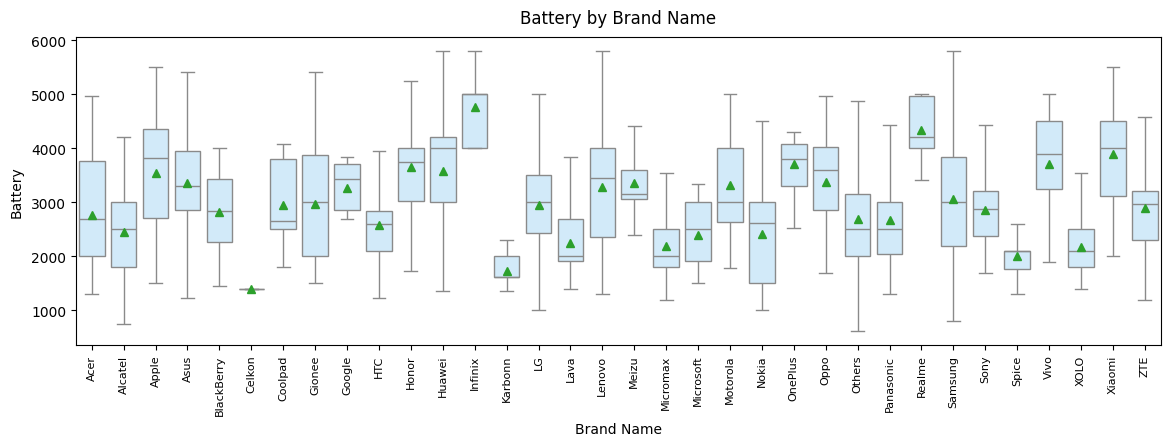

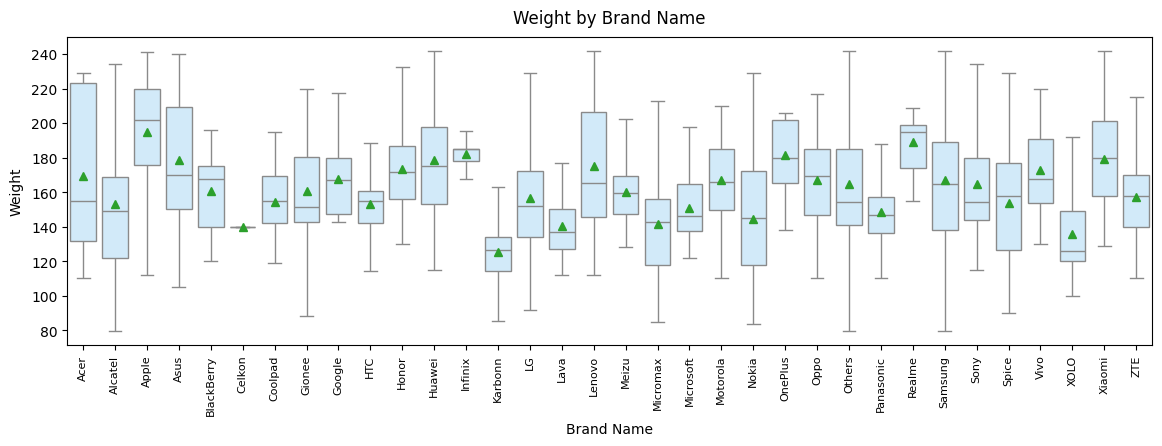

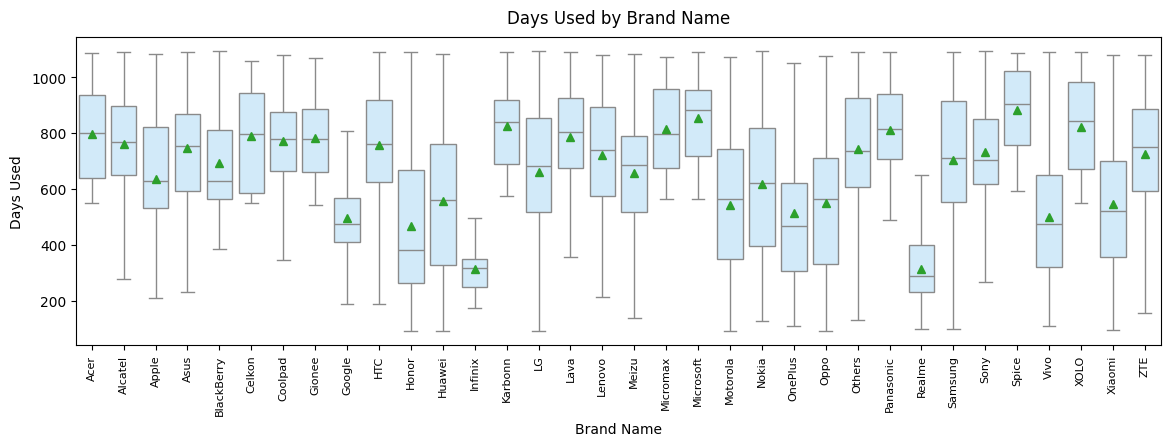

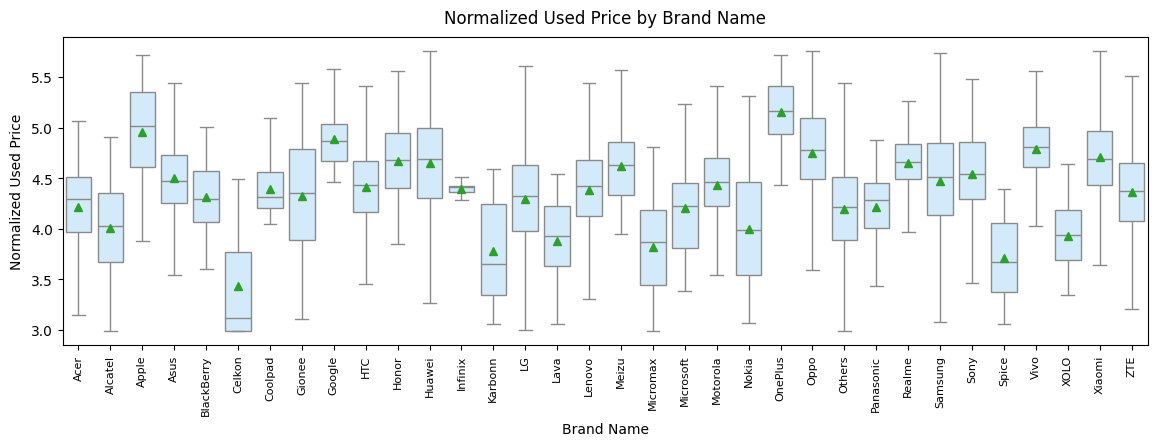

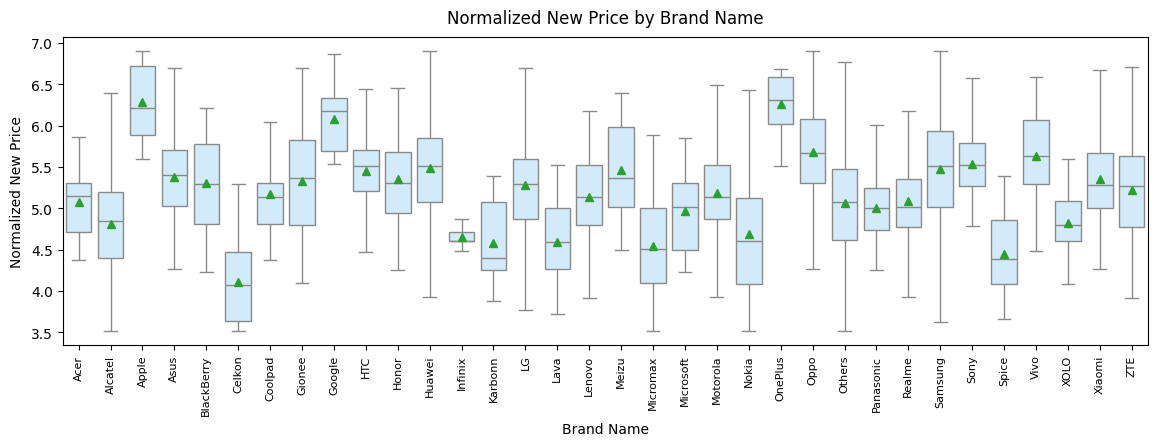

In [82]:
# Create boxplots of numerical attributes by brand name
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, 'brand_name', col) 

#### Observations:
* Screen sizes range from 10cm to 18cm
* Average screen size is between 11cm and 15cm. There are a few outliers on Coolpad, HTC, Sony and ZTE 
  where the average is about 13cm each. These outliers will remain
* Selfie Camera MP has outliers with Google and OnePlus that will rename
* Internal memory has outliers with Google and OnePlus that will rename
* RAM now appears to only have the value 4GB
* Normalized used and new prices boxplots for each brand appear very simliar 

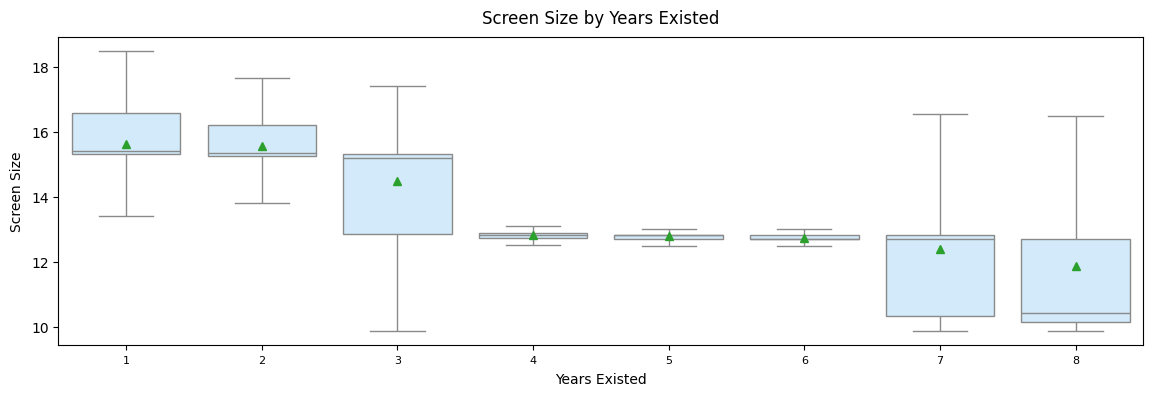

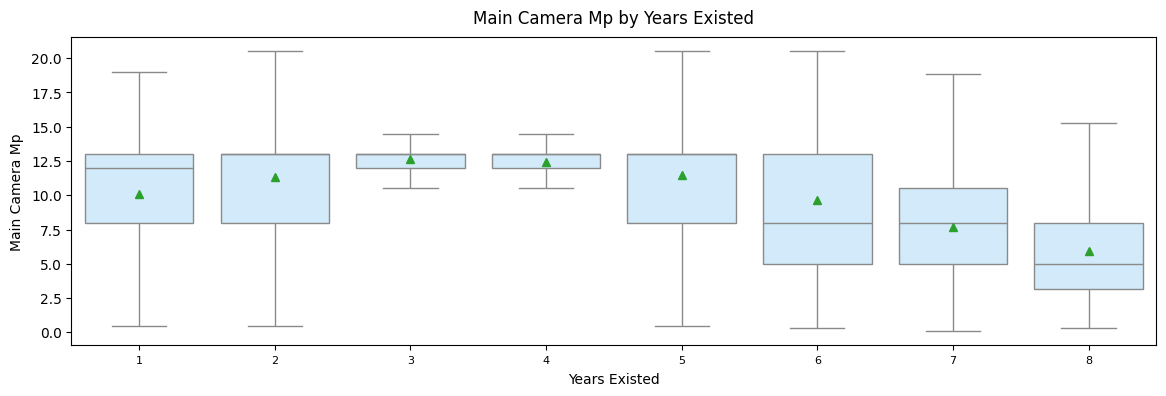

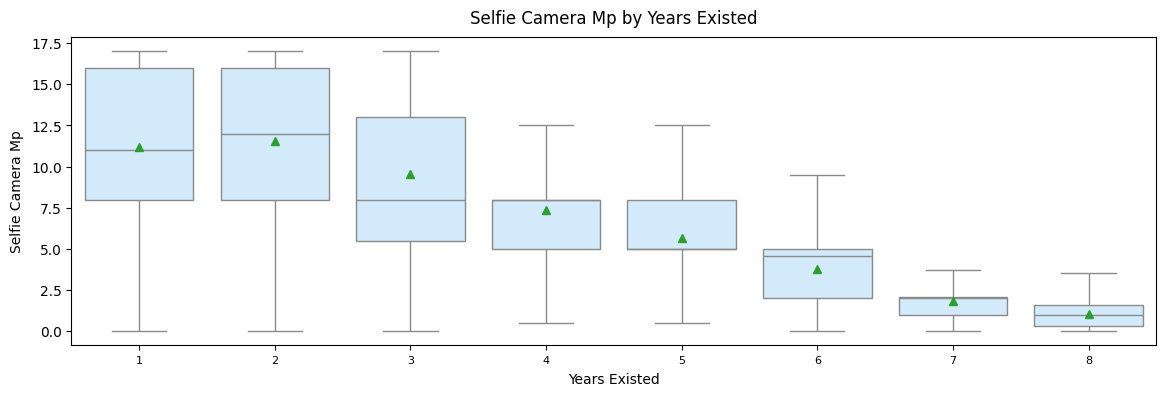

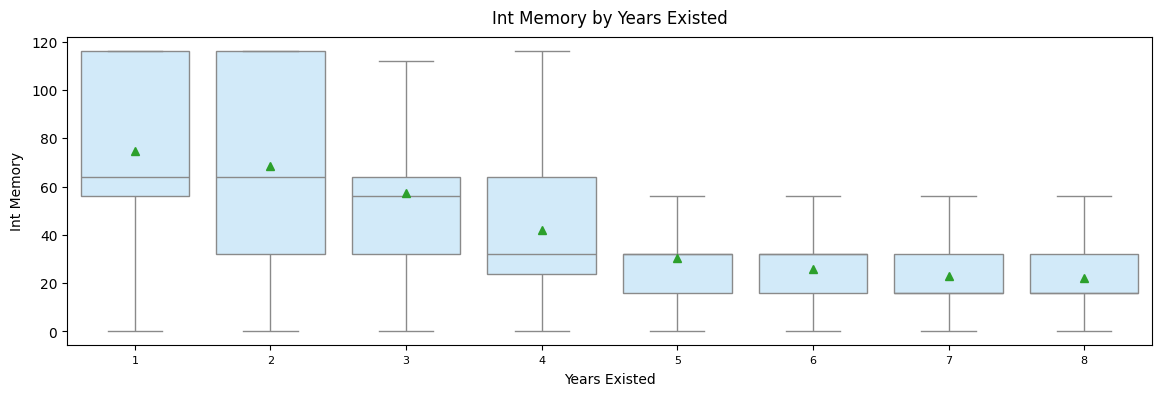

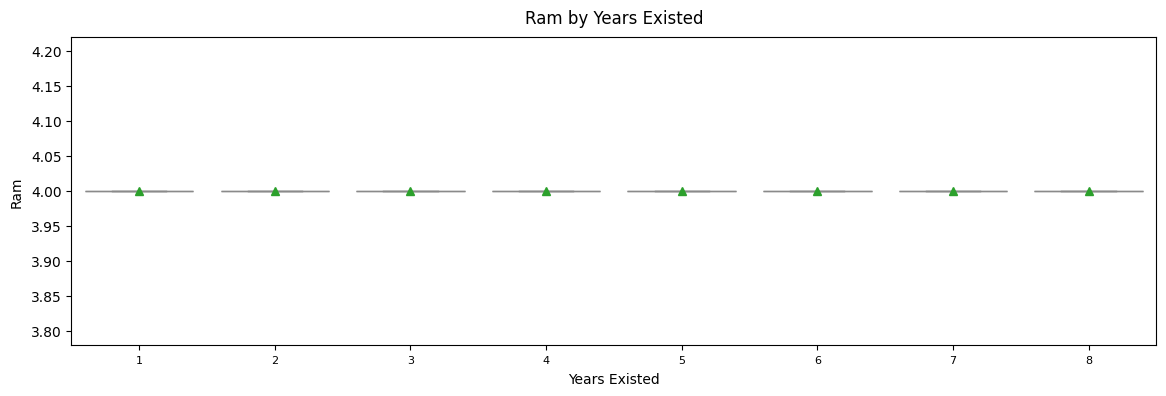

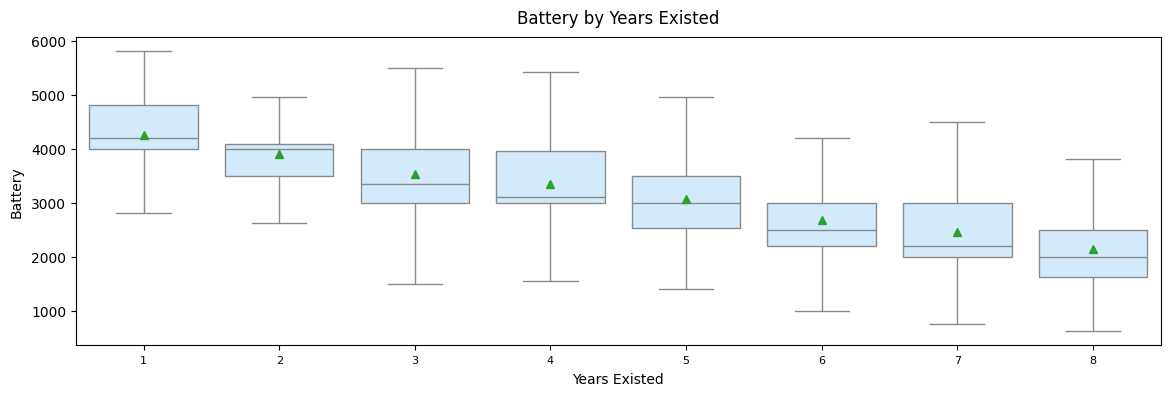

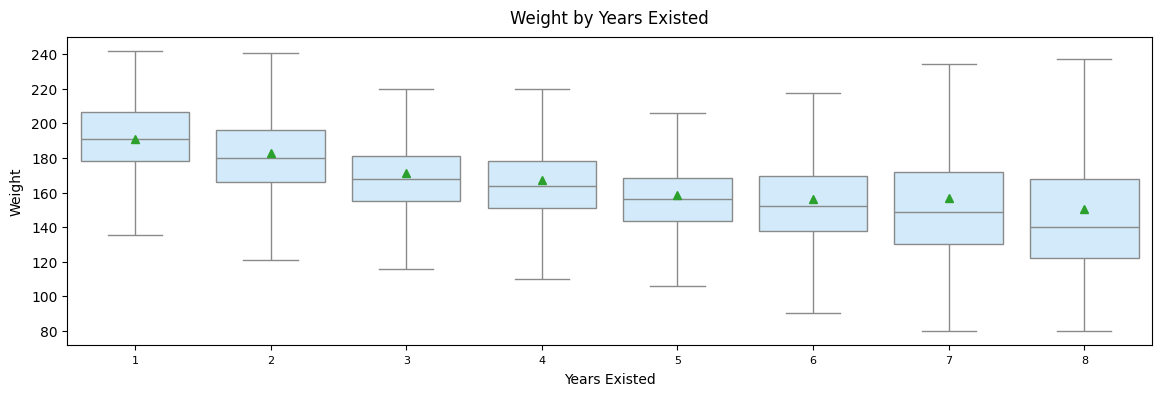

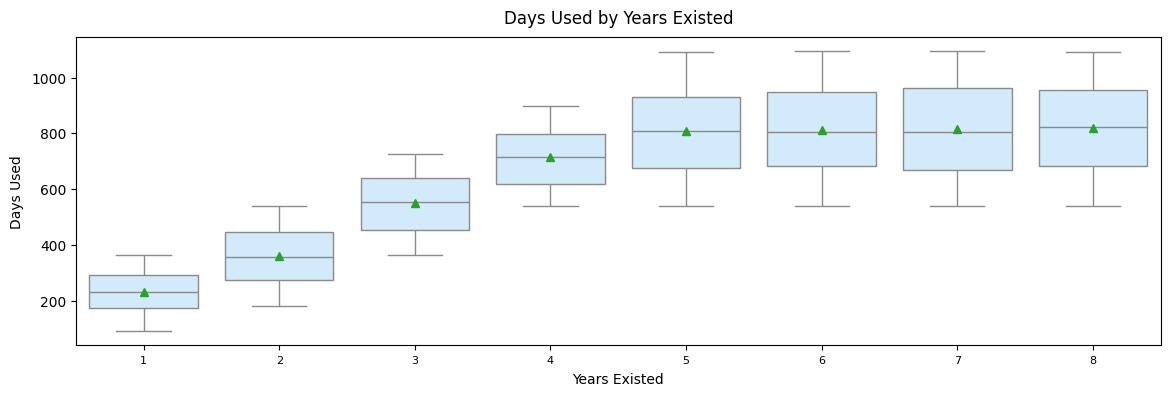

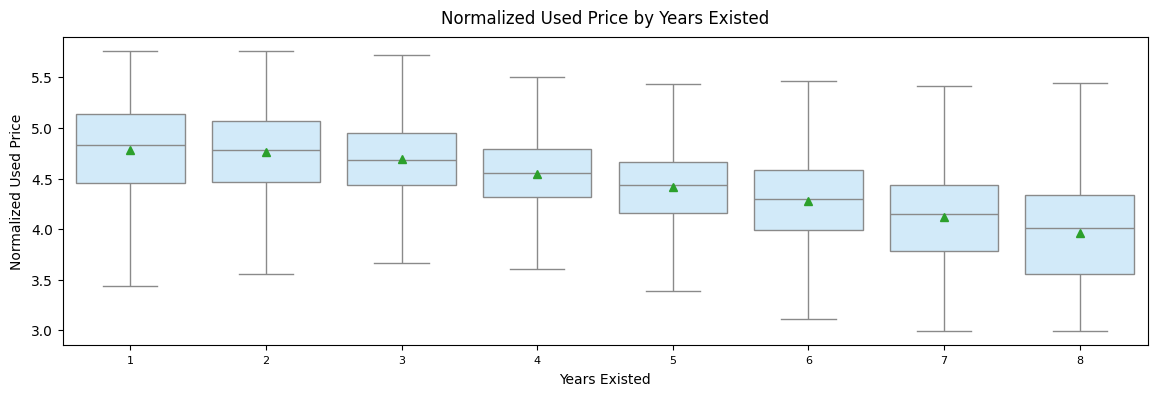

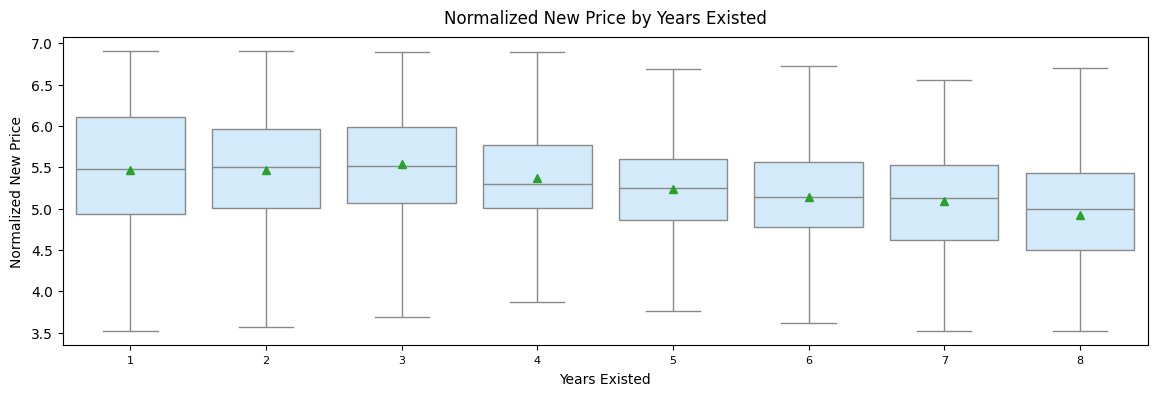

In [83]:
# Create boxplots of numerical attributes by years existed
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, 'years_existed', col)

#### Observations:
* As devices get older the screen size, battery size, selfie camera MP, internal memory, weight, and
  normalized used price also decreases
* Days used increases as devices get older
* RAM remains the same across the years
* Main camera MP has size has not changed much the last 4 years 
* Normalized new price has not varied much over the the last 8 years 

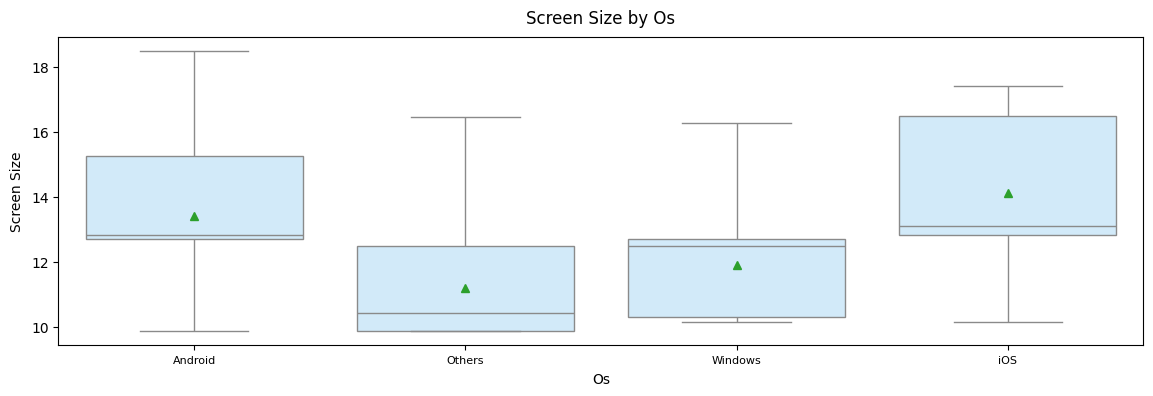

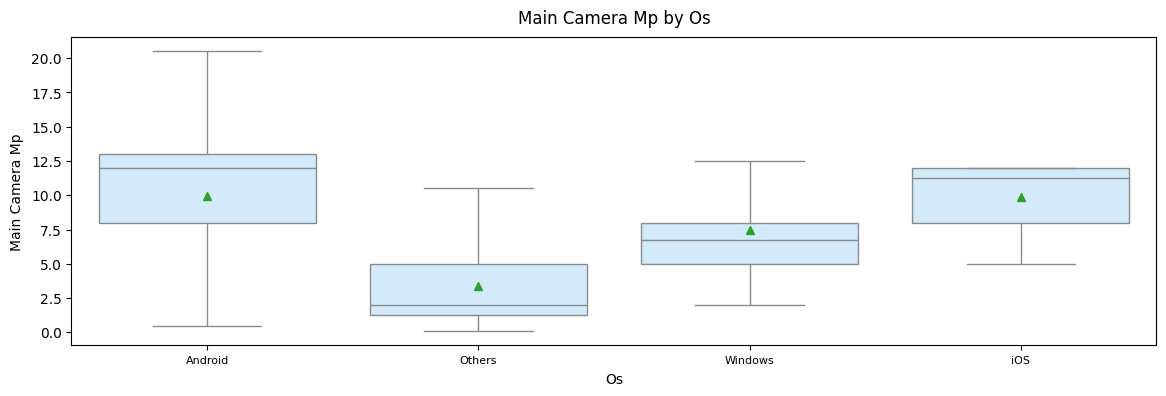

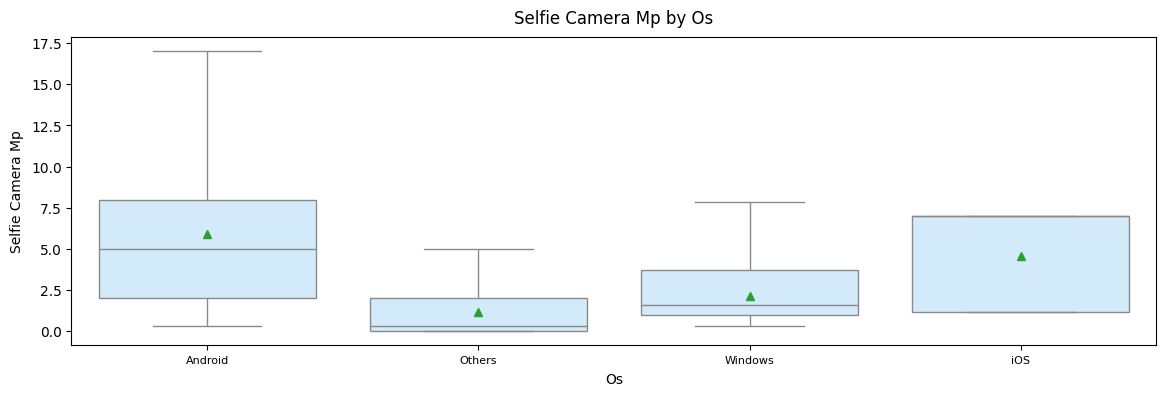

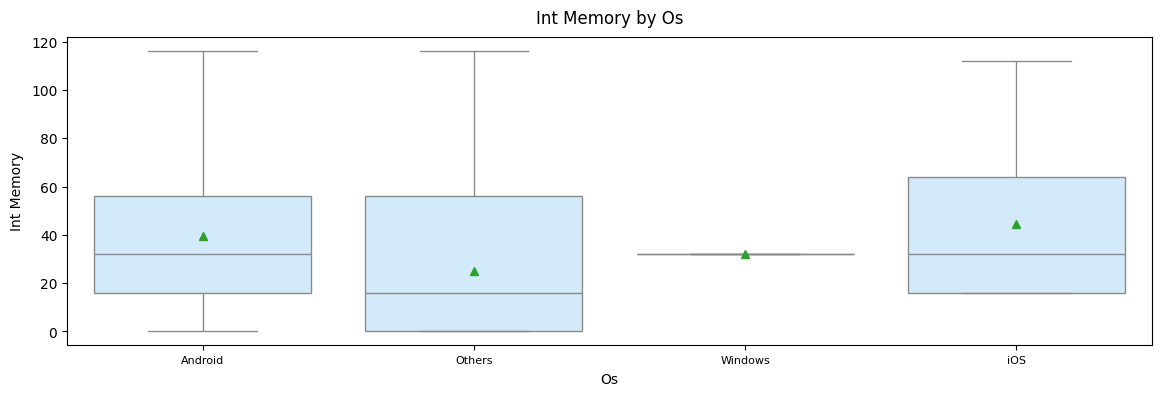

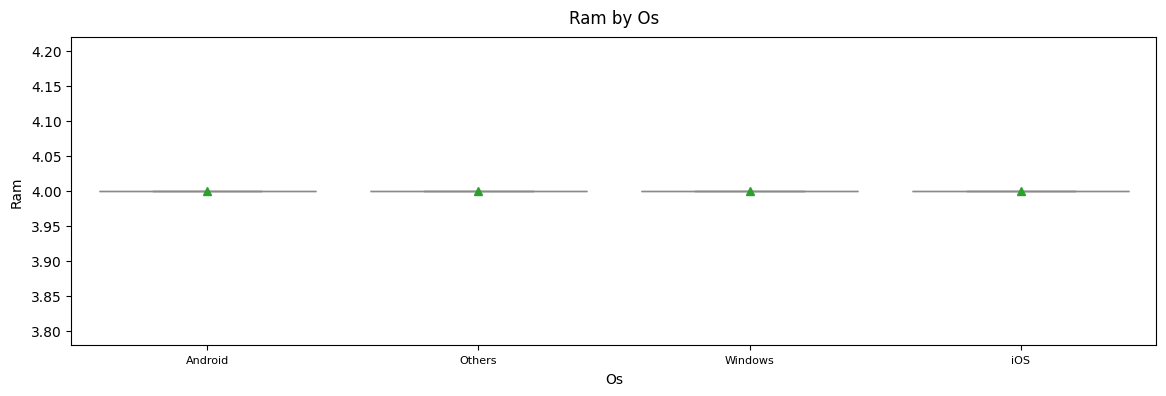

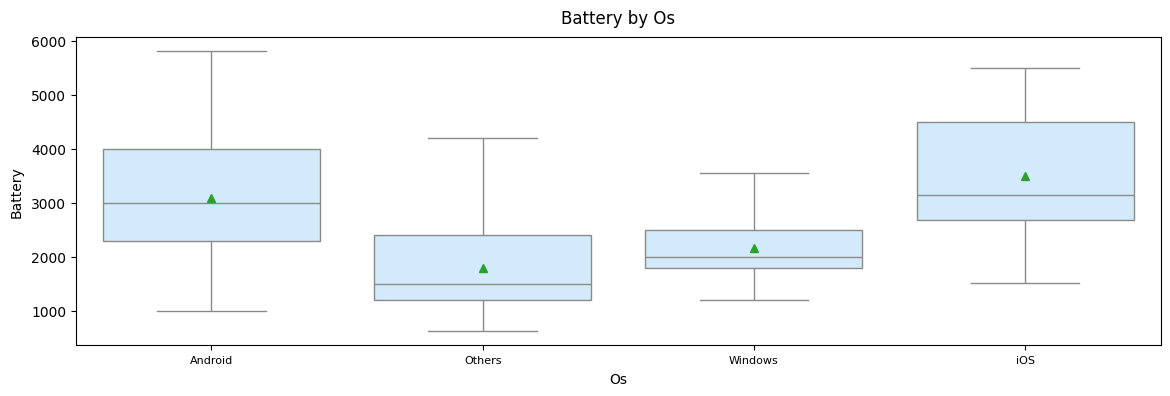

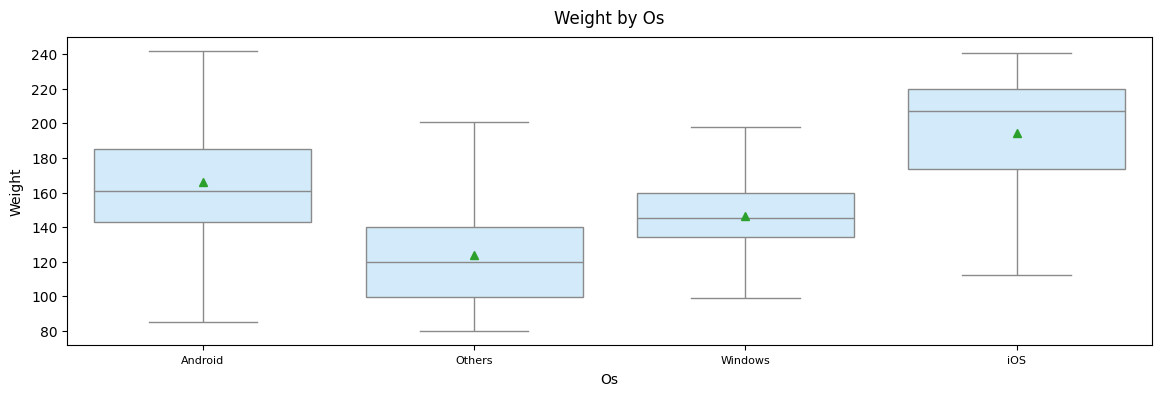

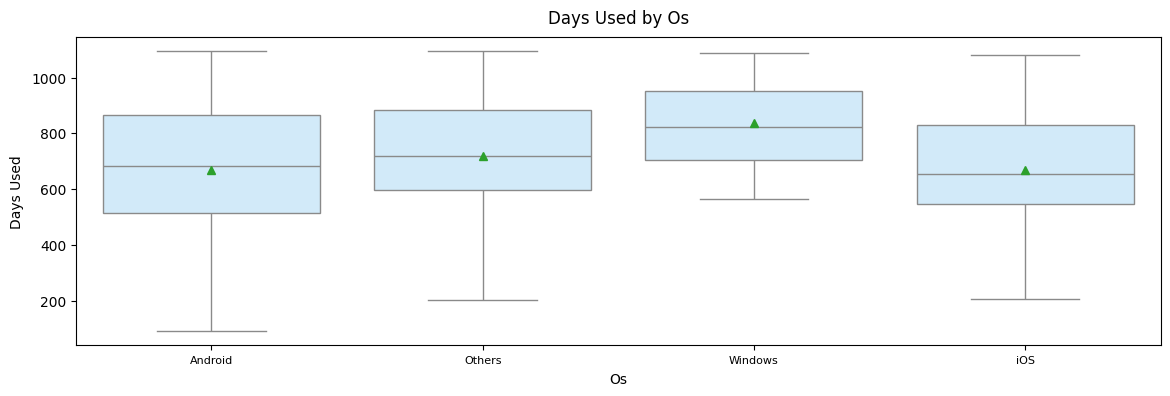

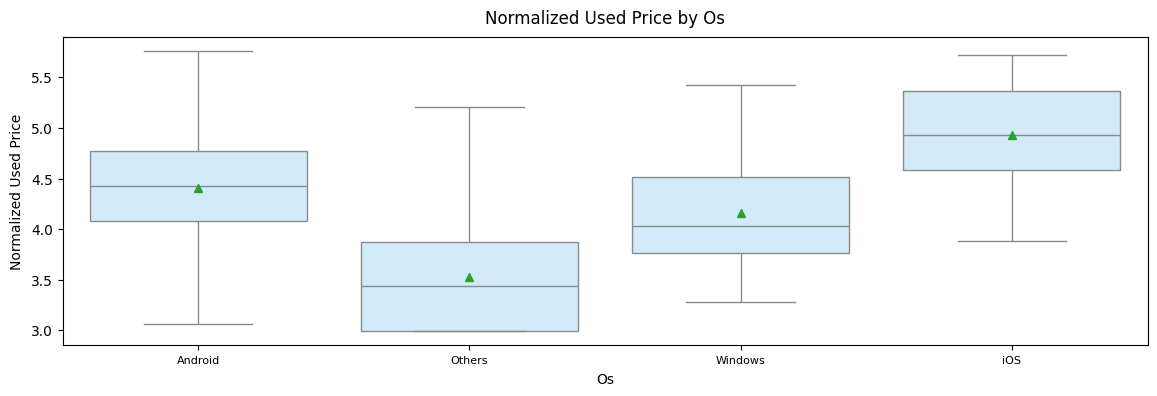

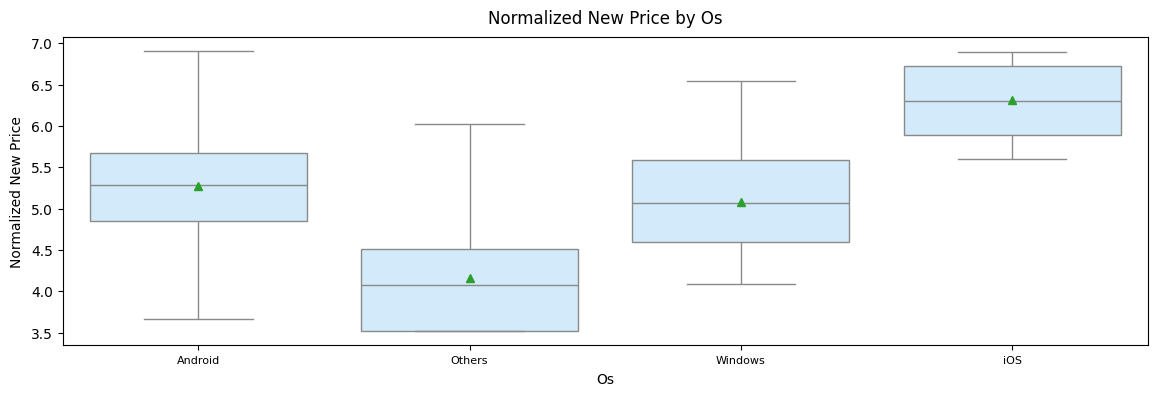

In [84]:
# Create boxplots of numerical attributes by os
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, 'os', col)  

#### Observations
* Apple operating systems tend to have a larger screen size, battery, weight, normalized used price, 
  and normalized new price

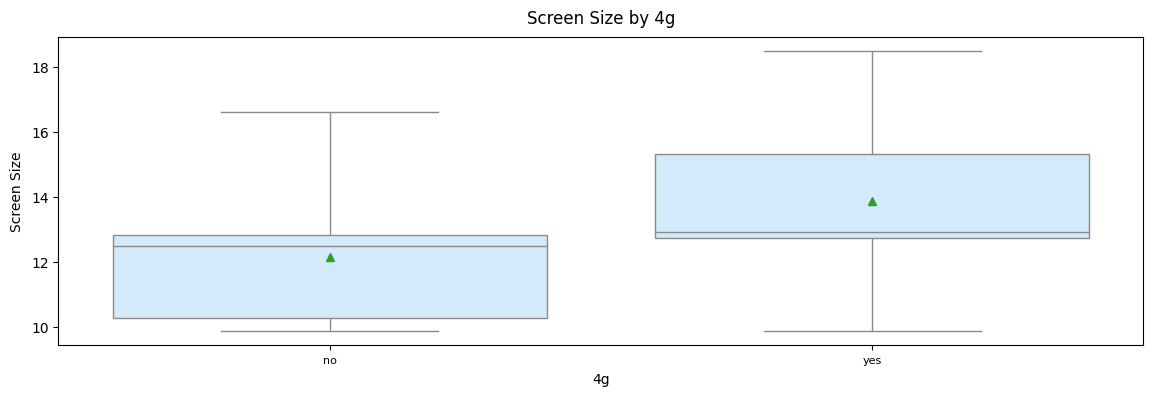

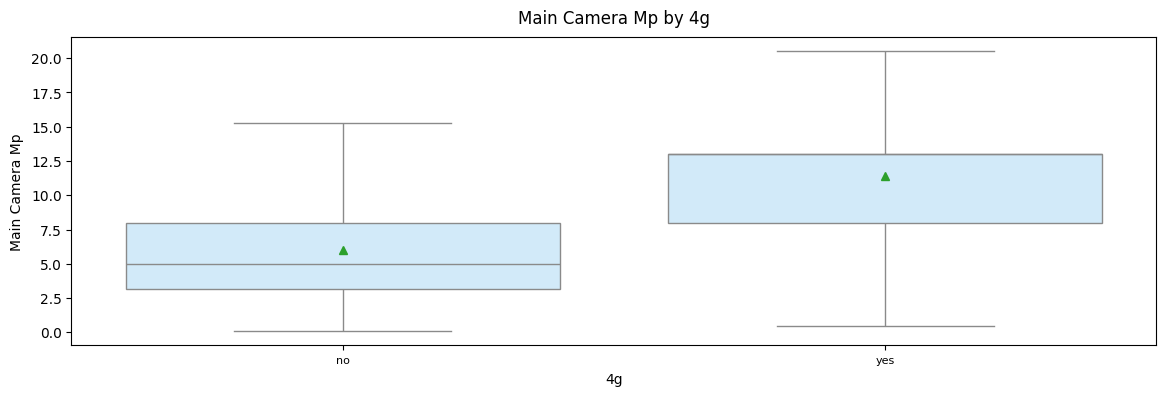

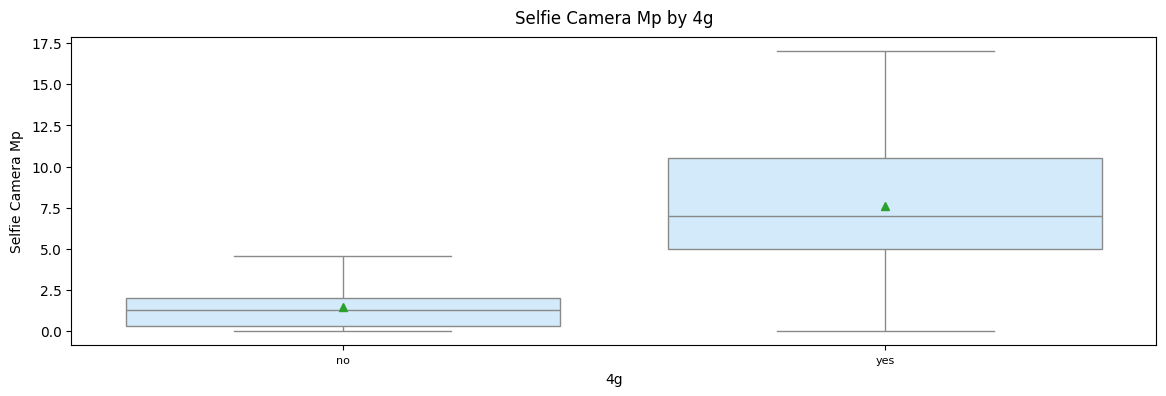

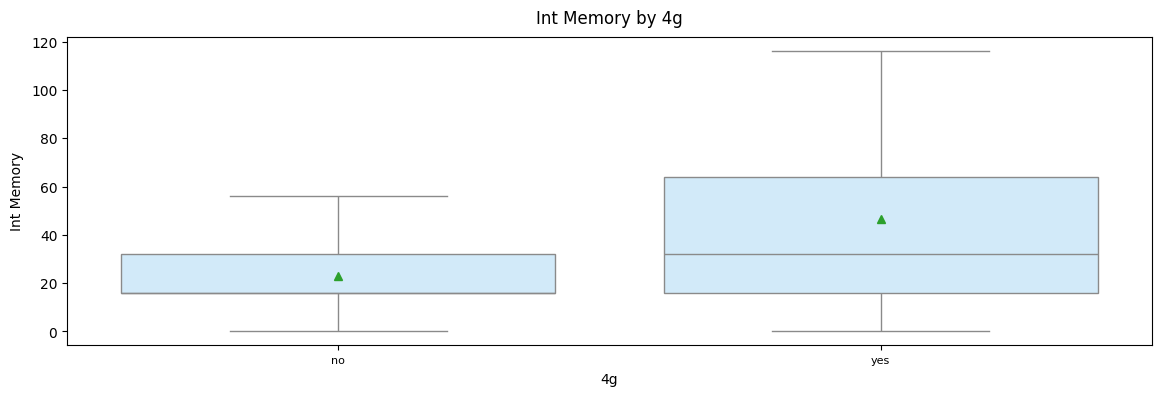

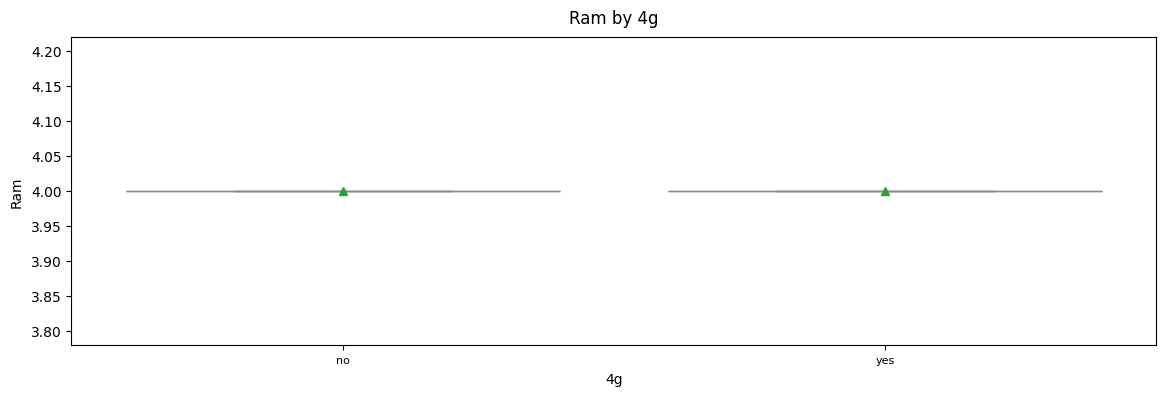

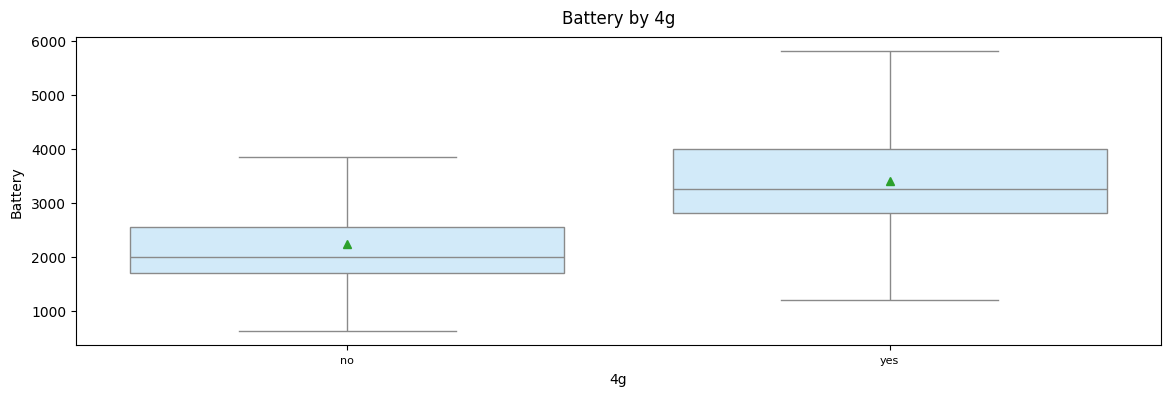

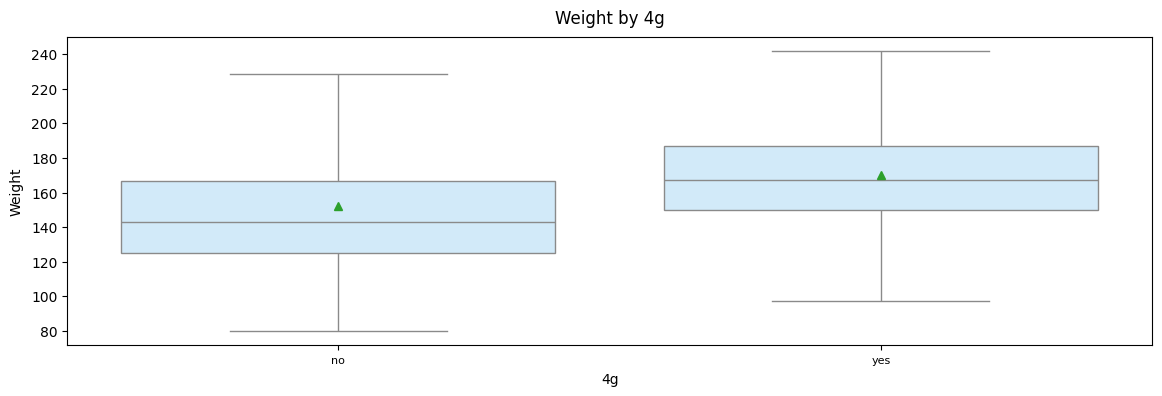

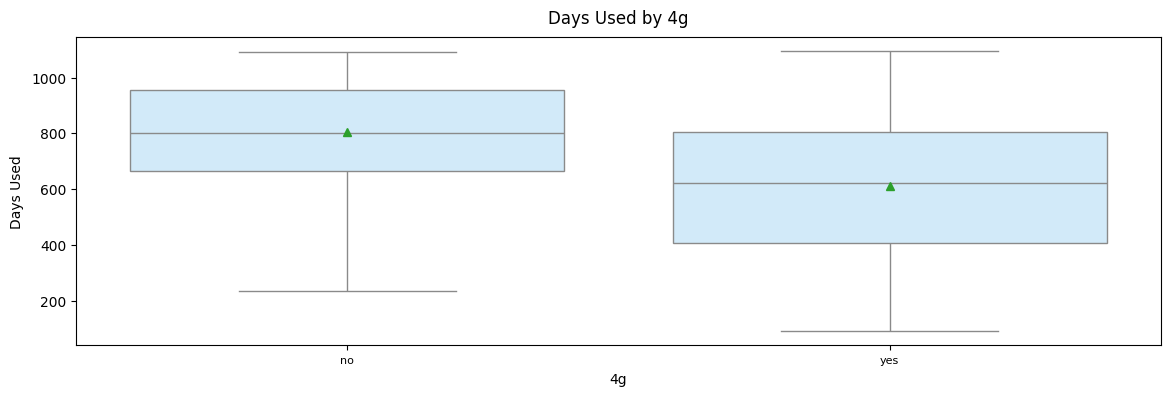

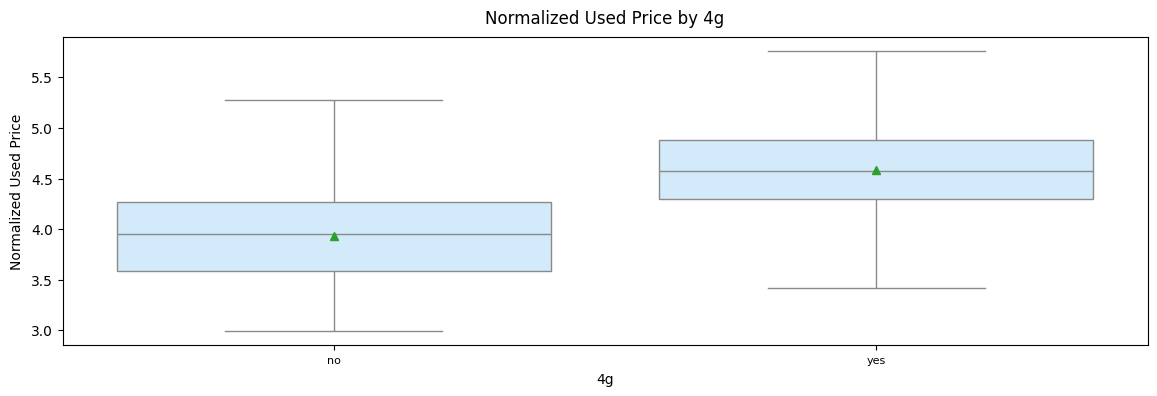

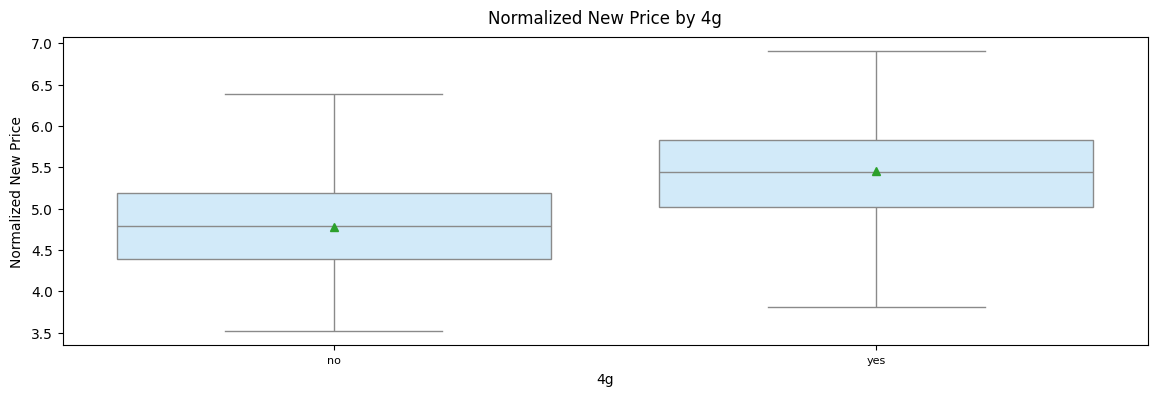

In [85]:
# Create boxplots of numerical attributes by 4g
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, '4g', col)  

#### Observations:
* 4g compatible devices tend to have a larger screen size, main camera MP, selfie camera MP, internal memory, 
  battery, weight, normalized used price, and normalized new price

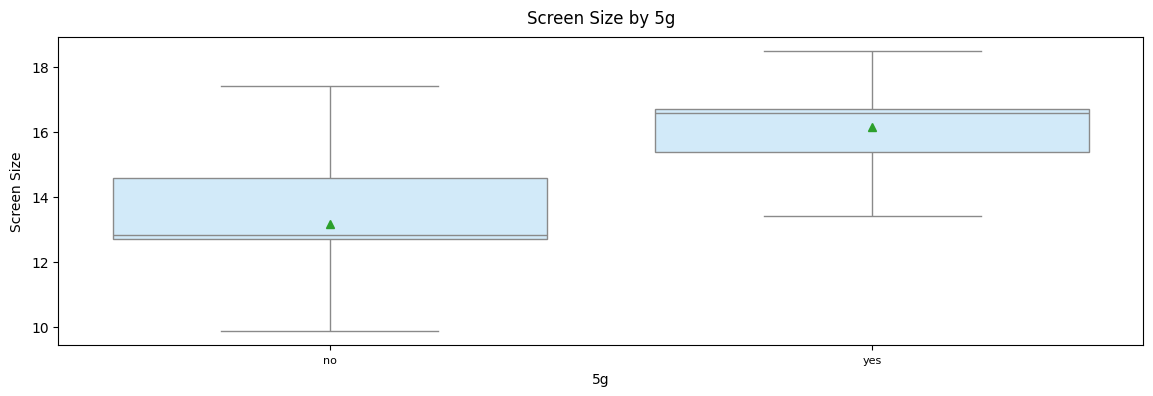

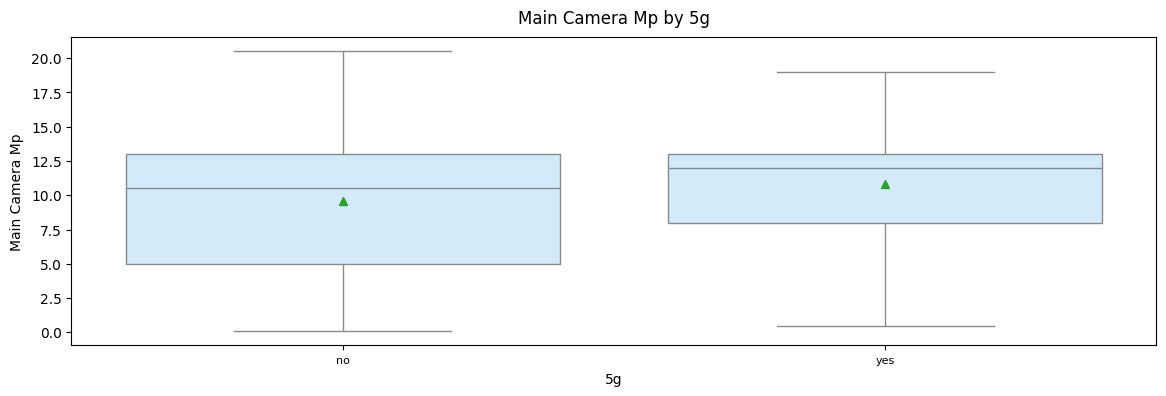

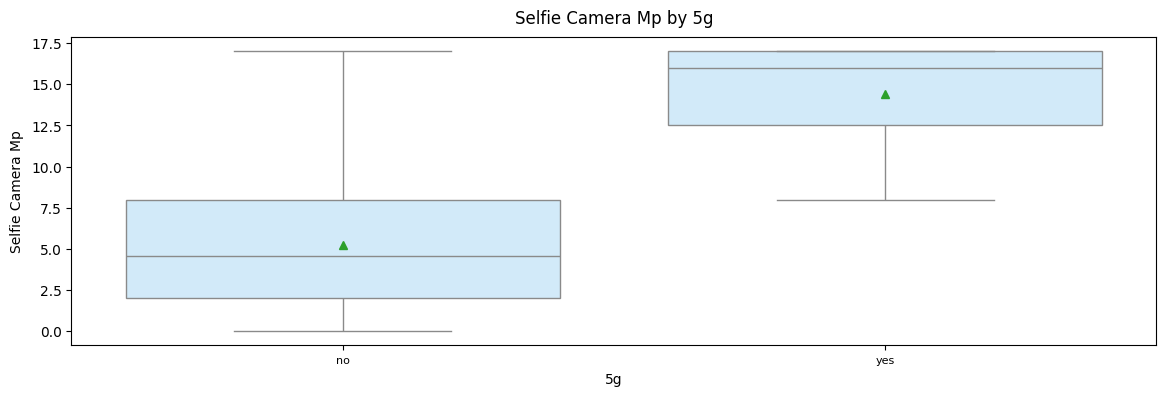

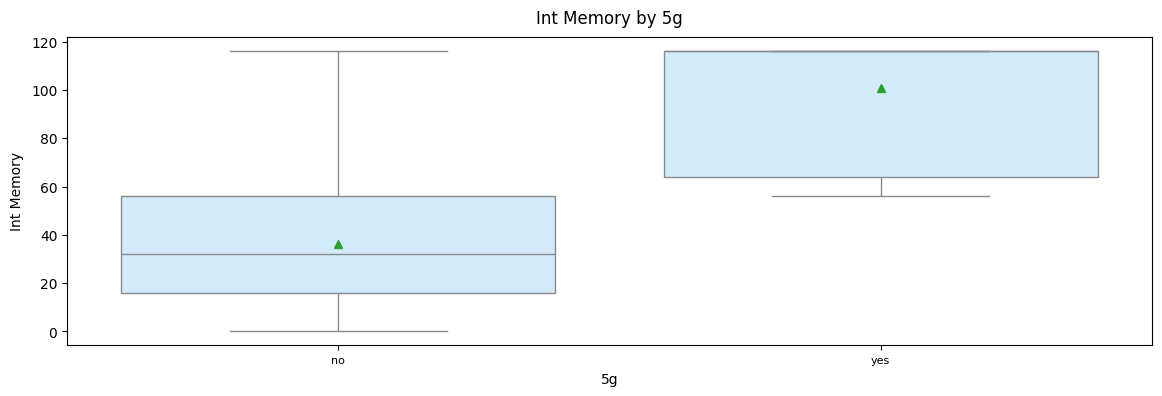

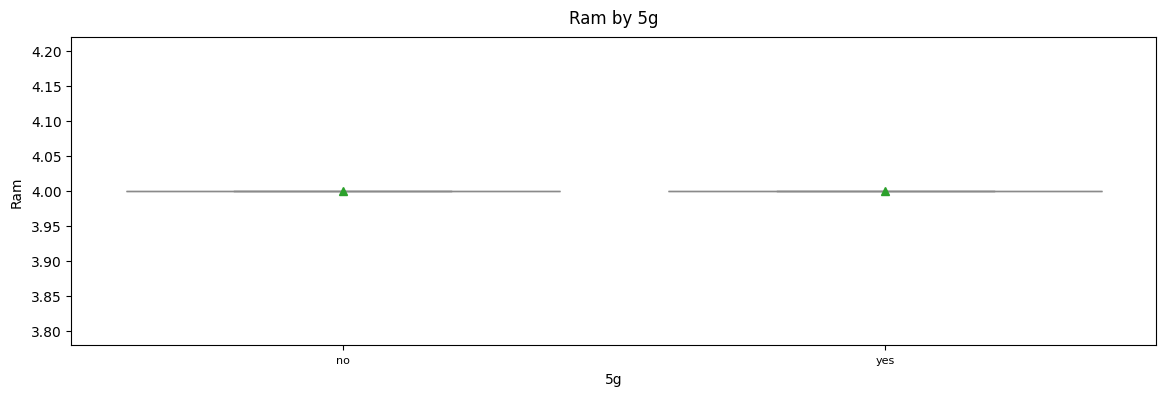

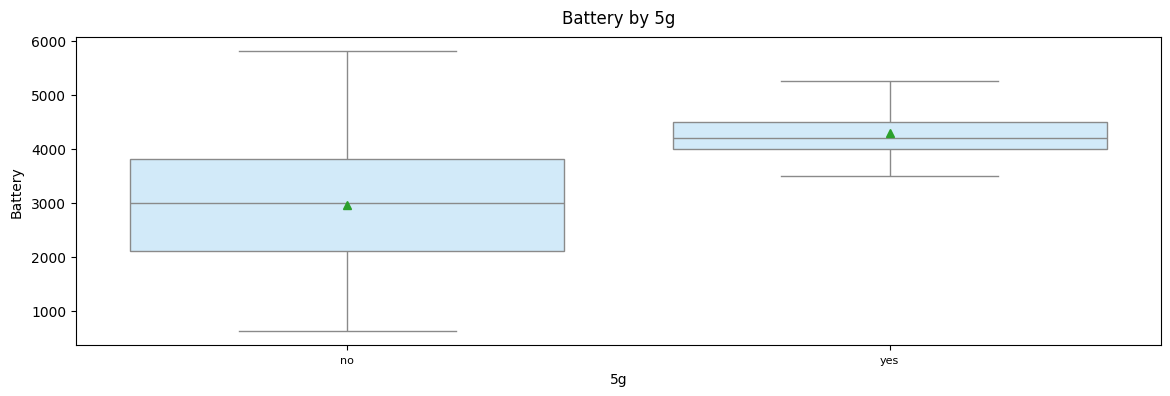

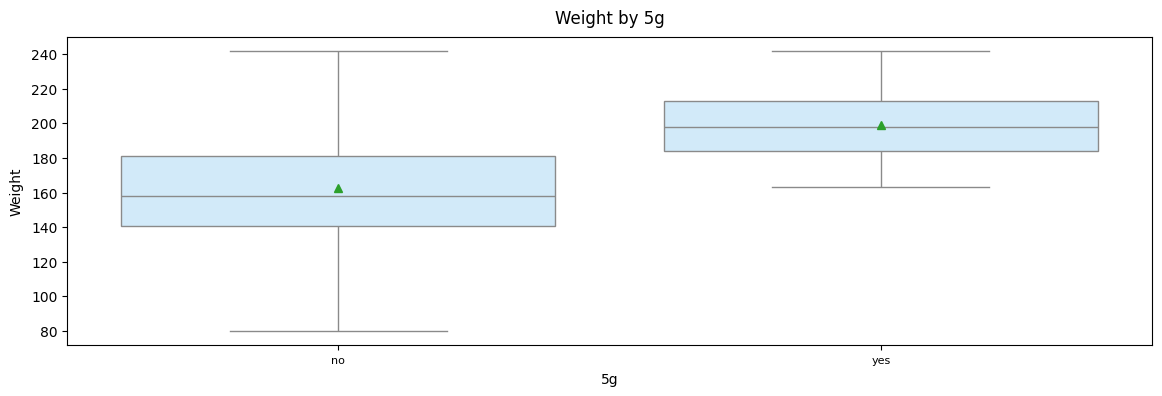

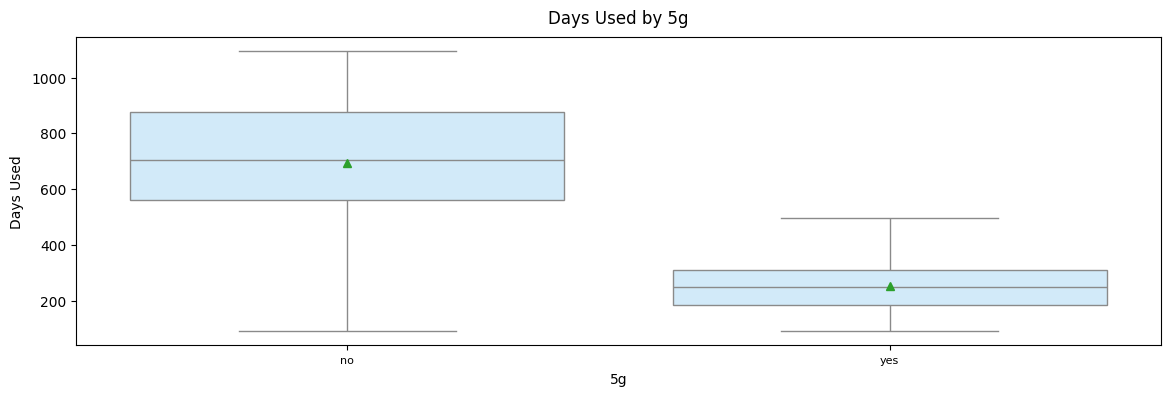

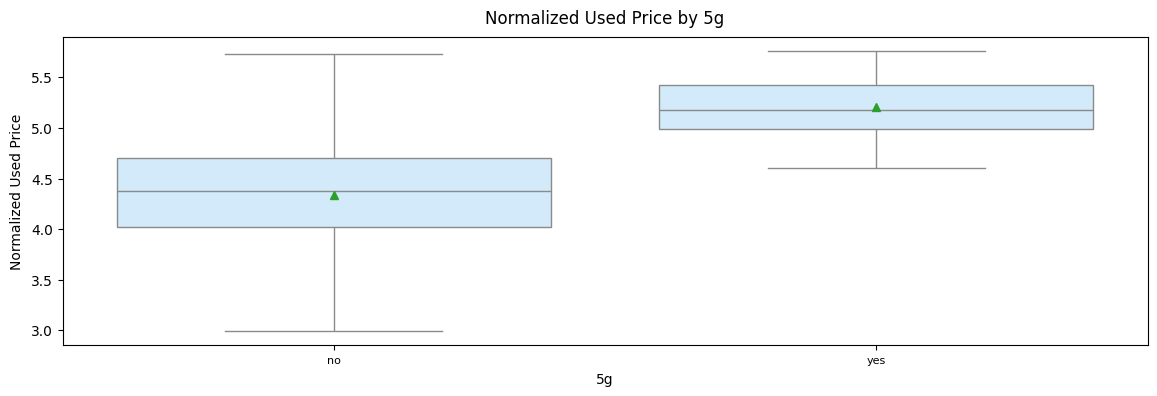

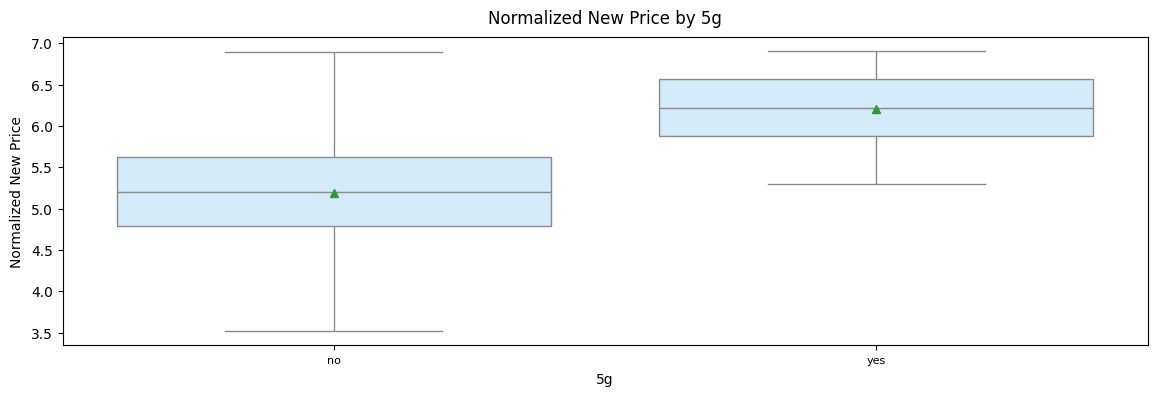

In [86]:
# Create boxplots of numerical attributes by 5g
for col in df_num_list:
    boxplots_by_cat_and_num_atts(df_Recell_Upd, '5g', col)

#### Observations:
* 5g compatible devices tend to have a larger screen size, selfie camera MP, internal memory, 
  battery, weight, normalized used price, and normalized new price

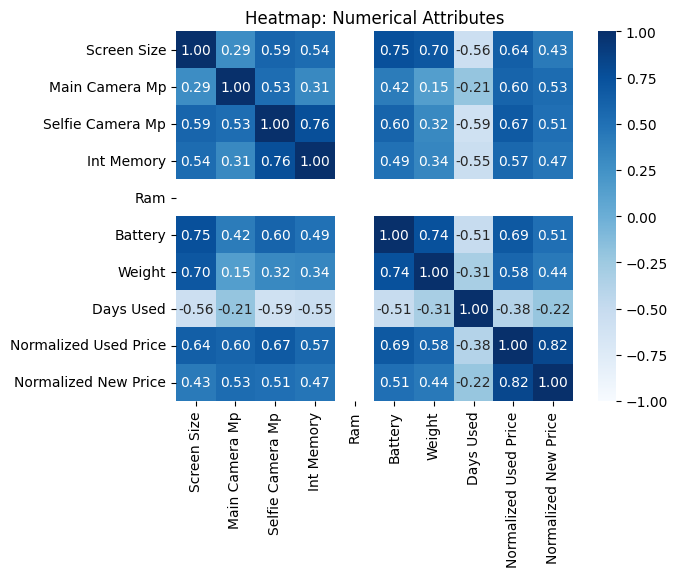

In [87]:
# Create a heatmap of the correlation of the numerical attributes
# Release year is a time value and not included

# Create a labels dataframe
labels = []

# Create labels for the heatmap x and y labels
for i in df_num_list:
    x = i.replace('_',' ').split()
    labels.append(' '.join(word[:].capitalize() for word in x))

# Correlate the numerical attributes      
df_corr2 = df_Recell_Upd[df_num_list].corr()

# Create the heatmap
ax = sns.heatmap(df_corr2, cbar=True, annot=True, vmin=-1, vmax=1, fmt=".2f",
                 xticklabels=labels,
                 yticklabels=labels,
                 cmap='Blues'
                )
# Add title
plt.title('Heatmap: Numerical Attributes')

# Show plot
plt.show()

#### Observations:
* After processing missing values and outliers, there are changes to the correlations of numerical attributes
* Highly Correlated: 
    - Screen size and battery
    - Screen size and weight
    - Selfie camera MP and internal memory
    - Battery and weight
    - Normalized used price and normalized new price

* Moderately Correlated:
    - Screen size and selfie camera MP
    - Screen size and internal memory
    - Screen size and days used (negative)
    - Screen size and normalized used price
    - Main camera MP and selfie camera MP
    - Main camera MP and normalized used price
    - Main camera MP and normalized new price
    - Selfie camera MP and battery
    - Selfie camera MP and days used (negative)
    - Selfie camera MP and normalized used price
    - Selfie camera MP and normalized new price
    - Internal memory and days used (negative)
    - Internal memory and normalized used price
    - Battery and days used (negative)
    - Battery and normalized used price
    - Battery and normalized new price
    - Weight and normalized used price
    
* RAM  returns a NaN value in the correlation matrix and will be removed

### Data preparation for modeling

In [88]:
# Retrieve the unique values for the RAM attribute
df_Recell_Upd['ram'].unique()

array([4.])

#### Observation:
* The ram attribute has only the value of 4 after updating outliers with the lower/upper IQR

In [89]:
# Drop ram because there only 1 value 
df_Recell_Upd2 = df_Recell_Upd.drop(['ram'], axis=1).copy()

In [90]:
# Show the first 5 records
df_Recell_Upd2.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       14.500  yes   no            13.0   
1      Honor  Android       17.300  yes  yes            13.0   
2      Honor  Android       16.690  yes  yes            13.0   
3      Honor  Android       18.495  yes  yes            13.0   
4      Honor  Android       15.320  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0  146.00      127.0   
1              16.0       116.0   4300.0  213.00      325.0   
2               8.0       116.0   4200.0  213.00      162.0   
3               8.0        64.0   5250.0  232.25      345.0   
4               8.0        64.0   5000.0  185.00      293.0   

   normalized_used_price  normalized_new_price years_existed  
0               4.307572              4.715100             1  
1               5.162097              5.519018             1  
2               5.111084              5.884631             1  
3               5.135387              5.630961             1  
4               4.389995              4.947837             1

#### We want to predict the normalized used price

In [91]:
# Define the X independent variables for the model
X = df_Recell_Upd2.drop(['normalized_used_price'], axis=1)

# Define the y predictor value
y = df_Recell_Upd2['normalized_used_price']

In [92]:
# Show the first 5 records of the X dataframe
X.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android       14.500  yes   no            13.0   
1      Honor  Android       17.300  yes  yes            13.0   
2      Honor  Android       16.690  yes  yes            13.0   
3      Honor  Android       18.495  yes  yes            13.0   
4      Honor  Android       15.320  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0  146.00      127.0   
1              16.0       116.0   4300.0  213.00      325.0   
2               8.0       116.0   4200.0  213.00      162.0   
3               8.0        64.0   5250.0  232.25      345.0   
4               8.0        64.0   5000.0  185.00      293.0   

   normalized_new_price years_existed  
0              4.715100             1  
1              5.519018             1  
2              5.884631             1  
3              5.630961             1  
4              4.947837             1

In [93]:
# Show the first 5 records of the y dataframe
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [94]:
# Add a constant variable to the X dataframe
X = sm.add_constant(X)

In [95]:
# create dummy variables for each categorical attribute
X = pd.get_dummies(X, dtype=int, columns=X.select_dtypes(include=['object']).columns.tolist(),drop_first=True)

# Show the first five records of the X dataframe
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  battery  \
0    1.0       14.500            13.0               5.0        64.0   3020.0   
1    1.0       17.300            13.0              16.0       116.0   4300.0   
2    1.0       16.690            13.0               8.0       116.0   4200.0   
3    1.0       18.495            13.0               8.0        64.0   5250.0   
4    1.0       15.320            13.0               8.0        64.0   5000.0   

   weight  days_used  normalized_new_price  brand_name_Alcatel  ...  os_iOS  \
0  146.00      127.0              4.715100                   0  ...       0   
1  213.00      325.0              5.519018                   0  ...       0   
2  213.00      162.0              5.884631                   0  ...       0   
3  232.25      345.0              5.630961                   0  ...       0   
4  185.00      293.0              4.947837                   0  ...       0   

   4g_yes  5g_yes  years_existed_2  years_existed_3  years_existed_4  \
0       1       0                0                0                0   
1       1       1                0                0                0   
2       1       1                0                0                0   
3       1       1                0                0                0   
4       1       0                0                0                0   

   years_existed_5  years_existed_6  years_existed_7  years_existed_8  
0                0                0                0                0  
1                0                0                0                0  
2                0                0                0                0  
3                0                0                0                0  
4                0                0                0                0  

[5 rows x 54 columns]

In [96]:
# Build the training and test data. Training data will have 70%  of X data and test data will have 30% of X data
# Use the random_state seed value of 1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [97]:
# Print the number of records in the training and test data sets
print('Number of rows in training data: {}'.format(x_train.shape[0]))
print('Number of rows in the test data: {}'.format(x_test.shape[0]))

Number of rows in training data: 2417
Number of rows in the test data: 1037


## Model Building - Linear Regression

In [98]:
# Build the OLS model using the x and y training data
olsmodel = sm.OLS(y_train, x_train).fit()

# Print the summary report of the OLS model
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     228.0
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           14:41:41   Log-Likelihood:                 237.97
No. Observations:                   2417   AIC:                            -367.9
Df Residuals:                       2363   BIC:                            -55.27
Df Model:                             53                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


#### Interpreting the Results:
* The R-squared values shows that the model can explain 84.3% of the variance in the training data

## Model Performance Check

In [1]:
# Define function to compute the adjusted r-squared value
def adj_r2_score(predictors, targets, predictions):
    """
    Compute the adjusted r-squared value
    
    predictors: OLS model prediction values for y
    targets: dependent y training data
    predictions: OLS model X train predictors 
    """
    
    # Calculate the r-squared value from sklearn
    r2 = r2_score(targets, predictions)  
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Define function to compute Mean Absolute Precentage Error (MAPE)
def mape_score(targets, predictions):
    """
    Calculate the MAPE value for the regression model
    
    MAPE is a measure of the absolute percentage difference 
    between actual and predicted values
    
    The closer to 0.0, the better
    
    targets: dependent y training data
    predictions: OLS model X train predictors     
    """

    # Calculate and return the MAPE value
    return round(np.mean(np.abs(targets - predictions) / targets) * 100,2)


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Compute different metrics to check regression model performance

    model: OLS regression model
    predictors: independent x training data
    target: dependent y training data
    """

    # predicting using the independent y variables
    pred = model.predict(predictors)    
    
    # Calculate the Root Mean Squared Error (RMSE) value
    # This is the square root of the average square error 
    #    where error is the difference between the predictor 
    #    value(x training) and target value (y training)
    # This value is in the units of the target (y) - normalized Euro price
    # The closer to 0.0, the better
    rmse = np.sqrt(mean_squared_error(target, pred))  # compute RMSE from sklearn

    # Calculate the mean absolute error (MAE) value
    # This is the average value of the absolute difference between the
    #    predictor value (x training) and target value (y training)
    # The closer to 0.0, the better
    # This value is in the units of the target (y) - normalized Euro price
    mae = mean_absolute_error(target, pred)  # compute MAE from sklearn
    
    # Calculate the 2-square value from sklearn
    # This is a goodness of fit calculation
    # The value range from 0 to 1. The higher the number, the higher the percent of fit
    r2 = r2_score(target, pred)
    
    # Call the adj_r2_score function
    # This is a goodness of fit calculation
    # The value range from 0 to 1. The higher the number, the higher the percent of fit    
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    
    # Call the mape_score function to calculate the MAPE value
    mape = mape_score(target, pred)  # to compute MAPE
    
    # Create a dataframe of performance metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [100]:
# Checking model performance on the training set (seen 70% data)
print("Training Performance")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.219282  0.174003   0.836445        0.832706  4.04

In [101]:
# Checking model performance on the testing set (seen 30% data)
print("Testing Performance")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Testing Performance


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.232619  0.185979   0.826841        0.817319  4.33

In [102]:
# Calculate the average normalized used price (anup)
anup = round(df_Recell_Upd2['normalized_used_price'].mean(),4)
df_Recell_Upd2['normalized_used_price']
print('Euro units: {}'.format(anup))

Euro units: 4.3759


In [103]:
# Calculate the percentage value that RMSE is of the average normalized used price
print('Test RMSE value to average normalized used price: {}%'.format(round(olsmodel_test_perf['RMSE'][0]/anup*100,4)))

Test RMSE value to average normalized used price: 5.3159%


In [104]:
# Calculate the percentage value that MAE is of the average normalized used price
print('Test MAE value to average normalized used price: {}%'.format(round(olsmodel_test_perf['MAE'][0]/anup*100,4)))

Test MAE value to average normalized used price: 4.2501%


#### Observations:
* The training R-squared and adjusted R-squared show 0.83 indicating the model is not underfitting
* The training and test RMSE and MAE values are relatively the same indicating the model is not overfitting
* The training RMSE (5%) and MAE (4%) values are a small percentage of the the average normalized used price unit
* The MAPE value shows the model can predict within 4.33% of the normalized used price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Testing for Multicollinearity

In [105]:
# Define a function to calculate the VIF values for the predictors
def checking_vif(predictors):
    """
    predictors: independent X training data
    """
    
    # Create a dataframe to store the VIF results
    df_vif = pd.DataFrame()
    
    # Add a column called feature that contains the column predictor names
    df_vif['feature'] = predictors.columns

    # Calculating VIF for each feature
    df_vif['VIF'] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(df_vif['feature']))
    ]
    
    # return the df_VIF dataframe results
    return df_vif

In [106]:
# Call the checking_vif function
checking_vif(x_train)

feature         VIF
0                   const  320.433950
1             screen_size    3.915488
2          main_camera_mp    2.704012
3        selfie_camera_mp    5.023349
4              int_memory    3.494026
5                 battery    4.747356
6                  weight    3.707161
7               days_used    3.233182
8    normalized_new_price    3.244923
9      brand_name_Alcatel    3.429202
10       brand_name_Apple   12.856961
11        brand_name_Asus    3.340180
12  brand_name_BlackBerry    1.664269
13      brand_name_Celkon    1.774382
14     brand_name_Coolpad    1.484106
15      brand_name_Gionee    1.947725
16      brand_name_Google    1.333017
17         brand_name_HTC    3.442299
18       brand_name_Honor    3.431227
19      brand_name_Huawei    6.090030
20     brand_name_Infinix    1.317785
21     brand_name_Karbonn    1.593673
22          brand_name_LG    4.893474
23        brand_name_Lava    1.724218
24      brand_name_Lenovo    4.572324
25       brand_name_Meizu    2.208406
26    brand_name_Micromax    3.377351
27   brand_name_Microsoft    1.898429
28    brand_name_Motorola    3.313348
29       brand_name_Nokia    3.479884
30     brand_name_OnePlus    1.459897
31        brand_name_Oppo    4.007772
32      brand_name_Others    9.867658
33   brand_name_Panasonic    2.119311
34      brand_name_Realme    2.015667
35     brand_name_Samsung    7.633657
36        brand_name_Sony    2.992024
37       brand_name_Spice    1.740132
38        brand_name_Vivo    3.726670
39        brand_name_XOLO    2.160364
40      brand_name_Xiaomi    3.781777
41         brand_name_ZTE    3.829287
42              os_Others    1.574497
43             os_Windows    1.630331
44                 os_iOS   11.591255
45                 4g_yes    2.740748
46                 5g_yes    1.807426
47        years_existed_2    3.101689
48        years_existed_3    3.452221
49        years_existed_4    4.222317
50        years_existed_5    5.436504
51        years_existed_6    7.611752
52        years_existed_7    9.888751
53        years_existed_8    9.733896

### Removing Multicollinearity Features

In [107]:
# Create a function to determine the effects of removing a high VIF column from the model
def treating_multicollinearity(predictors, target, high_vif_columns):

    # Create lists for adj_r2 and rmse    
    adj_r2 = []
    rmse = []
    
    # Cycle through each VIF columns
    for cols in high_vif_columns:
        
        # Create a new training data based on the removal of the columns(cols)
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]
        
        # Create a new OLS model based on the new training data
        olsmodel = sm.OLS(target, train).fit()
        
        # Assign the adjusted r-squared value from the OLS model to adj_r2
        adj_r2.append(olsmodel.rsquared_adj)
        
        # Assign the RMSE value from the OLS model to RMSE
        rmse.append(np.sqrt(olsmodel.mse_resid))   
    
    # Create a temporary dataframe to store the results of analyzing the effect of dropping each VIF column
    # Sort by the adjusted r-square value
    temp = pd.DataFrame({'col': high_vif_columns,
                         'Adj R-squared after dropping col': adj_r2,
                         'RMSE after dropping col': rmse}                      
                       ).sort_values(by = 'Adj R-squared after dropping col', 
                        ascending=False)
    # Reset the index of the temporary dataframe
    temp.reset_index(drop=True, inplace=True)
    
    # Return the temp dataframe
    return temp

In [108]:
# Create a list of the columns in the X dataframe
Xcols = X.columns.intersection(X.columns)

# Make copies of the X training and test dataframes
x_train2 = x_train.copy()
x_test2 = x_test.copy()

# Call the function checking_vif using the x train input data
vif = checking_vif(x_train2)
    
# Filter the vif dataframe for records with a VIF value greater than 5
vif = vif[(vif['VIF']>5) & (vif['feature'] != 'const')]
    
# Create a list of the VIF feature names
vifcols = vif['feature'].values

while not vif.empty:
    # Call the treating_multicollinearity function    
    res = treating_multicollinearity(x_train2, y_train, vifcols)
    
    # Find the column to drop with the minimum adjust r-squared value
    drop_column = res['col'][res['Adj R-squared after dropping col'] == \
                  res['Adj R-squared after dropping col'].min()].tolist()
    
    # Drop the column from the X training dataframe
    x_train2 = x_train2.drop(drop_column, axis=1)
    print('{} dropped from x_train2'.format(*drop_column))
    
    # Drop the column from the X testing dataframe
    x_test2 = x_test2.drop(drop_column, axis=1)
    print('{} dropped from x_test2'.format(*drop_column))
    
    # Call the function checking_vif using the x train input data
    vif = checking_vif(x_train2)
    
    # Filter the vif dataframe for records with a VIF value greater than 5
    vif = vif[(vif['VIF']>5) & (vif['feature'] != 'const')]
    
    # Create a list of the VIF feature names
    vifcols = vif['feature'].values

selfie_camera_mp dropped from x_train2
selfie_camera_mp dropped from x_test2
years_existed_7 dropped from x_train2
years_existed_7 dropped from x_test2
os_iOS dropped from x_train2
os_iOS dropped from x_test2
brand_name_Others dropped from x_train2
brand_name_Others dropped from x_test2


In [109]:
# Check VIF now
vif = checking_vif(x_train2)
vif

feature         VIF
0                   const  219.945802
1             screen_size    3.703282
2          main_camera_mp    2.626068
3              int_memory    2.688644
4                 battery    4.428717
5                  weight    3.550527
6               days_used    2.342999
7    normalized_new_price    2.916081
8      brand_name_Alcatel    1.213489
9        brand_name_Apple    1.191646
10        brand_name_Asus    1.221872
11  brand_name_BlackBerry    1.129768
12      brand_name_Celkon    1.140471
13     brand_name_Coolpad    1.061730
14      brand_name_Gionee    1.086513
15      brand_name_Google    1.049277
16         brand_name_HTC    1.241487
17       brand_name_Honor    1.359914
18      brand_name_Huawei    1.566075
19     brand_name_Infinix    1.080415
20     brand_name_Karbonn    1.084324
21          brand_name_LG    1.373134
22        brand_name_Lava    1.069951
23      brand_name_Lenovo    1.308878
24       brand_name_Meizu    1.146825
25    brand_name_Micromax    1.227152
26   brand_name_Microsoft    1.528545
27    brand_name_Motorola    1.272590
28       brand_name_Nokia    1.468910
29     brand_name_OnePlus    1.100804
30        brand_name_Oppo    1.381079
31   brand_name_Panasonic    1.121900
32      brand_name_Realme    1.211764
33     brand_name_Samsung    1.621258
34        brand_name_Sony    1.225703
35       brand_name_Spice    1.098416
36        brand_name_Vivo    1.383758
37        brand_name_XOLO    1.132210
38      brand_name_Xiaomi    1.363131
39         brand_name_ZTE    1.273530
40              os_Others    1.510772
41             os_Windows    1.617737
42                 4g_yes    2.613215
43                 5g_yes    1.643002
44        years_existed_2    2.029303
45        years_existed_3    1.669252
46        years_existed_4    1.587229
47        years_existed_5    1.659940
48        years_existed_6    1.610985
49        years_existed_8    1.698340

In [110]:
# Create a new OLS model using the new X training data
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Print the summary report of the OLS model
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.829
Model:                               OLS   Adj. R-squared:                  0.825
Method:                    Least Squares   F-statistic:                     233.9
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           14:41:53   Log-Likelihood:                 182.76
No. Observations:                   2417   AIC:                            -265.5
Df Residuals:                       2367   BIC:                             23.98
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Remove Insignificant Coefficients With Insignificant Confidence Intervals

In [111]:
# Drop battery, days_used,int_memory, and weight due to the insignificant coefficients and confidence intervals
# Battery and weight were highly correlated with screen size
col_to_drop = ['battery','days_used','int_memory','weight']

# Create a new X training dataframe with the battery feature dropped
x_train3 = x_train2.drop(col_to_drop, axis=1)

# Create a new X testing dataframe with the battery feature dropped
x_test3 = x_test2.drop(col_to_drop, axis=1)

# Create a new OLS model based on the new X training data
olsmodel3= sm.OLS(y_train, x_train3).fit()

# Print the summary report of the OLS model
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.811
Model:                               OLS   Adj. R-squared:                  0.807
Method:                    Least Squares   F-statistic:                     226.0
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           14:41:53   Log-Likelihood:                 62.821
No. Observations:                   2417   AIC:                            -33.64
Df Residuals:                       2371   BIC:                             232.7
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Removing High P-value Features

In [112]:
# Remove predictor where the max p-value is greater than 0.05
# Rerun the training process each time a column is removed and then recheck

# Create a copy of the modified X training data
predictors = x_train3.copy()

# Create a list of the column names
cols = predictors.columns.tolist()

# Cycle through the column list until there are no more columns in the list
while len(cols) > 0:
    
    # Create an X training dataframe that contains only the columns in the list
    x_train_upd = predictors[cols]
    
    # Build the OLS model
    ptest_model = sm.OLS(y_train, x_train_upd).fit()
    
    # Retrieve the max p-value from the model
    p_values = ptest_model.pvalues
    max_p_value = max(p_values)
    
    # Name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    # If the p-value is greater than 0.05, add the column to the list be dropped
    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
        print('{} to be dropped with p_value of {}'.format(feature_with_p_max,round(max_p_value,4)))
    else:
        break

# List of columns to be dropped from the X training and X test data        
features_to_drop = cols

brand_name_OnePlus to be dropped with p_value of 0.9593
brand_name_Meizu to be dropped with p_value of 0.9196
brand_name_Coolpad to be dropped with p_value of 0.8926
brand_name_Nokia to be dropped with p_value of 0.865
brand_name_Panasonic to be dropped with p_value of 0.8716
brand_name_Lava to be dropped with p_value of 0.7988
brand_name_Motorola to be dropped with p_value of 0.7843
brand_name_Huawei to be dropped with p_value of 0.764
brand_name_Honor to be dropped with p_value of 0.7747
brand_name_XOLO to be dropped with p_value of 0.7758
brand_name_Gionee to be dropped with p_value of 0.578
brand_name_Microsoft to be dropped with p_value of 0.5672
os_Others to be dropped with p_value of 0.5352
brand_name_Spice to be dropped with p_value of 0.5548
brand_name_Infinix to be dropped with p_value of 0.4561
years_existed_8 to be dropped with p_value of 0.4506
brand_name_Apple to be dropped with p_value of 0.4463
brand_name_Alcatel to be dropped with p_value of 0.4464
brand_name_Asus to b

In [113]:
# Create a new X training dataframe without the features to drop becuase of high p-value
x_train4 = x_train3[features_to_drop]

# Create a new X test dataframe without the features to drop becuase of high p-value
x_test4 = x_test3[features_to_drop]

In [114]:
# Create a new OLS model based on the new X training data
olsmodel4= sm.OLS(y_train, x_train4).fit()

# Print the summary report of the OLS model
print(olsmodel4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.809
Model:                               OLS   Adj. R-squared:                  0.808
Method:                    Least Squares   F-statistic:                     846.7
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           14:41:53   Log-Likelihood:                 48.399
No. Observations:                   2417   AIC:                            -70.80
Df Residuals:                       2404   BIC:                             4.476
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:
* Brand_name_HTC variable had a negative coefficient value in the model

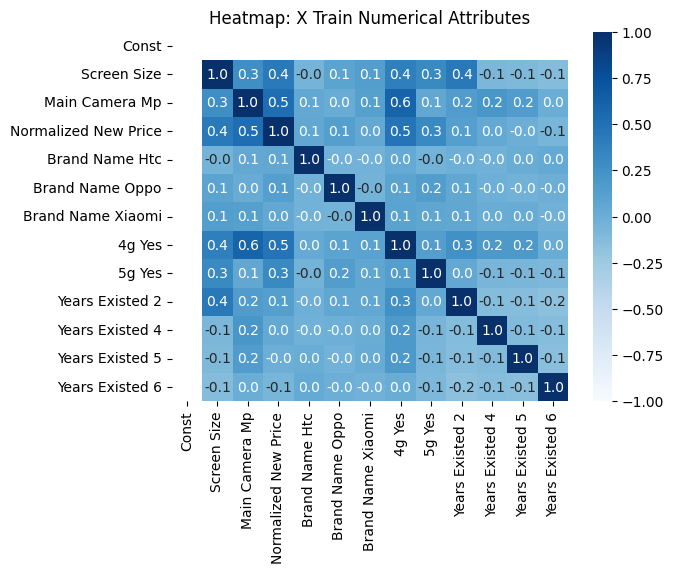

In [115]:
# Create a heatmap of the correlation of the x_train 4 numerical attributes
x_num_list = x_train4.select_dtypes(include=np.number).columns.tolist()
# Create a labels dataframe
labels = []

# Create labels for the heatmap x and y labels
for i in x_num_list:
    x = i.replace('_',' ').split()
    labels.append(' '.join(word[:].capitalize() for word in x))

# Correlate the numerical attributes      
x_corr = x_train4[x_num_list].corr()

# Create the heatmap
ax = sns.heatmap(x_corr, cbar=True, annot=True, vmin=-1, vmax=1, fmt=".1f",
                 xticklabels=labels,
                 yticklabels=labels,
                 cmap='Blues'
                )
# Add title
plt.title('Heatmap: X Train Numerical Attributes')

# Show plot
plt.show()

#### Observations:
* A heatmap was created to check if the brand_name_HTC independent variable was highly correlated with another independent variable. There was no high correlation between brand_name_HTC and the other independent variables. 
* There was moderate correlation between main camera MP and normalized new price
* There was moderate correlation between main camera MP and 4g Yes
* There was moderate correlation between normalized new price and 4g Yes


In [116]:
# Checking model performance on the training set (seen 70% data)
print("Training Performance")
olsmodel4_train_perf = model_performance_regression(olsmodel4, x_train4, y_train)
olsmodel4_train_perf

Training Performance


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.237174  0.188089   0.808668        0.807632  4.36

In [117]:
# Checking model performance on the testing set (seen 30% data)
print("Test Performance")
olsmodel4_test_perf = model_performance_regression(olsmodel4, x_test4, y_test)
olsmodel4_test_perf

Test Performance


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.244077  0.192437   0.809362        0.806939  4.48

### Testing for Linearity and Independence

In [118]:
# Create a new dataframe to store training analysis
df_pred = pd.DataFrame()

# Include the actual values from the y training data 
df_pred['Actual Values']= y_train

# Inclue the fitted values from the latest OLS model
df_pred['Fitted Values']= olsmodel4.fittedvalues

# Include the residuals from latest OLS model
df_pred['Residuals'] = olsmodel4.resid

# Incluce the percent difference calculated from the latest OLS model
df_pred['Percent Difference'] =round((df_pred['Residuals']/df_pred['Actual Values'])*100,2)

# Return the first 5 rows of the dataframe
df_pred.head()

Actual Values  Fitted Values  Residuals  Percent Difference
3026       4.087488       3.812146   0.275342                6.74
1525       4.448399       4.577695  -0.129296               -2.91
1128       4.315353       4.322895  -0.007543               -0.17
3003       4.282068       4.284961  -0.002893               -0.07
2907       4.456438       4.376570   0.079868                1.79

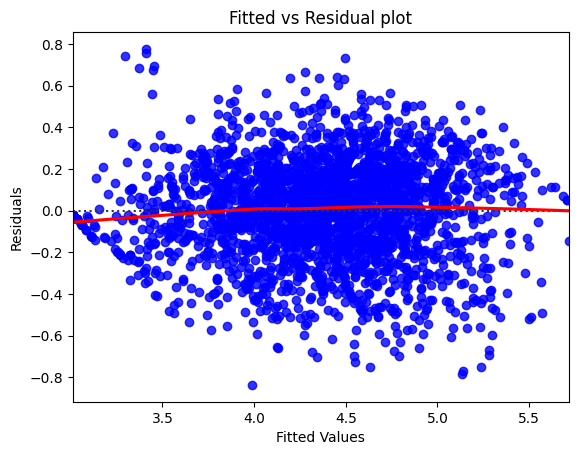

In [119]:
# Create a residual plot of the fitted and residual values from the lastest OLS model
sns.residplot(data=df_pred, x='Fitted Values', y='Residuals', color='blue', lowess=True, line_kws=dict(color="r"))
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation:
* There appears to be no pattern in the plot above and the assumptions of linearity and independence are satisfied

### Testing for Normality

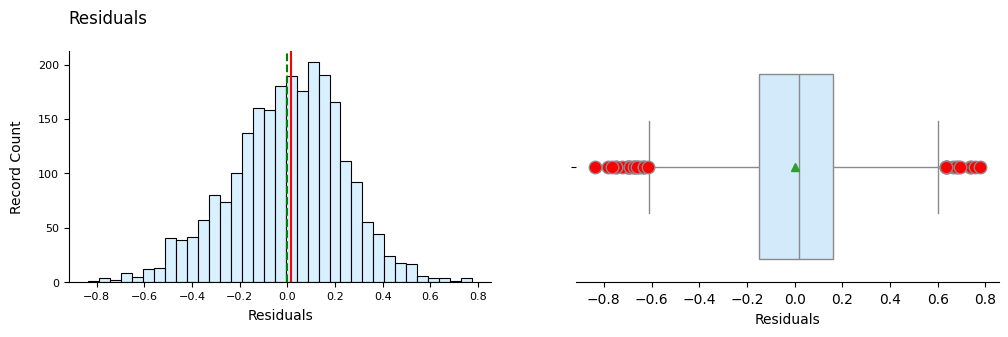

__________________________________________________________________________________________________________________________


In [120]:
# Create histogram and box plots of the residuals
hist_box_plots(df_pred, 'Residuals')  

#### Observations:
* The residuals have a normal distribution shape
* The mean and medium values are very close to each other

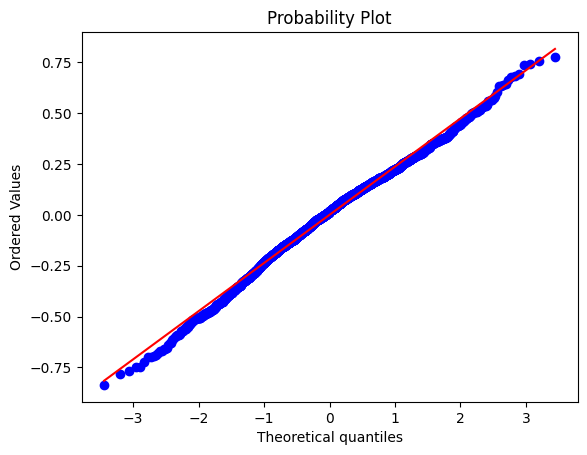

In [121]:
# Create a probability plot of the residuals
stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

In [122]:
# Provide the number of rows in the dataframe
df_pred["Residuals"].shape[0]

2417

In [123]:
# Test the residuals for normality using the  Shapiro-Wilk test
statistic, pvalue = stats.shapiro(df_pred["Residuals"])
print('The t-statistic is {:.6f}\n'
      'The p-value is {:.6f}'.format(round(statistic,6), round(pvalue),6))

The t-statistic is 0.993987
The p-value is 0.000000


#### Observations:
* The p-value is less than 0.05, the residuals are not normally distributed as per the Shapiro-Wilk test

In [124]:
# Test the residuals for normality using the Kolmogorov-Smirnov test
statistic, pvalue = kstest(df_pred['Residuals'], 'norm')
print('The t-statistic is {:.6f}\n'
      'The p-value is {:.6f}'.format(round(statistic,6), round(pvalue),6))

The t-statistic is 0.314869
The p-value is 0.000000


#### Observations:
* The p-value is less than 0.05, the residuals are not normally distributed as per the Kolmogorov-Smirnov test

In [125]:
# Test the residuals for normality using the Anderson test
statistic, sig_level = anderson(df_pred['Residuals'], 'norm')[:2]
print('The t-statistic is {:.6f}\n'
      'Signifiance level: {}'.format(statistic, sig_level))

The t-statistic is 5.070150
Signifiance level: [0.575 0.655 0.786 0.916 1.09 ]


#### Observations:
* The t-statistic is greater than all of the significance levels indicating the residuals are not normally distributed

#### Testing for Normality Observations:
* The tests all point to the same conclusion that the residuals are not normally distributed
* However, the histogram, box plot, and probability plot all show that the residuals appear close to being normal
* Thus, the assumption of normality is satisfied

### Testing for Homoscedasticity

In [126]:
# Testing the residuals for homoscedasticity
f_stat, p_value, type = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
print('The f-statistic is {:.6f}\n'
      'The p-value is {:.6f}'.format(f_stat, p_value))

The f-statistic is 0.981856
The p-value is 0.624178


#### Observations:
* The p-value is greater than 0.05, therefore the residuals are homoscedasctic.

### Prediction on Test Data

In [127]:
# Process predictions on the test set
pred = olsmodel4.predict(x_test4)

# Create a dataframe of the Actual, Predicted, and Variance data
df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred, 'Variance (A-P)':y_test-pred})
df_pred_test.sample(10, random_state=0)

Actual  Predicted  Variance (A-P)
1169  4.718410   4.713297        0.005113
2970  4.329021   4.496741       -0.167720
3173  4.059581   4.412095       -0.352514
2654  5.100110   4.871058        0.229052
2752  4.213312   4.519076       -0.305763
1017  3.902377   3.833783        0.068593
2015  4.145830   4.311817       -0.165988
2338  3.344274   3.532111       -0.187837
557   3.156149   3.778746       -0.622597
3451  4.357350   4.307138        0.050212

#### Observations:
* The variances between the actuals and predicted are fairly good

## Final Model

In [128]:
# Create the final training and test dataframes
x_train_final = x_train4.copy()
x_test_final = x_test4.copy()

In [129]:
# Create the final OLS model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.809
Model:                               OLS   Adj. R-squared:                  0.808
Method:                    Least Squares   F-statistic:                     846.7
Date:                   Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                           14:41:58   Log-Likelihood:                 48.399
No. Observations:                   2417   AIC:                            -70.80
Df Residuals:                       2404   BIC:                             4.476
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [130]:
# Checking model performance on the training set (seen 70% data)
print("Training Performance")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.237174  0.188089   0.808668        0.807632  4.36

In [131]:
# Checking model performance on the testing set (seen 30% data)
print("Test Performance")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance


RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.244077  0.192437   0.809362        0.806939  4.48

#### Observations:
* The model is able to explain ~81%  of the variation in the data
* The training and test RMSE and MAE values are low and relatively the same, indicating the model is not overfitting
* The MAPE value shows the model can predict within 4.5% of the normalized used price
* From these results, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1) The model is able to explain ~81% of the variation in the data and within 4.5% of the normalized used price
    * This indicates the model is good for prediction as well as inference purposes
2) If the normalized new price increases one Euro unit, then the normalized used price increases 0.4717 units, all other variables remaining constant
3) If the screen size inceases one cm, then the normalized used price increases 0.0884 units, all other variables remaining constant
4) If the main camera MP inceases by one MP, then the normalized used prices increases 0.0208 units, all other variables remaining constant
5) Devices with 5g compatibility have a higher impact on the the normalized used price than 4g compatible devices
6) There appears to be a gap in the main camera MP attribute where certain brands no longer have the value populated. Click <a href = #link1>here</a>.
7) Concentrate on selling used and refurbished devices with the highest average normalized used prices such as Apple, Google, and Oneplus
8) For other brands such as Huawei, Xiaomi, Oppo, Samsung, and Asus, concentrate on selling the higher end devices only
9) Determine a cutoff price point where used devices are not purchased for resell and refurbishment
10) Determine a cutoff point where older phones are no longer purchased for resell and refurbishment
11) Incorporate a refurbishment cost associated with brands and devices to perform a cost-benefit analysis before an item is purchased for refurbishment
12) For customers that desire more RAM in a device, concentrate on offering OnePlus products. Other brands such as Oppo, Huawei, Honor, Google, Vivo and Xiaomi also develop higher RAM models
13) For customers that focus on selfie pictures, the brands Oneplus, Oppo, and Vivo have the highest average selfie camera MP options
14) For customers that prefer to take standard pictures, Sony has the highest average main camera MP options
15) For customers, newer models, on average, have a larger screen size, higher selfie camera MP, higher internal memory, larger battery, and higher weight

___